In [1]:
import sys
print(sys.executable)

C:\Users\mjcd1\anaconda3\envs\unicornenv\python.exe


In [2]:
import os
print(os.getcwd())

C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project


In [3]:
import pandas as pd
import os

file_path = "C:\\Users\\mjcd1\\Desktop\\CURSOS\\Python Unicorn\\Proyecto Integrador Final Calidad del Aire USA\\Air Quality Data Project\\CO_42101\\hourly_42101_2016\\hourly_42101_2016.csv"

print(f"Intentando leer el archivo: {file_path}")
print(f"¿Existe la ruta del directorio? {os.path.exists(os.path.dirname(file_path))}")
print(f"¿Es un archivo? {os.path.isfile(file_path)}")

try:
    df = pd.read_csv(file_path)
    print("\n¡Archivo leído exitosamente!")
    print(df.head())
    print(f"\nNombres de columnas reales en el archivo: {df.columns.tolist()}") # Esto es CRUCIAL para el siguiente paso
except FileNotFoundError:
    print("\nERROR: ¡Archivo no encontrado de nuevo!")
    print("Esto es muy extraño si la ruta es correcta. Por favor, verifica de nuevo la ruta y el nombre, y que no haya caracteres invisibles.")
except Exception as e:
    print(f"\nOcurrió otro error al leer el archivo: {e}")
    print("Este error es diferente a 'FileNotFoundError' y puede indicar problemas con el contenido del CSV.")
    print("Intentando con codificación 'latin-1'...")
    try:
        df = pd.read_csv(file_path, encoding='latin-1')
        print("\n¡Archivo leído exitosamente con codificación 'latin-1'!")
        print(df.head())
        print(f"\nNombres de columnas reales en el archivo (latin-1): {df.columns.tolist()}")
    except Exception as e_latin1:
        print(f"\nFalló también con Latin-1: {e_latin1}")
        print("El archivo podría estar corrupto o tener un formato muy inusual.")

Intentando leer el archivo: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\CO_42101\hourly_42101_2016\hourly_42101_2016.csv
¿Existe la ruta del directorio? True
¿Es un archivo? True


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_13760\1352593869.py:11: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



¡Archivo leído exitosamente!
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42101    2  33.553056   
1           1           73        23           42101    2  33.553056   
2           1           73        23           42101    2  33.553056   
3           1           73        23           42101    2  33.553056   
4           1           73        23           42101    2  33.553056   

   Longitude  Datum   Parameter Name  Date Local  ...   Units of Measure  \
0    -86.815  WGS84  Carbon monoxide  2016-01-01  ...  Parts per million   
1    -86.815  WGS84  Carbon monoxide  2016-01-01  ...  Parts per million   
2    -86.815  WGS84  Carbon monoxide  2016-01-01  ...  Parts per million   
3    -86.815  WGS84  Carbon monoxide  2016-01-01  ...  Parts per million   
4    -86.815  WGS84  Carbon monoxide  2016-01-01  ...  Parts per million   

    MDL Uncertainty  Qualifier Method Type  Method Code  \
0  0.04         NaN  

In [4]:
import os

# Ruta que estamos intentando usar
file_path = "C:\\Users\\mjcd1\\Desktop\\CURSOS\\Python Unicorn\\Proyecto Integrador Final Calidad del Aire USA\\Air Quality Data Project\\Daily AQI by County\\daily_aqi_by_county_2015\\daily_aqi_by_county_2015.csv"


# Mostrar detalles de la ruta
print("Verificando ruta...")
print(f"Ruta completa: {file_path}")
print(f"Existe la carpeta? {os.path.exists(os.path.dirname(file_path))}")
print(f"Existe el archivo? {os.path.isfile(file_path)}")

if os.path.isfile(file_path):
    import pandas as pd
    df_aqi_county_2015 = pd.read_csv(file_path, encoding='utf-8')
    print("Archivo leído exitosamente.")
    print("Primeras 5 filas:")
    print(df_aqi_county_2015.head())
else:
    print("El archivo no se encuentra. Por favor, verifica la ruta o el nombre del archivo.")

Verificando ruta...
Ruta completa: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\Daily AQI by County\daily_aqi_by_county_2015\daily_aqi_by_county_2015.csv
Existe la carpeta? True
Existe el archivo? True
Archivo leído exitosamente.
Primeras 5 filas:
  State Name county Name  State Code  County Code        Date  AQI  Category  \
0    Alabama     Baldwin           1            3  2015-01-03   38      Good   
1    Alabama     Baldwin           1            3  2015-01-06   55  Moderate   
2    Alabama     Baldwin           1            3  2015-01-09   60  Moderate   
3    Alabama     Baldwin           1            3  2015-01-12   52  Moderate   
4    Alabama     Baldwin           1            3  2015-01-15   35      Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2      

In [5]:
import os
import pandas as pd

ruta_base = r"C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project"
dataframes_por_codigo = {}

for carpeta_codigo in os.listdir(ruta_base):
    ruta_codigo = os.path.join(ruta_base, carpeta_codigo)
    
    if os.path.isdir(ruta_codigo):
        # Buscamos la subcarpeta del año 2015
        subcarpeta_2015 = [d for d in os.listdir(ruta_codigo) if os.path.isdir(os.path.join(ruta_codigo, d)) and '2015' in d]
        
        if subcarpeta_2015:
            ruta_2015 = os.path.join(ruta_codigo, subcarpeta_2015[0])
            
            # Buscamos el CSV dentro de esa subcarpeta
            archivos_csv = [f for f in os.listdir(ruta_2015) if f.endswith('.csv')]
            
            if archivos_csv:
                ruta_csv = os.path.join(ruta_2015, archivos_csv[0])
                
                df = pd.read_csv(ruta_csv)
                dataframes_por_codigo[carpeta_codigo] = df
                
                print(f"📥 Cargado: {ruta_csv} → {carpeta_codigo}")

print(f"\n✅ {len(dataframes_por_codigo)} DataFrames cargados (uno por código)")


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_13760\1943880471.py:23: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv)


📥 Cargado: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\CO_42101\hourly_42101_2015\hourly_42101_2015.csv → CO_42101
📥 Cargado: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\Daily AQI by CBSA\daily_aqi_by_cbsa_2015\daily_aqi_by_cbsa_2015.csv → Daily AQI by CBSA
📥 Cargado: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\Daily AQI by County\daily_aqi_by_county_2015\daily_aqi_by_county_2015.csv → Daily AQI by County


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_13760\1943880471.py:23: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv)


📥 Cargado: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\NO2_42602\hourly_42602_2015\hourly_42602_2015.csv → NO2_42602


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_13760\1943880471.py:23: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv)


📥 Cargado: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\Ozone_44201\hourly_44201_2015\hourly_44201_2015.csv → Ozone_44201


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_13760\1943880471.py:23: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv)


📥 Cargado: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\SO2_42401\hourly_42401_2015\hourly_42401_2015.csv → SO2_42401

✅ 6 DataFrames cargados (uno por código)


In [6]:
print(dataframes_por_codigo.keys())


dict_keys(['CO_42101', 'Daily AQI by CBSA', 'Daily AQI by County', 'NO2_42602', 'Ozone_44201', 'SO2_42401'])


In [7]:
df = dataframes_por_codigo['CO_42101']
print(df.head())  # Muestra las primeras 5 filas


   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42101    2  33.553056   
1           1           73        23           42101    2  33.553056   
2           1           73        23           42101    2  33.553056   
3           1           73        23           42101    2  33.553056   
4           1           73        23           42101    2  33.553056   

   Longitude  Datum   Parameter Name  Date Local  ...   Units of Measure  \
0    -86.815  WGS84  Carbon monoxide  2015-01-01  ...  Parts per million   
1    -86.815  WGS84  Carbon monoxide  2015-01-01  ...  Parts per million   
2    -86.815  WGS84  Carbon monoxide  2015-01-01  ...  Parts per million   
3    -86.815  WGS84  Carbon monoxide  2015-01-01  ...  Parts per million   
4    -86.815  WGS84  Carbon monoxide  2015-01-01  ...  Parts per million   

    MDL Uncertainty  Qualifier Method Type  Method Code  \
0  0.04         NaN        NaN         FRM         

In [8]:
df = dataframes_por_codigo['Daily AQI by CBSA']
print(df.head())  # Muestra las primeras 5 filas

           CBSA  CBSA Code        Date  AQI Category Defining Parameter  \
0  Aberdeen, SD      10100  2015-01-03   35     Good              PM2.5   
1  Aberdeen, SD      10100  2015-01-06   38     Good              PM2.5   
2  Aberdeen, SD      10100  2015-01-09   33     Good              PM2.5   
3  Aberdeen, SD      10100  2015-01-12   35     Good              PM2.5   
4  Aberdeen, SD      10100  2015-01-15   28     Good              PM2.5   

  Defining Site  Number of Sites Reporting  
0   46-013-0003                          1  
1   46-013-0003                          1  
2   46-013-0003                          1  
3   46-013-0003                          1  
4   46-013-0003                          1  


In [9]:
df = dataframes_por_codigo['Daily AQI by County']
print(df.head())  # Muestra las primeras 5 filas

  State Name county Name  State Code  County Code        Date  AQI  Category  \
0    Alabama     Baldwin           1            3  2015-01-03   38      Good   
1    Alabama     Baldwin           1            3  2015-01-06   55  Moderate   
2    Alabama     Baldwin           1            3  2015-01-09   60  Moderate   
3    Alabama     Baldwin           1            3  2015-01-12   52  Moderate   
4    Alabama     Baldwin           1            3  2015-01-15   35      Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2              PM2.5   01-003-0010                          1  
3              PM2.5   01-003-0010                          1  
4              PM2.5   01-003-0010                          1  


In [10]:
df = dataframes_por_codigo['NO2_42602']
print(df.head())  # Muestra las primeras 5 filas

   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42602    1  33.553056   
1           1           73        23           42602    1  33.553056   
2           1           73        23           42602    1  33.553056   
3           1           73        23           42602    1  33.553056   
4           1           73        23           42602    1  33.553056   

   Longitude  Datum          Parameter Name  Date Local  ...  \
0    -86.815  WGS84  Nitrogen dioxide (NO2)  2015-01-01  ...   
1    -86.815  WGS84  Nitrogen dioxide (NO2)  2015-01-01  ...   
2    -86.815  WGS84  Nitrogen dioxide (NO2)  2015-01-01  ...   
3    -86.815  WGS84  Nitrogen dioxide (NO2)  2015-01-01  ...   
4    -86.815  WGS84  Nitrogen dioxide (NO2)  2015-01-01  ...   

    Units of Measure  MDL Uncertainty  Qualifier Method Type  Method Code  \
0  Parts per billion  0.1         NaN        NaN         FEM          200   
1  Parts per billion  0.1   

In [11]:
df = dataframes_por_codigo['Ozone_44201']
print(df.head())  # Muestra las primeras 5 filas

   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1            3        10           44201    1  30.497478   
1           1            3        10           44201    1  30.497478   
2           1            3        10           44201    1  30.497478   
3           1            3        10           44201    1  30.497478   
4           1            3        10           44201    1  30.497478   

   Longitude  Datum Parameter Name  Date Local  ...   Units of Measure    MDL  \
0 -87.880258  NAD83          Ozone  2015-03-01  ...  Parts per million  0.005   
1 -87.880258  NAD83          Ozone  2015-03-01  ...  Parts per million  0.005   
2 -87.880258  NAD83          Ozone  2015-03-01  ...  Parts per million  0.005   
3 -87.880258  NAD83          Ozone  2015-03-01  ...  Parts per million  0.005   
4 -87.880258  NAD83          Ozone  2015-03-01  ...  Parts per million  0.005   

  Uncertainty  Qualifier Method Type  Method Code  \
0         NaN        NaN   

In [12]:
df = dataframes_por_codigo['SO2_42401']
print(df.head())  # Muestra las primeras 5 filas

   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42401    2  33.553056   
1           1           73        23           42401    2  33.553056   
2           1           73        23           42401    2  33.553056   
3           1           73        23           42401    2  33.553056   
4           1           73        23           42401    2  33.553056   

   Longitude  Datum  Parameter Name  Date Local  ...   Units of Measure  MDL  \
0    -86.815  WGS84  Sulfur dioxide  2015-01-01  ...  Parts per billion  0.2   
1    -86.815  WGS84  Sulfur dioxide  2015-01-01  ...  Parts per billion  0.2   
2    -86.815  WGS84  Sulfur dioxide  2015-01-01  ...  Parts per billion  0.2   
3    -86.815  WGS84  Sulfur dioxide  2015-01-01  ...  Parts per billion  0.2   
4    -86.815  WGS84  Sulfur dioxide  2015-01-01  ...  Parts per billion  0.2   

  Uncertainty  Qualifier Method Type  Method Code  \
0         NaN        NaN         

In [13]:
dataframes_por_codigo['Ozone_44201'].isnull().sum()


State Code                   0
County Code                  0
Site Num                     0
Parameter Code               0
POC                          0
Latitude                     0
Longitude                    0
Datum                        0
Parameter Name               0
Date Local                   0
Time Local                   0
Date GMT                     0
Time GMT                     0
Sample Measurement           0
Units of Measure             0
MDL                          0
Uncertainty            9002938
Qualifier              8775861
Method Type                  0
Method Code                  0
Method Name                  0
State Name                   0
County Name                  0
Date of Last Change          0
dtype: int64

In [14]:
dataframes_por_codigo['SO2_42401'].isnull().sum()

State Code                   0
County Code                  0
Site Num                     0
Parameter Code               0
POC                          0
Latitude                     0
Longitude                    0
Datum                        0
Parameter Name               0
Date Local                   0
Time Local                   0
Date GMT                     0
Time GMT                     0
Sample Measurement           0
Units of Measure             0
MDL                          0
Uncertainty            3722618
Qualifier              3580007
Method Type                  0
Method Code                  0
Method Name                  0
State Name                   0
County Name                  0
Date of Last Change          0
dtype: int64

In [15]:
dataframes_por_codigo['NO2_42602'].isnull().sum()

State Code                   0
County Code                  0
Site Num                     0
Parameter Code               0
POC                          0
Latitude                     0
Longitude                    0
Datum                        0
Parameter Name               0
Date Local                   0
Time Local                   0
Date GMT                     0
Time GMT                     0
Sample Measurement           0
Units of Measure             0
MDL                          0
Uncertainty            3549185
Qualifier              3436967
Method Type                  0
Method Code                  0
Method Name                  0
State Name                   0
County Name                  0
Date of Last Change          0
dtype: int64

In [16]:
dataframes_por_codigo['Daily AQI by County'].isnull().sum()

State Name                   0
county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

In [17]:
dataframes_por_codigo['Daily AQI by CBSA'].isnull().sum()

CBSA                         0
CBSA Code                    0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

In [18]:
dataframes_por_codigo['CO_42101'].isnull().sum()

State Code                   0
County Code                  0
Site Num                     0
Parameter Code               0
POC                          0
Latitude                     0
Longitude                    0
Datum                        0
Parameter Name               0
Date Local                   0
Time Local                   0
Date GMT                     0
Time GMT                     0
Sample Measurement           0
Units of Measure             0
MDL                          0
Uncertainty            2450576
Qualifier              2382483
Method Type                  0
Method Code                  0
Method Name                  0
State Name                   0
County Name                  0
Date of Last Change          0
dtype: int64

In [19]:
# Lista de DataFrames que contienen columnas de ubicación
dfs = [
    dataframes_por_codigo['CO_42101'],
    dataframes_por_codigo['NO2_42602'],
    dataframes_por_codigo['SO2_42401'],
    dataframes_por_codigo['Ozone_44201'],
    dataframes_por_codigo['Daily AQI by County']
]

# Unir todos los DataFrames en uno solo
df_combinado = pd.concat(dfs, ignore_index=True)

# Extraer combinaciones únicas de estado y condado
ubicaciones_unicas = df_combinado[['State Name', 'County Name']].drop_duplicates().reset_index(drop=True)

# Asignar un ID artificial
ubicaciones_unicas['location_id'] = ubicaciones_unicas.index + 1

# Mostrar resultado
print(ubicaciones_unicas)


        State Name            County Name  location_id
0          Alabama              Jefferson            1
1           Alaska             Anchorage             2
2           Alaska  Fairbanks North Star             3
3          Arizona               Maricopa            4
4          Arizona                   Pima            5
..             ...                    ...          ...
900       Virginia                    NaN          901
901     Washington                    NaN          902
902  West Virginia                    NaN          903
903      Wisconsin                    NaN          904
904        Wyoming                    NaN          905

[905 rows x 3 columns]


In [20]:
import time
import os
import pandas as pd
import datetime as dt
from sqlalchemy import text
from db_connection import get_engine

print("Estableciendo conexión…")
engine = get_engine()
print("✅ Conexión OK.")

# Elegimos un índice secundario pequeño para el escaneo (ajusta si quieres)
# Puedes probar 'method_id' o 'station_id' y quedarte con el que vaya más rápido.
COUNT_INDEX = "method_id"   # o "station_id"

with engine.begin() as conn:
    # Evitar timeouts durante una consulta larga
    # (Estos SET solo afectan a tu sesión actual)
    conn.execute(text("SET SESSION net_read_timeout=3600"))
    conn.execute(text("SET SESSION net_write_timeout=3600"))
    conn.execute(text("SET SESSION wait_timeout=28800"))
    conn.execute(text("SET SESSION interactive_timeout=28800"))

    print(f"\nContando filas EXACTAS en 'measurement' (FORCE INDEX {COUNT_INDEX})…")
    t0 = time.time()

    # Fuerza el uso del índice secundario elegido
    # Nota: COUNT(*) no necesita leer las columnas, solo recorrer hojas del índice.
    total = conn.execute(
        text(f"""SELECT COUNT(*) FROM measurement FORCE INDEX ({COUNT_INDEX})""")
    ).scalar()

    elapsed = time.time() - t0


# 'total' debe existir ya (viene de tu COUNT(*))
os.makedirs("exportados", exist_ok=True)

fila = {
    "table": "measurement",
    "row_count": int(total),
    "measured_at": dt.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}

ruta = "exportados/rowcount_measurement.csv"
df = pd.DataFrame([fila])

# Append si ya existe, si no crea con cabecera
if os.path.exists(ruta):
    df.to_csv(ruta, mode="a", header=False, index=False)
else:
    df.to_csv(ruta, index=False)

print(f"📁 Guardado en {ruta}")


print(f"✅ Total de filas (exacto): {total:,}")
print(f"⏱️  Tiempo: {elapsed/60:.1f} min")


Estableciendo conexión…
✅ Conexión OK.

Contando filas EXACTAS en 'measurement' (FORCE INDEX method_id)…
📁 Guardado en exportados/rowcount_measurement.csv
✅ Total de filas (exacto): 769,767,218
⏱️  Tiempo: 3.0 min


## **✅ 1. Top 5 Condados con Mayor Concentración de CO en 2018**

Estableciendo conexión a la base de datos...
✅ Conexión exitosa.

Ejecutando consulta para Top 5 ubicaciones con mayor CO en 2018...
✅ Datos cargados exitosamente:
    state_name county_name  promedio_valor_medido
0  Puerto Rico     Bayamon               0.652701
1      Georgia      Fulton               0.608557
2   California   San Diego               0.528759
3       Alaska   Anchorage               0.526335
4    Louisiana     Orleans               0.513533

Generando gráfico de barras...


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_13760\350302527.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼 Imagen guardada como exportados\top5_co_2018.png
📁 CSV guardado como 'top_5_co_2018.csv'


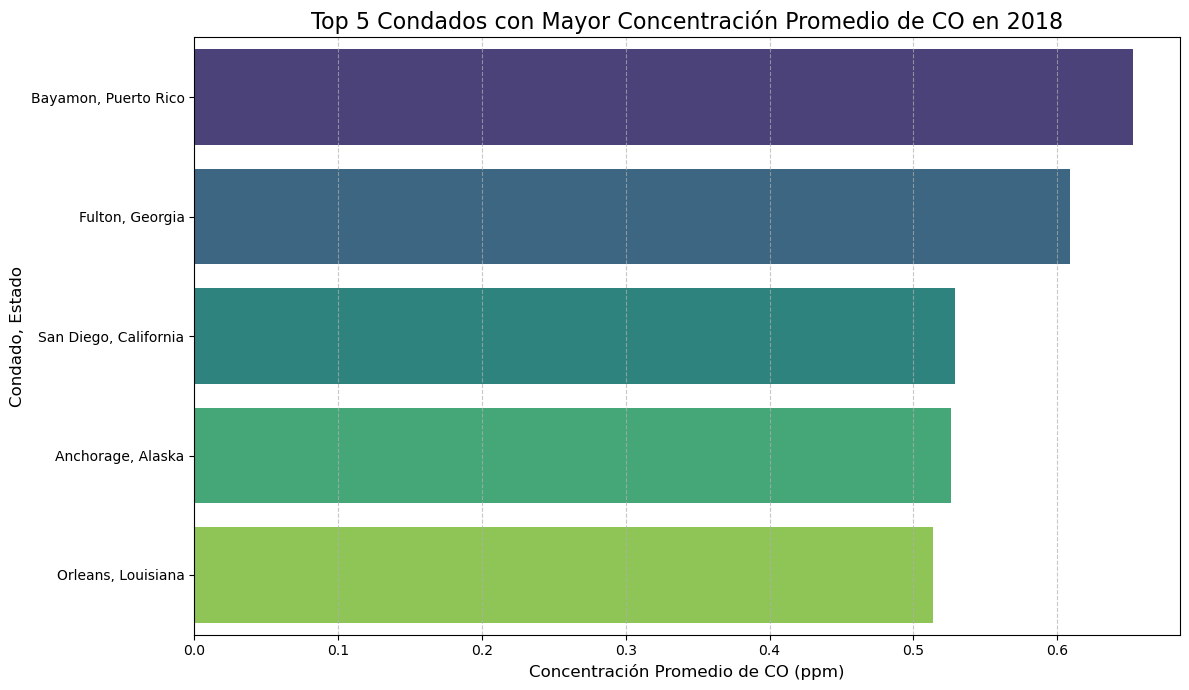


🎉 ¡Gráfico generado exitosamente!


In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text
from db_connection import get_engine

# --- 1) Conexión ---
print("Estableciendo conexión a la base de datos...")
engine = get_engine()
print("✅ Conexión exitosa.")

# Parámetros
year = 2018
parameter_code = 42101         # CO
pollutant_name = "CO"
date_from = f"{year}-01-01"
date_to   = f"{year+1}-01-01"

# --- 2) Consulta optimizada: Top 5 condados por CO en {year} ---
print(f"\nEjecutando consulta para Top 5 ubicaciones con mayor {pollutant_name} en {year}...")

sql = text("""
    SELECT
        l.state_name,
        l.county_name,
        AVG(m.value) AS promedio_valor_medido
    FROM measurement m FORCE INDEX (idx_m_param_date)
    JOIN station   s ON m.station_id  = s.station_id
    JOIN location  l ON s.location_id = l.location_id
    WHERE m.parameter_id = (
            SELECT parameter_id
            FROM parameter
            WHERE parameter_code = :code
          )
      AND m.date_local >= :dfrom
      AND m.date_local <  :dto
    GROUP BY l.state_name, l.county_name
    ORDER BY promedio_valor_medido DESC
    LIMIT 5;
""")

try:
    df_top = pd.read_sql(sql, con=engine, params={"code": parameter_code,
                                                  "dfrom": date_from, "dto": date_to})
    if df_top.empty:
        raise ValueError("La consulta no devolvió filas.")
    print("✅ Datos cargados exitosamente:")
    print(df_top)
except Exception as e:
    print(f"❌ Error al ejecutar la consulta: {e}")
    raise

# --- 3) Visualización ---
print("\nGenerando gráfico de barras...")
plt.figure(figsize=(12, 7))
sns.barplot(
    x="promedio_valor_medido",
    y=df_top["county_name"] + ", " + df_top["state_name"],
    data=df_top,
    palette="viridis"
)
plt.title(f"Top 5 Condados con Mayor Concentración Promedio de {pollutant_name} en {year}", fontsize=16)
plt.xlabel(f"Concentración Promedio de {pollutant_name} (ppm)", fontsize=12)
plt.ylabel("Condado, Estado", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Guardar imagen (en /exportados)
carpeta_exportados = "exportados"
os.makedirs(carpeta_exportados, exist_ok=True)
img_path = os.path.join(carpeta_exportados,
                        f"top5_{pollutant_name.lower()}_{year}.png")
plt.savefig(img_path, dpi=300)
print(f"🖼 Imagen guardada como {img_path}")

# Guardar CSV (en raíz, como vienes haciendo)
csv_path = f"top_5_{pollutant_name.lower()}_{year}.csv"
df_top.to_csv(csv_path, index=False)
print(f"📁 CSV guardado como '{csv_path}'")

plt.show()
print("\n🎉 ¡Gráfico generado exitosamente!")


## **✅ 1. Top 5 Condados con Mayor Concentración de NO₂ en 2018**

Estableciendo conexión a la base de datos...
✅ Conexión exitosa.

Ejecutando consulta para Top 5 ubicaciones con mayor NO2 en 2018...
✅ Datos cargados exitosamente:
   state_name     county_name  promedio_valor_medido
0    Colorado          Denver              22.073594
1  New Jersey           Union              19.405673
2  New Jersey          Hudson              17.498801
3  New Jersey          Bergen              17.242388
4  California  San Bernardino              17.148824

Generando gráfico de barras...


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_13760\1487894034.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼 Imagen guardada como exportados\top5_no2_2018.png
📁 CSV guardado como 'top_5_no2_2018.csv'


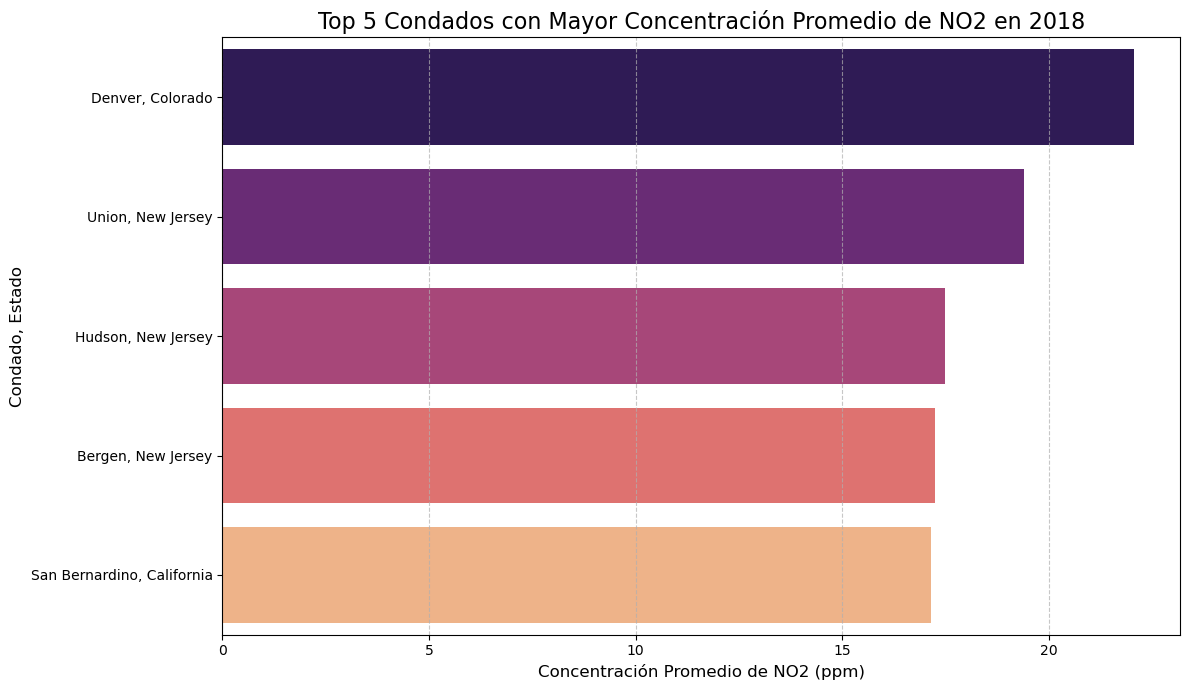


🎉 ¡Gráfico generado exitosamente!


In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text
from db_connection import get_engine

# --- 1) Conexión ---
print("Estableciendo conexión a la base de datos...")
engine = get_engine()
print("✅ Conexión exitosa.")

# Parámetros
year = 2018
parameter_code = 42602         # NO2
pollutant_name = "NO2"
date_from = f"{year}-01-01"
date_to   = f"{year+1}-01-01"

# --- 2) Consulta optimizada: Top 5 condados por CO en {year} ---
print(f"\nEjecutando consulta para Top 5 ubicaciones con mayor {pollutant_name} en {year}...")

sql = text("""
    SELECT
        l.state_name,
        l.county_name,
        AVG(m.value) AS promedio_valor_medido
    FROM measurement m FORCE INDEX (idx_m_param_date)
    JOIN station   s ON m.station_id  = s.station_id
    JOIN location  l ON s.location_id = l.location_id
    WHERE m.parameter_id = (
            SELECT parameter_id
            FROM parameter
            WHERE parameter_code = :code
          )
      AND m.date_local >= :dfrom
      AND m.date_local <  :dto
    GROUP BY l.state_name, l.county_name
    ORDER BY promedio_valor_medido DESC
    LIMIT 5;
""")

try:
    df_top = pd.read_sql(sql, con=engine, params={"code": parameter_code,
                                                  "dfrom": date_from, "dto": date_to})
    if df_top.empty:
        raise ValueError("La consulta no devolvió filas.")
    print("✅ Datos cargados exitosamente:")
    print(df_top)
except Exception as e:
    print(f"❌ Error al ejecutar la consulta: {e}")
    raise

# --- 3) Visualización ---
print("\nGenerando gráfico de barras...")
plt.figure(figsize=(12, 7))
sns.barplot(
    x="promedio_valor_medido",
    y=df_top["county_name"] + ", " + df_top["state_name"],
    data=df_top,
    palette="magma"
)
plt.title(f"Top 5 Condados con Mayor Concentración Promedio de {pollutant_name} en {year}", fontsize=16)
plt.xlabel(f"Concentración Promedio de {pollutant_name} (ppm)", fontsize=12)
plt.ylabel("Condado, Estado", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Guardar imagen (en /exportados)
carpeta_exportados = "exportados"
os.makedirs(carpeta_exportados, exist_ok=True)
img_path = os.path.join(carpeta_exportados,
                        f"top5_{pollutant_name.lower()}_{year}.png")
plt.savefig(img_path, dpi=300)
print(f"🖼 Imagen guardada como {img_path}")

# Guardar CSV (en raíz, como vienes haciendo)
csv_path = f"top_5_{pollutant_name.lower()}_{year}.csv"
df_top.to_csv(csv_path, index=False)
print(f"📁 CSV guardado como '{csv_path}'")

plt.show()
print("\n🎉 ¡Gráfico generado exitosamente!")


## **✅ 2. Top 5 Condados con Mayor Concentración de SO₂ en 2018**

Estableciendo conexión a la base de datos...
✅ Conexión exitosa.

Ejecutando consulta para Top 5 ubicaciones con mayor SO2 en 2018...
✅ Datos cargados exitosamente:
  state_name           county_name  promedio_valor_medido
0     Hawaii                Hawaii              12.963202
1     Alaska  Fairbanks North Star               5.558146
2      Idaho               Bannock               4.578073
3    Arizona                  Gila               3.769112
4   Michigan             St. Clair               2.493312

Generando gráfico de barras...


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_13760\3258346531.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼 Imagen guardada como exportados\top5_so2_2018.png
📁 CSV guardado como 'top_5_so2_2018.csv'


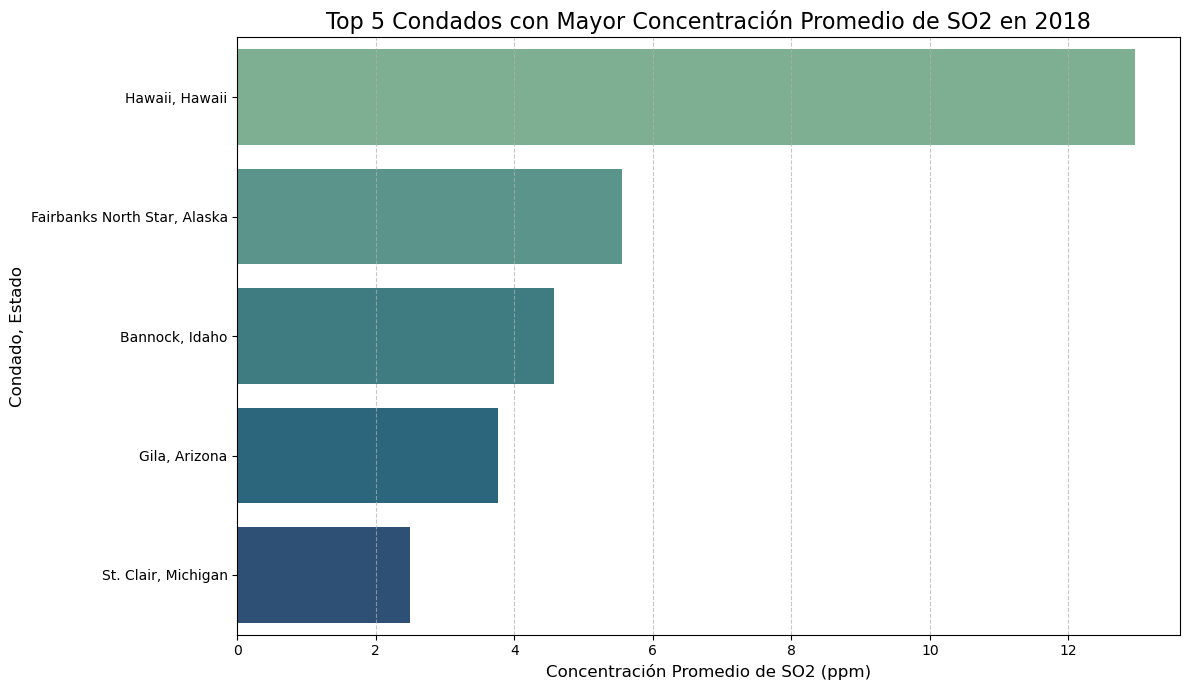


🎉 ¡Gráfico generado exitosamente!


In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text
from db_connection import get_engine

# --- 1) Conexión ---
print("Estableciendo conexión a la base de datos...")
engine = get_engine()
print("✅ Conexión exitosa.")

# Parámetros
year = 2018
parameter_code = 42401         # SO2
pollutant_name = "SO2"
date_from = f"{year}-01-01"
date_to   = f"{year+1}-01-01"

# --- 2) Consulta optimizada: Top 5 condados por CO en {year} ---
print(f"\nEjecutando consulta para Top 5 ubicaciones con mayor {pollutant_name} en {year}...")

sql = text("""
    SELECT
        l.state_name,
        l.county_name,
        AVG(m.value) AS promedio_valor_medido
    FROM measurement m FORCE INDEX (idx_m_param_date)
    JOIN station   s ON m.station_id  = s.station_id
    JOIN location  l ON s.location_id = l.location_id
    WHERE m.parameter_id = (
            SELECT parameter_id
            FROM parameter
            WHERE parameter_code = :code
          )
      AND m.date_local >= :dfrom
      AND m.date_local <  :dto
    GROUP BY l.state_name, l.county_name
    ORDER BY promedio_valor_medido DESC
    LIMIT 5;
""")

try:
    df_top = pd.read_sql(sql, con=engine, params={"code": parameter_code,
                                                  "dfrom": date_from, "dto": date_to})
    if df_top.empty:
        raise ValueError("La consulta no devolvió filas.")
    print("✅ Datos cargados exitosamente:")
    print(df_top)
except Exception as e:
    print(f"❌ Error al ejecutar la consulta: {e}")
    raise

# --- 3) Visualización ---
print("\nGenerando gráfico de barras...")
plt.figure(figsize=(12, 7))
sns.barplot(
    x="promedio_valor_medido",
    y=df_top["county_name"] + ", " + df_top["state_name"],
    data=df_top,
    palette="crest"
)
plt.title(f"Top 5 Condados con Mayor Concentración Promedio de {pollutant_name} en {year}", fontsize=16)
plt.xlabel(f"Concentración Promedio de {pollutant_name} (ppm)", fontsize=12)
plt.ylabel("Condado, Estado", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Guardar imagen (en /exportados)
carpeta_exportados = "exportados"
os.makedirs(carpeta_exportados, exist_ok=True)
img_path = os.path.join(carpeta_exportados,
                        f"top5_{pollutant_name.lower()}_{year}.png")
plt.savefig(img_path, dpi=300)
print(f"🖼 Imagen guardada como {img_path}")

# Guardar CSV (en raíz, como vienes haciendo)
csv_path = f"top_5_{pollutant_name.lower()}_{year}.csv"
df_top.to_csv(csv_path, index=False)
print(f"📁 CSV guardado como '{csv_path}'")

plt.show()
print("\n🎉 ¡Gráfico generado exitosamente!")


## **✅ 3. Top 5 Condados con Mayor Concentración de O₃ en 2018**

Estableciendo conexión a la base de datos...
✅ Conexión exitosa.

Ejecutando consulta para Top 5 ubicaciones con mayor O3 en 2018...
✅ Datos cargados exitosamente:
   state_name     county_name  promedio_valor_medido
0    Colorado          Denver              22.073594
1  New Jersey           Union              19.405673
2  New Jersey          Hudson              17.498801
3  New Jersey          Bergen              17.242388
4  California  San Bernardino              17.148824

Generando gráfico de barras...


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_13760\77526065.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼 Imagen guardada como exportados\top5_o3_2018.png
📁 CSV guardado como 'top_5_o3_2018.csv'


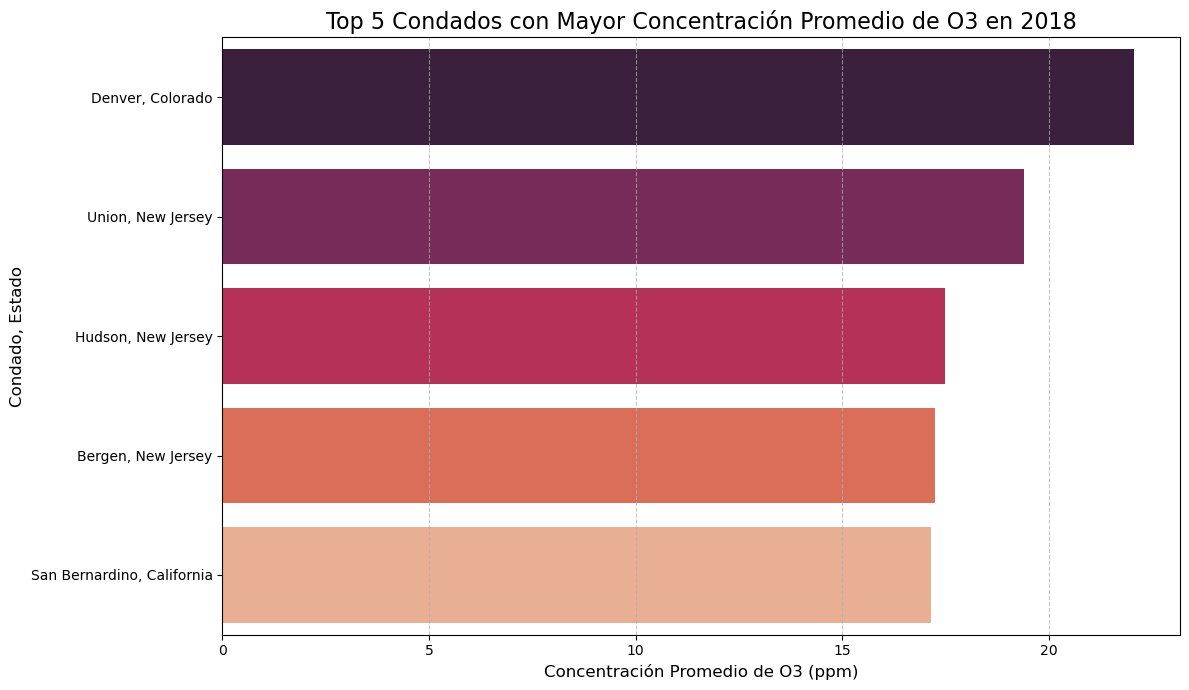


🎉 ¡Gráfico generado exitosamente!


In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text
from db_connection import get_engine

# --- 1) Conexión ---
print("Estableciendo conexión a la base de datos...")
engine = get_engine()
print("✅ Conexión exitosa.")

# Parámetros
year = 2018
parameter_code = 42602         # O3
pollutant_name = "O3"
date_from = f"{year}-01-01"
date_to   = f"{year+1}-01-01"

# --- 2) Consulta optimizada: Top 5 condados por CO en {year} ---
print(f"\nEjecutando consulta para Top 5 ubicaciones con mayor {pollutant_name} en {year}...")

sql = text("""
    SELECT
        l.state_name,
        l.county_name,
        AVG(m.value) AS promedio_valor_medido
    FROM measurement m FORCE INDEX (idx_m_param_date)
    JOIN station   s ON m.station_id  = s.station_id
    JOIN location  l ON s.location_id = l.location_id
    WHERE m.parameter_id = (
            SELECT parameter_id
            FROM parameter
            WHERE parameter_code = :code
          )
      AND m.date_local >= :dfrom
      AND m.date_local <  :dto
    GROUP BY l.state_name, l.county_name
    ORDER BY promedio_valor_medido DESC
    LIMIT 5;
""")

try:
    df_top = pd.read_sql(sql, con=engine, params={"code": parameter_code,
                                                  "dfrom": date_from, "dto": date_to})
    if df_top.empty:
        raise ValueError("La consulta no devolvió filas.")
    print("✅ Datos cargados exitosamente:")
    print(df_top)
except Exception as e:
    print(f"❌ Error al ejecutar la consulta: {e}")
    raise

# --- 3) Visualización ---
print("\nGenerando gráfico de barras...")
plt.figure(figsize=(12, 7))
sns.barplot(
    x="promedio_valor_medido",
    y=df_top["county_name"] + ", " + df_top["state_name"],
    data=df_top,
    palette="rocket"
)
plt.title(f"Top 5 Condados con Mayor Concentración Promedio de {pollutant_name} en {year}", fontsize=16)
plt.xlabel(f"Concentración Promedio de {pollutant_name} (ppm)", fontsize=12)
plt.ylabel("Condado, Estado", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Guardar imagen (en /exportados)
carpeta_exportados = "exportados"
os.makedirs(carpeta_exportados, exist_ok=True)
img_path = os.path.join(carpeta_exportados,
                        f"top5_{pollutant_name.lower()}_{year}.png")
plt.savefig(img_path, dpi=300)
print(f"🖼 Imagen guardada como {img_path}")

# Guardar CSV (en raíz, como vienes haciendo)
csv_path = f"top_5_{pollutant_name.lower()}_{year}.csv"
df_top.to_csv(csv_path, index=False)
print(f"📁 CSV guardado como '{csv_path}'")

plt.show()
print("\n🎉 ¡Gráfico generado exitosamente!")


## **✅ Script: Tendencia Anual de CO (Monóxido de Carbono)**

Estableciendo conexión a la base de datos...
✅ Conexión establecida.
🔎 Años disponibles para CO: 2015–2024
✅ Consulta exitosa. Vista previa:
   anio  promedio_anual_valor
0  2015              0.332350
1  2016              0.327349
2  2017              0.324848
3  2018              0.315937
4  2019              0.298481
📁 CSV guardado como: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\tendencia_anual_NO2.csv

Generando gráfico…
🖼 Imagen guardada como exportados\tendencia_anual_NO2.png


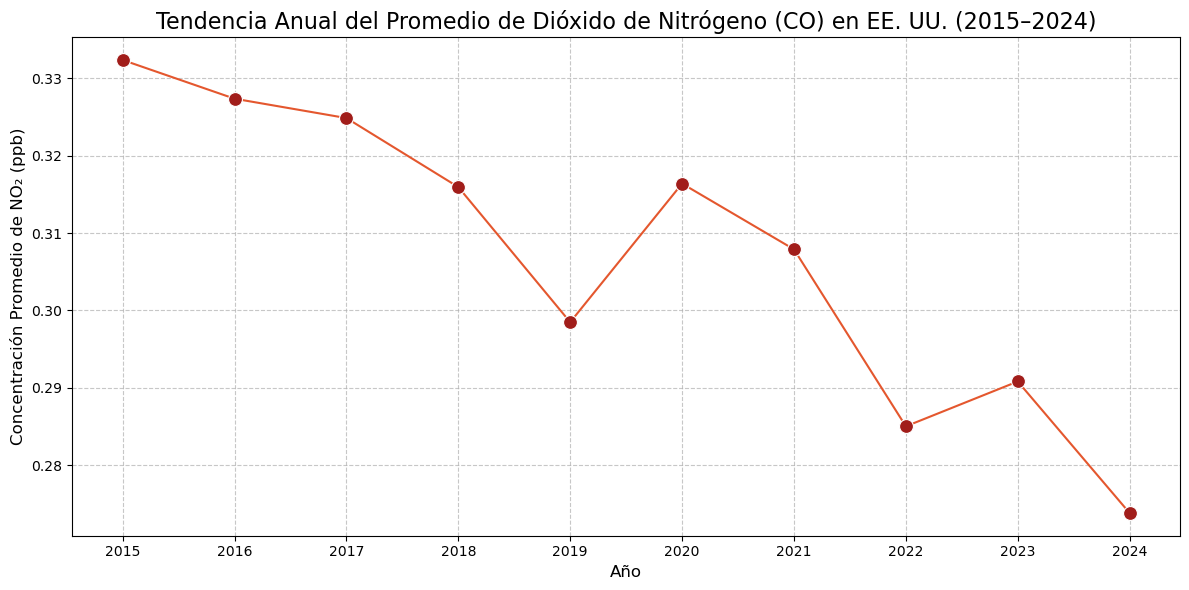


🎉 ¡Tendencia anual generada y CSV exportado!


In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text
from db_connection import get_engine

# --- 1) Conexión ---
print("Estableciendo conexión a la base de datos...")
engine = get_engine()
print("✅ Conexión establecida.")

# Parámetros
parameter_code = 42101          # CO
pollutant_name = "CO"

with engine.begin() as conn:
    # --- 2) Rango de años dinámico (rápido usando el índice) ---
    yr = conn.execute(text("""
        SELECT MIN(YEAR(m.date_local)) AS y_from,
               MAX(YEAR(m.date_local)) AS y_to
        FROM measurement m FORCE INDEX (idx_m_param_date)
        WHERE m.parameter_id = (
            SELECT parameter_id FROM parameter WHERE parameter_code = :code
        )
    """), {"code": parameter_code}).mappings().one()

    y_from, y_to = int(yr["y_from"]), int(yr["y_to"])
    date_from, date_to = f"{y_from}-01-01", f"{y_to+1}-01-01"
    print(f"🔎 Años disponibles para {pollutant_name}: {y_from}–{y_to}")

    # --- 3) Tendencia anual (usa rango de fechas + índice) ---
    sql = text("""
        SELECT
            YEAR(m.date_local) AS anio,
            AVG(m.value)       AS promedio_anual_valor
        FROM measurement m FORCE INDEX (idx_m_param_date)
        WHERE m.parameter_id = (
            SELECT parameter_id FROM parameter WHERE parameter_code = :code
        )
          AND m.date_local >= :dfrom
          AND m.date_local <  :dto
        GROUP BY anio
        ORDER BY anio;
    """)
    df = pd.read_sql(sql, con=conn,
                     params={"code": parameter_code, "dfrom": date_from, "dto": date_to})

print("✅ Consulta exitosa. Vista previa:")
print(df.head())

# --- 4) Guardar CSV ---
csv_name = "tendencia_anual_NO2.csv"
df.to_csv(csv_name, index=False)
print(f"📁 CSV guardado como: {os.path.abspath(csv_name)}")

# --- 5) Visualización ---
print("\nGenerando gráfico…")
plt.figure(figsize=(12, 6))
sns.lineplot(x="anio", y="promedio_anual_valor", data=df, marker="o", color="#e4572e")   # coral-ish
sns.scatterplot(x="anio", y="promedio_anual_valor", data=df, color="#a11d1a", s=100, zorder=5)

plt.title(f"Tendencia Anual del Promedio de Dióxido de Nitrógeno ({pollutant_name}) en EE. UU. ({y_from}–{y_to})", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Concentración Promedio de NO₂ (ppb)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(df["anio"].astype(int))
plt.tight_layout()

# Exportar imagen
os.makedirs("exportados", exist_ok=True)
img_path = os.path.join("exportados", "tendencia_anual_NO2.png")
plt.savefig(img_path, dpi=300)
print(f"🖼 Imagen guardada como {img_path}")

plt.show()
print("\n🎉 ¡Tendencia anual generada y CSV exportado!")


## **✅ Script: Tendencia Anual de NO₂ (Dióxido de Nitrógeno)**

Estableciendo conexión a la base de datos...
✅ Conexión establecida.
🔎 Años disponibles para NO2: 2015–2024
✅ Consulta exitosa. Vista previa:
   anio  promedio_anual_valor
0  2015             10.241055
1  2016             10.139378
2  2017             10.143455
3  2018              9.857972
4  2019              9.635688
📁 CSV guardado como: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\tendencia_anual_NO2.csv

Generando gráfico…
🖼 Imagen guardada como exportados\tendencia_anual_NO2.png


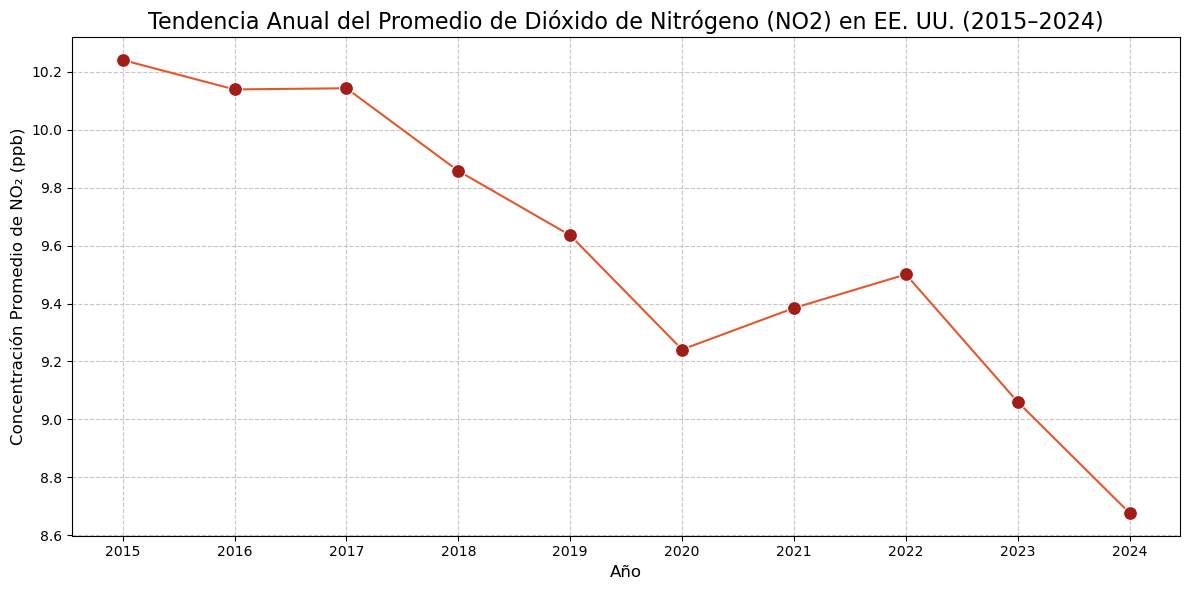


🎉 ¡Tendencia anual generada y CSV exportado!


In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text
from db_connection import get_engine

# --- 1) Conexión ---
print("Estableciendo conexión a la base de datos...")
engine = get_engine()
print("✅ Conexión establecida.")

# Parámetros
parameter_code = 42602          # NO2
pollutant_name = "NO2"

with engine.begin() as conn:
    # --- 2) Rango de años dinámico (rápido usando el índice) ---
    yr = conn.execute(text("""
        SELECT MIN(YEAR(m.date_local)) AS y_from,
               MAX(YEAR(m.date_local)) AS y_to
        FROM measurement m FORCE INDEX (idx_m_param_date)
        WHERE m.parameter_id = (
            SELECT parameter_id FROM parameter WHERE parameter_code = :code
        )
    """), {"code": parameter_code}).mappings().one()

    y_from, y_to = int(yr["y_from"]), int(yr["y_to"])
    date_from, date_to = f"{y_from}-01-01", f"{y_to+1}-01-01"
    print(f"🔎 Años disponibles para {pollutant_name}: {y_from}–{y_to}")

    # --- 3) Tendencia anual (usa rango de fechas + índice) ---
    sql = text("""
        SELECT
            YEAR(m.date_local) AS anio,
            AVG(m.value)       AS promedio_anual_valor
        FROM measurement m FORCE INDEX (idx_m_param_date)
        WHERE m.parameter_id = (
            SELECT parameter_id FROM parameter WHERE parameter_code = :code
        )
          AND m.date_local >= :dfrom
          AND m.date_local <  :dto
        GROUP BY anio
        ORDER BY anio;
    """)
    df = pd.read_sql(sql, con=conn,
                     params={"code": parameter_code, "dfrom": date_from, "dto": date_to})

print("✅ Consulta exitosa. Vista previa:")
print(df.head())

# --- 4) Guardar CSV ---
csv_name = "tendencia_anual_NO2.csv"
df.to_csv(csv_name, index=False)
print(f"📁 CSV guardado como: {os.path.abspath(csv_name)}")

# --- 5) Visualización ---
print("\nGenerando gráfico…")
plt.figure(figsize=(12, 6))
sns.lineplot(x="anio", y="promedio_anual_valor", data=df, marker="o", color="#e4572e")   # coral-ish
sns.scatterplot(x="anio", y="promedio_anual_valor", data=df, color="#a11d1a", s=100, zorder=5)

plt.title(f"Tendencia Anual del Promedio de Dióxido de Nitrógeno ({pollutant_name}) en EE. UU. ({y_from}–{y_to})", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Concentración Promedio de NO₂ (ppb)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(df["anio"].astype(int))
plt.tight_layout()

# Exportar imagen
os.makedirs("exportados", exist_ok=True)
img_path = os.path.join("exportados", "tendencia_anual_NO2.png")
plt.savefig(img_path, dpi=300)
print(f"🖼 Imagen guardada como {img_path}")

plt.show()
print("\n🎉 ¡Tendencia anual generada y CSV exportado!")


## **✅ Script: Tendencia Anual de SO₂ (Dióxido de Azufre)**

Estableciendo conexión a la base de datos...
✅ Conexión establecida.
🔎 Años disponibles para SO2: 2015–2024
✅ Consulta exitosa. Vista previa:
   anio  promedio_anual_valor
0  2015              1.305527
1  2016              1.242712
2  2017              1.182116
3  2018              1.105378
4  2019              0.715502
📁 CSV guardado como: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\tendencia_anual_NO2.csv

Generando gráfico…
🖼 Imagen guardada como exportados\tendencia_anual_NO2.png


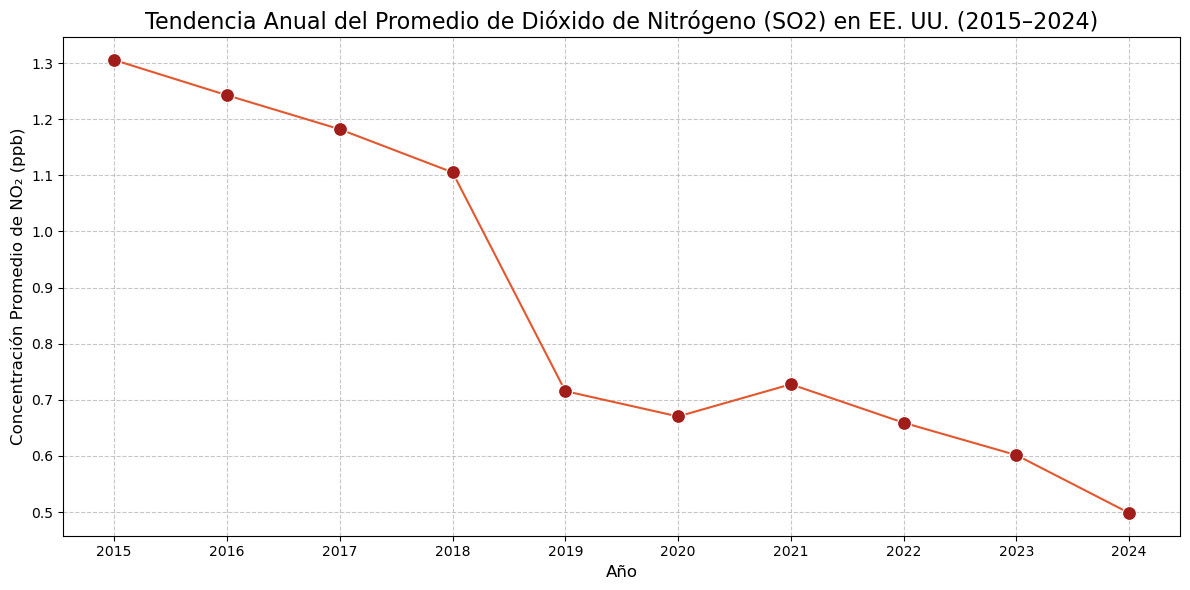


🎉 ¡Tendencia anual generada y CSV exportado!


In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text
from db_connection import get_engine

# --- 1) Conexión ---
print("Estableciendo conexión a la base de datos...")
engine = get_engine()
print("✅ Conexión establecida.")

# Parámetros
parameter_code = 42401          # SO2
pollutant_name = "SO2"

with engine.begin() as conn:
    # --- 2) Rango de años dinámico (rápido usando el índice) ---
    yr = conn.execute(text("""
        SELECT MIN(YEAR(m.date_local)) AS y_from,
               MAX(YEAR(m.date_local)) AS y_to
        FROM measurement m FORCE INDEX (idx_m_param_date)
        WHERE m.parameter_id = (
            SELECT parameter_id FROM parameter WHERE parameter_code = :code
        )
    """), {"code": parameter_code}).mappings().one()

    y_from, y_to = int(yr["y_from"]), int(yr["y_to"])
    date_from, date_to = f"{y_from}-01-01", f"{y_to+1}-01-01"
    print(f"🔎 Años disponibles para {pollutant_name}: {y_from}–{y_to}")

    # --- 3) Tendencia anual (usa rango de fechas + índice) ---
    sql = text("""
        SELECT
            YEAR(m.date_local) AS anio,
            AVG(m.value)       AS promedio_anual_valor
        FROM measurement m FORCE INDEX (idx_m_param_date)
        WHERE m.parameter_id = (
            SELECT parameter_id FROM parameter WHERE parameter_code = :code
        )
          AND m.date_local >= :dfrom
          AND m.date_local <  :dto
        GROUP BY anio
        ORDER BY anio;
    """)
    df = pd.read_sql(sql, con=conn,
                     params={"code": parameter_code, "dfrom": date_from, "dto": date_to})

print("✅ Consulta exitosa. Vista previa:")
print(df.head())

# --- 4) Guardar CSV ---
csv_name = "tendencia_anual_NO2.csv"
df.to_csv(csv_name, index=False)
print(f"📁 CSV guardado como: {os.path.abspath(csv_name)}")

# --- 5) Visualización ---
print("\nGenerando gráfico…")
plt.figure(figsize=(12, 6))
sns.lineplot(x="anio", y="promedio_anual_valor", data=df, marker="o", color="#e4572e")   # coral-ish
sns.scatterplot(x="anio", y="promedio_anual_valor", data=df, color="#a11d1a", s=100, zorder=5)

plt.title(f"Tendencia Anual del Promedio de Dióxido de Nitrógeno ({pollutant_name}) en EE. UU. ({y_from}–{y_to})", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Concentración Promedio de NO₂ (ppb)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(df["anio"].astype(int))
plt.tight_layout()

# Exportar imagen
os.makedirs("exportados", exist_ok=True)
img_path = os.path.join("exportados", "tendencia_anual_NO2.png")
plt.savefig(img_path, dpi=300)
print(f"🖼 Imagen guardada como {img_path}")

plt.show()
print("\n🎉 ¡Tendencia anual generada y CSV exportado!")


## **✅ Script: Tendencia Anual de Ozono (O₃)**

Estableciendo conexión a la base de datos...
✅ Conexión establecida.
🔎 Años disponibles para O₃: 2015–2024
✅ Consulta exitosa. Vista previa:
   anio  promedio_anual_valor
0  2015             10.241055
1  2016             10.139378
2  2017             10.143455
3  2018              9.857972
4  2019              9.635688
📁 CSV guardado como: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\tendencia_anual_NO2.csv

Generando gráfico…
🖼 Imagen guardada como exportados\tendencia_anual_NO2.png


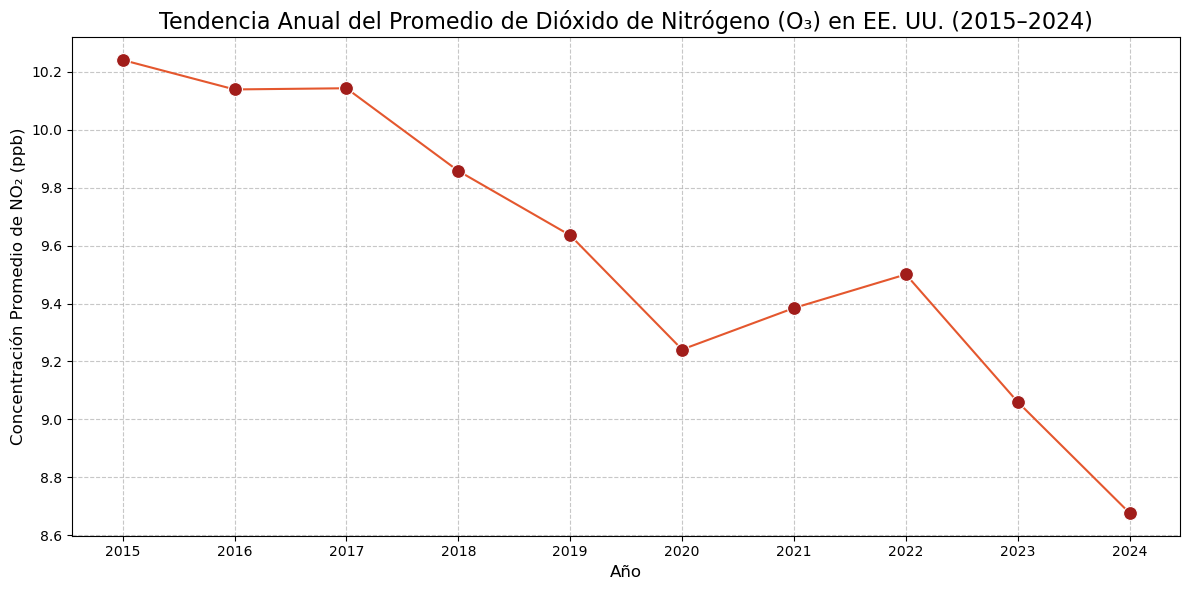


🎉 ¡Tendencia anual generada y CSV exportado!


In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text
from db_connection import get_engine

# --- 1) Conexión ---
print("Estableciendo conexión a la base de datos...")
engine = get_engine()
print("✅ Conexión establecida.")

# Parámetros
parameter_code = 42602          # O3
pollutant_name = "O₃"

with engine.begin() as conn:
    # --- 2) Rango de años dinámico (rápido usando el índice) ---
    yr = conn.execute(text("""
        SELECT MIN(YEAR(m.date_local)) AS y_from,
               MAX(YEAR(m.date_local)) AS y_to
        FROM measurement m FORCE INDEX (idx_m_param_date)
        WHERE m.parameter_id = (
            SELECT parameter_id FROM parameter WHERE parameter_code = :code
        )
    """), {"code": parameter_code}).mappings().one()

    y_from, y_to = int(yr["y_from"]), int(yr["y_to"])
    date_from, date_to = f"{y_from}-01-01", f"{y_to+1}-01-01"
    print(f"🔎 Años disponibles para {pollutant_name}: {y_from}–{y_to}")

    # --- 3) Tendencia anual (usa rango de fechas + índice) ---
    sql = text("""
        SELECT
            YEAR(m.date_local) AS anio,
            AVG(m.value)       AS promedio_anual_valor
        FROM measurement m FORCE INDEX (idx_m_param_date)
        WHERE m.parameter_id = (
            SELECT parameter_id FROM parameter WHERE parameter_code = :code
        )
          AND m.date_local >= :dfrom
          AND m.date_local <  :dto
        GROUP BY anio
        ORDER BY anio;
    """)
    df = pd.read_sql(sql, con=conn,
                     params={"code": parameter_code, "dfrom": date_from, "dto": date_to})

print("✅ Consulta exitosa. Vista previa:")
print(df.head())

# --- 4) Guardar CSV ---
csv_name = "tendencia_anual_NO2.csv"
df.to_csv(csv_name, index=False)
print(f"📁 CSV guardado como: {os.path.abspath(csv_name)}")

# --- 5) Visualización ---
print("\nGenerando gráfico…")
plt.figure(figsize=(12, 6))
sns.lineplot(x="anio", y="promedio_anual_valor", data=df, marker="o", color="#e4572e")   # coral-ish
sns.scatterplot(x="anio", y="promedio_anual_valor", data=df, color="#a11d1a", s=100, zorder=5)

plt.title(f"Tendencia Anual del Promedio de Dióxido de Nitrógeno ({pollutant_name}) en EE. UU. ({y_from}–{y_to})", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Concentración Promedio de NO₂ (ppb)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(df["anio"].astype(int))
plt.tight_layout()

# Exportar imagen
os.makedirs("exportados", exist_ok=True)
img_path = os.path.join("exportados", "tendencia_anual_NO2.png")
plt.savefig(img_path, dpi=300)
print(f"🖼 Imagen guardada como {img_path}")

plt.show()
print("\n🎉 ¡Tendencia anual generada y CSV exportado!")


## **✅ Script: Promedios Anuales Estatales**

In [29]:
import os
import pandas as pd
from sqlalchemy import text
from db_connection import get_engine

# 1) Conexión
engine = get_engine()
print("✅ Conexión OK.")

# Parámetros (años del dataset)
y_from, y_to = 2015, 2024

# Códigos de contaminantes: CO, NO2, O3, SO2
codes = (42101, 42602, 44201, 42401)

# 2) Consulta (contra la fact table)
sql = text(f"""
    SELECT
        parameter_code,
        parameter_name,
        state_name,
        anio,
        promedio_anual_estado
    FROM fact_estado_anual FORCE INDEX (idx_anio_param)
    WHERE parameter_code IN {codes}
      AND anio BETWEEN :y_from AND :y_to
    ORDER BY parameter_code, state_name, anio;
""")

df = pd.read_sql(sql, con=engine, params={"y_from": y_from, "y_to": y_to})
print(f"✅ Filas devueltas: {len(df):,}")
print(df.head())

# 3) Guardar CSV (para Power BI)
out_csv = "promedios_anuales_estatales.csv"
df.to_csv(out_csv, index=False)
print(f"📁 CSV exportado como '{os.path.abspath(out_csv)}'")


✅ Conexión OK.
✅ Filas devueltas: 2,034
   parameter_code   parameter_name state_name  anio  promedio_anual_estado
0           42101  Carbon monoxide    Alabama  2015               0.382038
1           42101  Carbon monoxide    Alabama  2016               0.337608
2           42101  Carbon monoxide    Alabama  2017               0.302204
3           42101  Carbon monoxide    Alabama  2018               0.255708
4           42101  Carbon monoxide    Alabama  2019               0.286627
📁 CSV exportado como 'C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\promedios_anuales_estatales.csv'


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   parameter_code         2034 non-null   int64  
 1   parameter_name         2034 non-null   object 
 2   state_name             2034 non-null   object 
 3   anio                   2034 non-null   int64  
 4   promedio_anual_estado  2034 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 79.6+ KB


In [31]:
df

parameter_code   parameter_name state_name  anio  promedio_anual_estado
0              42101  Carbon monoxide    Alabama  2015               0.382038
1              42101  Carbon monoxide    Alabama  2016               0.337608
2              42101  Carbon monoxide    Alabama  2017               0.302204
3              42101  Carbon monoxide    Alabama  2018               0.255708
4              42101  Carbon monoxide    Alabama  2019               0.286627
...              ...              ...        ...   ...                    ...
2029           44201            Ozone    Wyoming  2020               0.038730
2030           44201            Ozone    Wyoming  2021               0.039853
2031           44201            Ozone    Wyoming  2022               0.038555
2032           44201            Ozone    Wyoming  2023               0.039731
2033           44201            Ozone    Wyoming  2024               0.040383

[2034 rows x 5 columns]

🖼 exportados/tendencia_anual_California.png
📁 exportados/tendencia_anual_California.csv


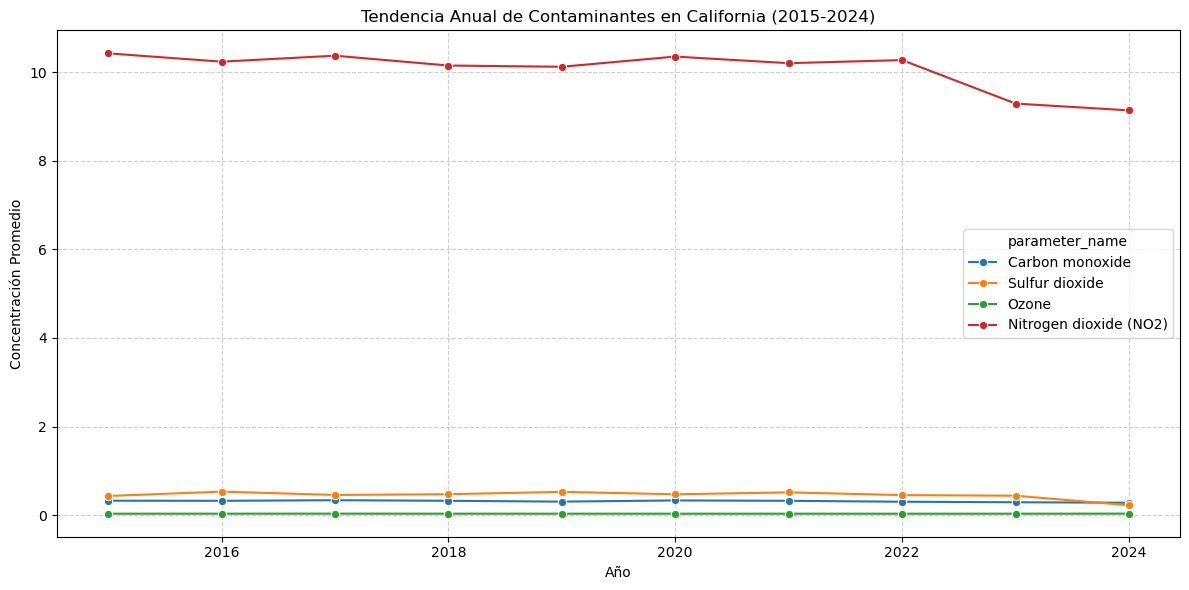

In [32]:
import os, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from db_connection import get_engine
from sqlalchemy import text

estado = "California"          # ← cámbialo
y_from, y_to = 2015, 2024

engine = get_engine()
sql = text("""
SELECT parameter_name, anio, promedio_anual_estado
FROM fact_estado_anual
WHERE state_name = :estado AND anio BETWEEN :yfrom AND :yto
ORDER BY anio;
""")
df = pd.read_sql(sql, engine, params={"estado": estado, "yfrom": y_from, "yto": y_to})

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="anio", y="promedio_anual_estado",
             hue="parameter_name", marker="o")
plt.title(f"Tendencia Anual de Contaminantes en {estado} ({y_from}-{y_to})")
plt.xlabel("Año"); plt.ylabel("Concentración Promedio")
plt.grid(True, linestyle="--", alpha=.6); plt.tight_layout()

os.makedirs("exportados", exist_ok=True)
fname_png = f"exportados/tendencia_anual_{estado.replace(' ','_')}.png"
fname_csv = f"exportados/tendencia_anual_{estado.replace(' ','_')}.csv"
plt.savefig(fname_png, dpi=300)
df.to_csv(fname_csv, index=False)
print(f"🖼 {fname_png}\n📁 {fname_csv}")
plt.show()


## **✅ Script: Top 10 Estados por Contaminante**

Estableciendo conexión...
✅ Conexión OK.
📁 CSV guardado: exportados/top10_estados_Nitrogen_dioxide_(NO2)_2024.csv


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_13760\951556620.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼 Imagen guardada: exportados/top10_estados_Nitrogen_dioxide_(NO2)_2024.png


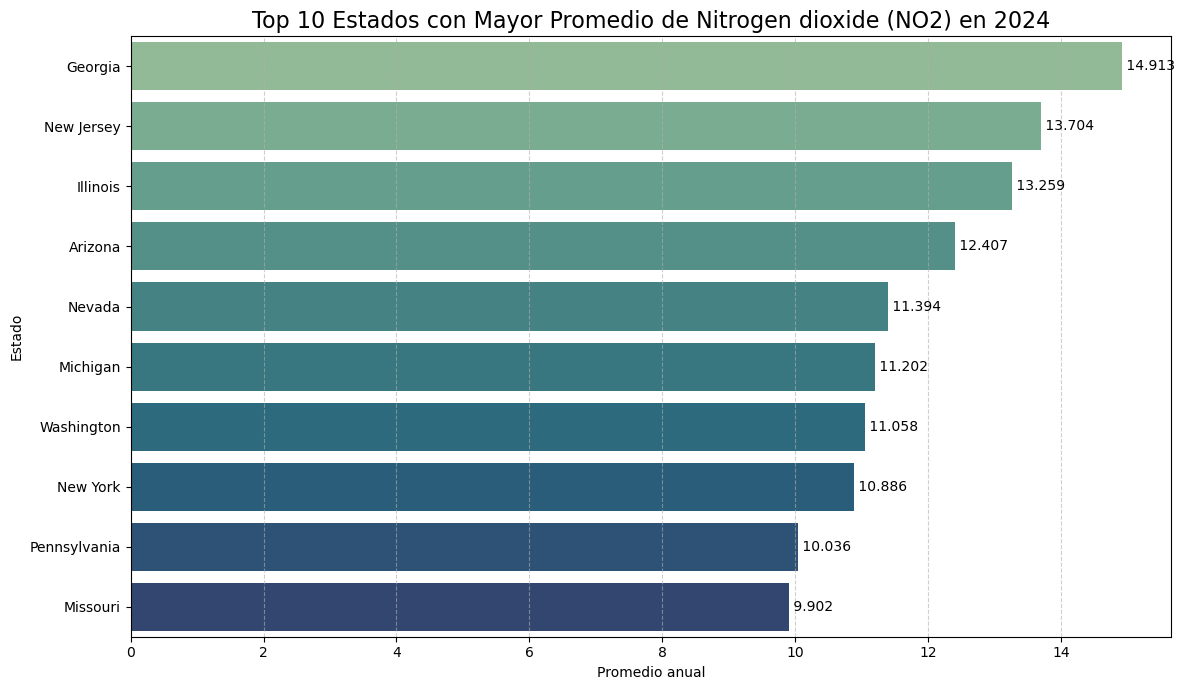

🎉 ¡Top-10 generado!


In [33]:
# Top-10 estados por contaminante y año (usa fact_estado_anual)
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text
from db_connection import get_engine

# ------------------ Parámetros ------------------
anio = 2024                      # << cambia el año
parameter_code = 42602           # << 42101=CO, 42401=SO2, 42602=NO2, 44201=O3
palette_name = "crest"        # otras: "crest", "mako", "viridis", "magma", "flare", "icefire"
dpi = 300

# Mapeo opcional para nombres bonitos
CODE2NAME = {
    42101: "Carbon monoxide",
    42401: "Sulfur dioxide",
    42602: "Nitrogen dioxide (NO2)",
    44201: "Ozone",
}

# ------------------ Conexión ------------------
print("Estableciendo conexión...")
engine = get_engine()
print("✅ Conexión OK.")

# ------------------ Consulta (rápida) ------------------
sql = text("""
    SELECT state_name,
           promedio_anual_estado
    FROM fact_estado_anual
    WHERE parameter_code = :code
      AND anio = :anio
    ORDER BY promedio_anual_estado DESC
    LIMIT 10;
""")

df = pd.read_sql(sql, con=engine, params={"code": parameter_code, "anio": anio})
if df.empty:
    raise ValueError("La consulta no devolvió filas. ¿Seguro que ese año/contaminante existen en la tabla fact_estado_anual?")

# Para el título y archivos
pname = CODE2NAME.get(parameter_code, str(parameter_code))

# ------------------ Guardar CSV ------------------
os.makedirs("exportados", exist_ok=True)
csv_path = f"exportados/top10_estados_{pname.replace(' ', '_')}_{anio}.csv"
df.to_csv(csv_path, index=False)
print(f"📁 CSV guardado: {csv_path}")

# ------------------ Gráfico ------------------
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df,
    y="state_name",
    x="promedio_anual_estado",
    palette=palette_name,
    order=df.sort_values("promedio_anual_estado", ascending=False)["state_name"]
)

plt.title(f"Top 10 Estados con Mayor Promedio de {pname} en {anio}", fontsize=16)
plt.xlabel("Promedio anual")
plt.ylabel("Estado")
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Etiquetas de valor al final de cada barra
for i, v in enumerate(df.sort_values("promedio_anual_estado", ascending=False)["promedio_anual_estado"]):
    plt.text(v, i, f" {v:.3f}", va="center", fontsize=10)

plt.tight_layout()

png_path = f"exportados/top10_estados_{pname.replace(' ', '_')}_{anio}.png"
plt.savefig(png_path, dpi=dpi)
print(f"🖼 Imagen guardada: {png_path}")

plt.show()
print("🎉 ¡Top-10 generado!")


Estableciendo conexión...
✅ Conexión OK.
📁 CSV guardado: exportados/top10_estados_Carbon_monoxide_2024.csv


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_13760\865404175.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼 Imagen guardada: exportados/top10_estados_Carbon_monoxide_2024.png


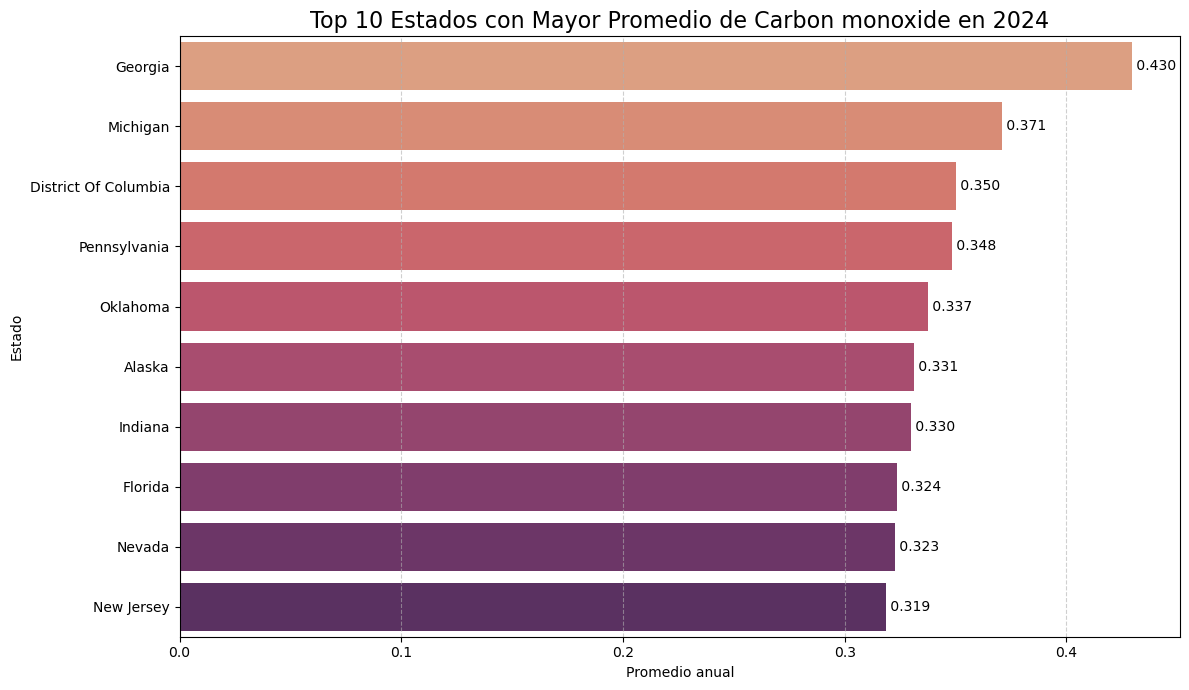

🎉 ¡Top-10 generado!


In [34]:
# Top-10 estados por contaminante y año (usa fact_estado_anual)
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text
from db_connection import get_engine

# ------------------ Parámetros ------------------
anio = 2024                      # << cambia el año
parameter_code = 42101           # << 42101=CO, 42401=SO2, 42602=NO2, 44201=O3
palette_name = "flare"        # otras: "crest", "mako", "viridis", "magma", "flare", "icefire"
dpi = 300

# Mapeo opcional para nombres bonitos
CODE2NAME = {
    42101: "Carbon monoxide",
    42401: "Sulfur dioxide",
    42602: "Nitrogen dioxide (NO2)",
    44201: "Ozone",
}

# ------------------ Conexión ------------------
print("Estableciendo conexión...")
engine = get_engine()
print("✅ Conexión OK.")

# ------------------ Consulta (rápida) ------------------
sql = text("""
    SELECT state_name,
           promedio_anual_estado
    FROM fact_estado_anual
    WHERE parameter_code = :code
      AND anio = :anio
    ORDER BY promedio_anual_estado DESC
    LIMIT 10;
""")

df = pd.read_sql(sql, con=engine, params={"code": parameter_code, "anio": anio})
if df.empty:
    raise ValueError("La consulta no devolvió filas. ¿Seguro que ese año/contaminante existen en la tabla fact_estado_anual?")

# Para el título y archivos
pname = CODE2NAME.get(parameter_code, str(parameter_code))

# ------------------ Guardar CSV ------------------
os.makedirs("exportados", exist_ok=True)
csv_path = f"exportados/top10_estados_{pname.replace(' ', '_')}_{anio}.csv"
df.to_csv(csv_path, index=False)
print(f"📁 CSV guardado: {csv_path}")

# ------------------ Gráfico ------------------
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df,
    y="state_name",
    x="promedio_anual_estado",
    palette=palette_name,
    order=df.sort_values("promedio_anual_estado", ascending=False)["state_name"]
)

plt.title(f"Top 10 Estados con Mayor Promedio de {pname} en {anio}", fontsize=16)
plt.xlabel("Promedio anual")
plt.ylabel("Estado")
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Etiquetas de valor al final de cada barra
for i, v in enumerate(df.sort_values("promedio_anual_estado", ascending=False)["promedio_anual_estado"]):
    plt.text(v, i, f" {v:.3f}", va="center", fontsize=10)

plt.tight_layout()

png_path = f"exportados/top10_estados_{pname.replace(' ', '_')}_{anio}.png"
plt.savefig(png_path, dpi=dpi)
print(f"🖼 Imagen guardada: {png_path}")

plt.show()
print("🎉 ¡Top-10 generado!")


Estableciendo conexión...
✅ Conexión OK.
📁 CSV guardado: exportados/top10_estados_Sulfur_dioxide_2024.csv


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_13760\2120298298.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼 Imagen guardada: exportados/top10_estados_Sulfur_dioxide_2024.png


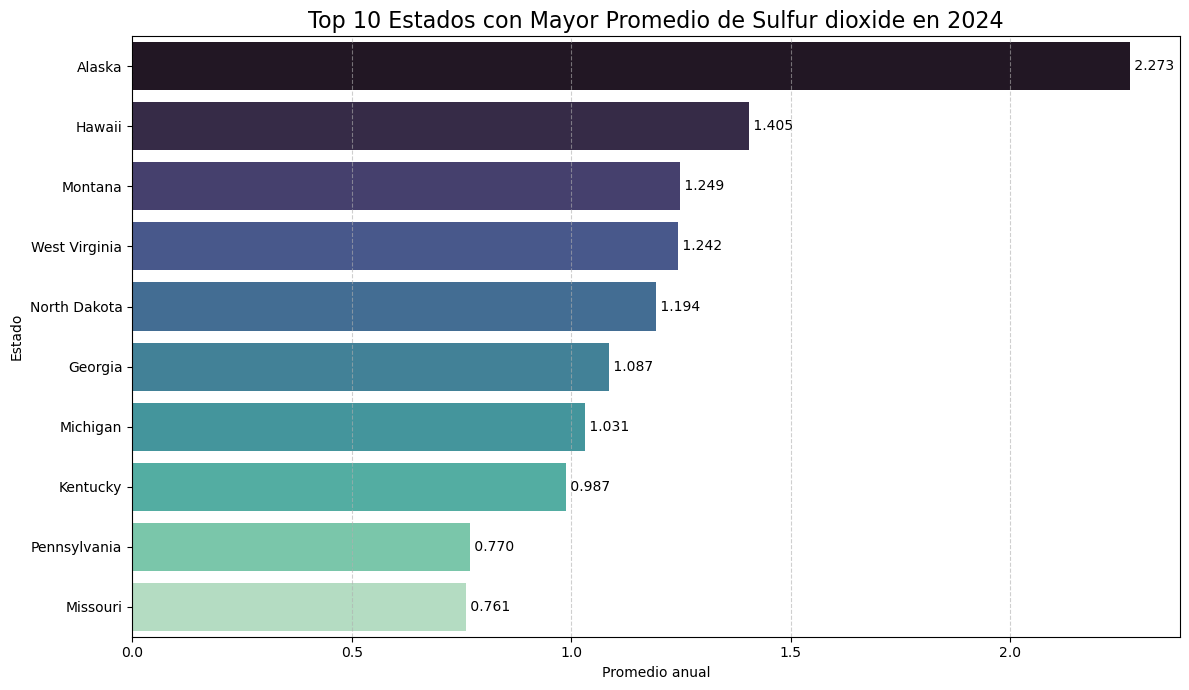

🎉 ¡Top-10 generado!


In [35]:
# Top-10 estados por contaminante y año (usa fact_estado_anual)
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text
from db_connection import get_engine

# ------------------ Parámetros ------------------
anio = 2024                      # << cambia el año
parameter_code = 42401           # << 42101=CO, 42401=SO2, 42602=NO2, 44201=O3
palette_name = "mako"        # otras: "crest", "mako", "viridis", "magma", "flare", "icefire"
dpi = 300

# Mapeo opcional para nombres bonitos
CODE2NAME = {
    42101: "Carbon monoxide",
    42401: "Sulfur dioxide",
    42602: "Nitrogen dioxide (NO2)",
    44201: "Ozone",
}

# ------------------ Conexión ------------------
print("Estableciendo conexión...")
engine = get_engine()
print("✅ Conexión OK.")

# ------------------ Consulta (rápida) ------------------
sql = text("""
    SELECT state_name,
           promedio_anual_estado
    FROM fact_estado_anual
    WHERE parameter_code = :code
      AND anio = :anio
    ORDER BY promedio_anual_estado DESC
    LIMIT 10;
""")

df = pd.read_sql(sql, con=engine, params={"code": parameter_code, "anio": anio})
if df.empty:
    raise ValueError("La consulta no devolvió filas. ¿Seguro que ese año/contaminante existen en la tabla fact_estado_anual?")

# Para el título y archivos
pname = CODE2NAME.get(parameter_code, str(parameter_code))

# ------------------ Guardar CSV ------------------
os.makedirs("exportados", exist_ok=True)
csv_path = f"exportados/top10_estados_{pname.replace(' ', '_')}_{anio}.csv"
df.to_csv(csv_path, index=False)
print(f"📁 CSV guardado: {csv_path}")

# ------------------ Gráfico ------------------
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df,
    y="state_name",
    x="promedio_anual_estado",
    palette=palette_name,
    order=df.sort_values("promedio_anual_estado", ascending=False)["state_name"]
)

plt.title(f"Top 10 Estados con Mayor Promedio de {pname} en {anio}", fontsize=16)
plt.xlabel("Promedio anual")
plt.ylabel("Estado")
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Etiquetas de valor al final de cada barra
for i, v in enumerate(df.sort_values("promedio_anual_estado", ascending=False)["promedio_anual_estado"]):
    plt.text(v, i, f" {v:.3f}", va="center", fontsize=10)

plt.tight_layout()

png_path = f"exportados/top10_estados_{pname.replace(' ', '_')}_{anio}.png"
plt.savefig(png_path, dpi=dpi)
print(f"🖼 Imagen guardada: {png_path}")

plt.show()
print("🎉 ¡Top-10 generado!")


Estableciendo conexión...
✅ Conexión OK.
📁 CSV guardado: exportados/top10_estados_Ozone_2024.csv


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_13760\1143812498.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼 Imagen guardada: exportados/top10_estados_Ozone_2024.png


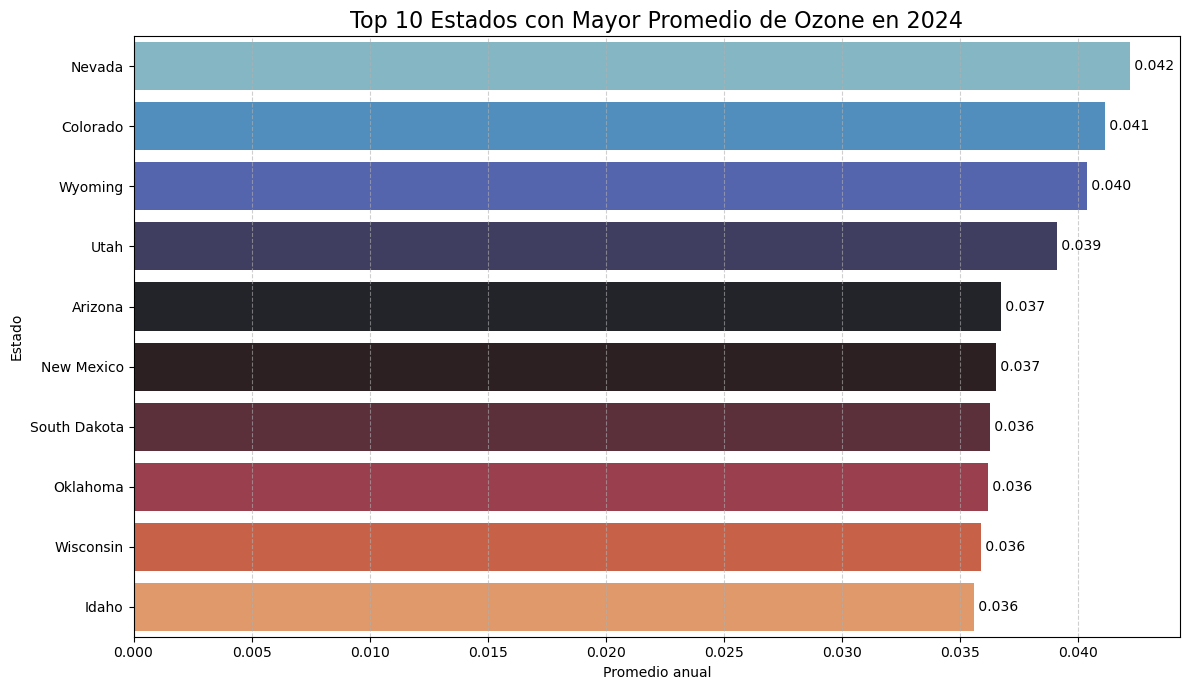

🎉 ¡Top-10 generado!


In [36]:
# Top-10 estados por contaminante y año (usa fact_estado_anual)
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text
from db_connection import get_engine

# ------------------ Parámetros ------------------
anio = 2024                      # << cambia el año
parameter_code = 44201           # << 42101=CO, 42401=SO2, 42602=NO2, 44201=O3
palette_name = "icefire"        # otras: "crest", "mako", "viridis", "magma", "flare", "icefire"
dpi = 300

# Mapeo opcional para nombres bonitos
CODE2NAME = {
    42101: "Carbon monoxide",
    42401: "Sulfur dioxide",
    42602: "Nitrogen dioxide (NO2)",
    44201: "Ozone",
}

# ------------------ Conexión ------------------
print("Estableciendo conexión...")
engine = get_engine()
print("✅ Conexión OK.")

# ------------------ Consulta (rápida) ------------------
sql = text("""
    SELECT state_name,
           promedio_anual_estado
    FROM fact_estado_anual
    WHERE parameter_code = :code
      AND anio = :anio
    ORDER BY promedio_anual_estado DESC
    LIMIT 10;
""")

df = pd.read_sql(sql, con=engine, params={"code": parameter_code, "anio": anio})
if df.empty:
    raise ValueError("La consulta no devolvió filas. ¿Seguro que ese año/contaminante existen en la tabla fact_estado_anual?")

# Para el título y archivos
pname = CODE2NAME.get(parameter_code, str(parameter_code))

# ------------------ Guardar CSV ------------------
os.makedirs("exportados", exist_ok=True)
csv_path = f"exportados/top10_estados_{pname.replace(' ', '_')}_{anio}.csv"
df.to_csv(csv_path, index=False)
print(f"📁 CSV guardado: {csv_path}")

# ------------------ Gráfico ------------------
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df,
    y="state_name",
    x="promedio_anual_estado",
    palette=palette_name,
    order=df.sort_values("promedio_anual_estado", ascending=False)["state_name"]
)

plt.title(f"Top 10 Estados con Mayor Promedio de {pname} en {anio}", fontsize=16)
plt.xlabel("Promedio anual")
plt.ylabel("Estado")
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Etiquetas de valor al final de cada barra
for i, v in enumerate(df.sort_values("promedio_anual_estado", ascending=False)["promedio_anual_estado"]):
    plt.text(v, i, f" {v:.3f}", va="center", fontsize=10)

plt.tight_layout()

png_path = f"exportados/top10_estados_{pname.replace(' ', '_')}_{anio}.png"
plt.savefig(png_path, dpi=dpi)
print(f"🖼 Imagen guardada: {png_path}")

plt.show()
print("🎉 ¡Top-10 generado!")


## **✅ Script: Matriz de Concentración Promedio por Estado**

Estableciendo conexión a la base de datos...
✅ Conexión exitosa.
✅ Datos: 198 filas.
📁 CSV guardado: exportados/heatmap_contaminantes_2024.csv


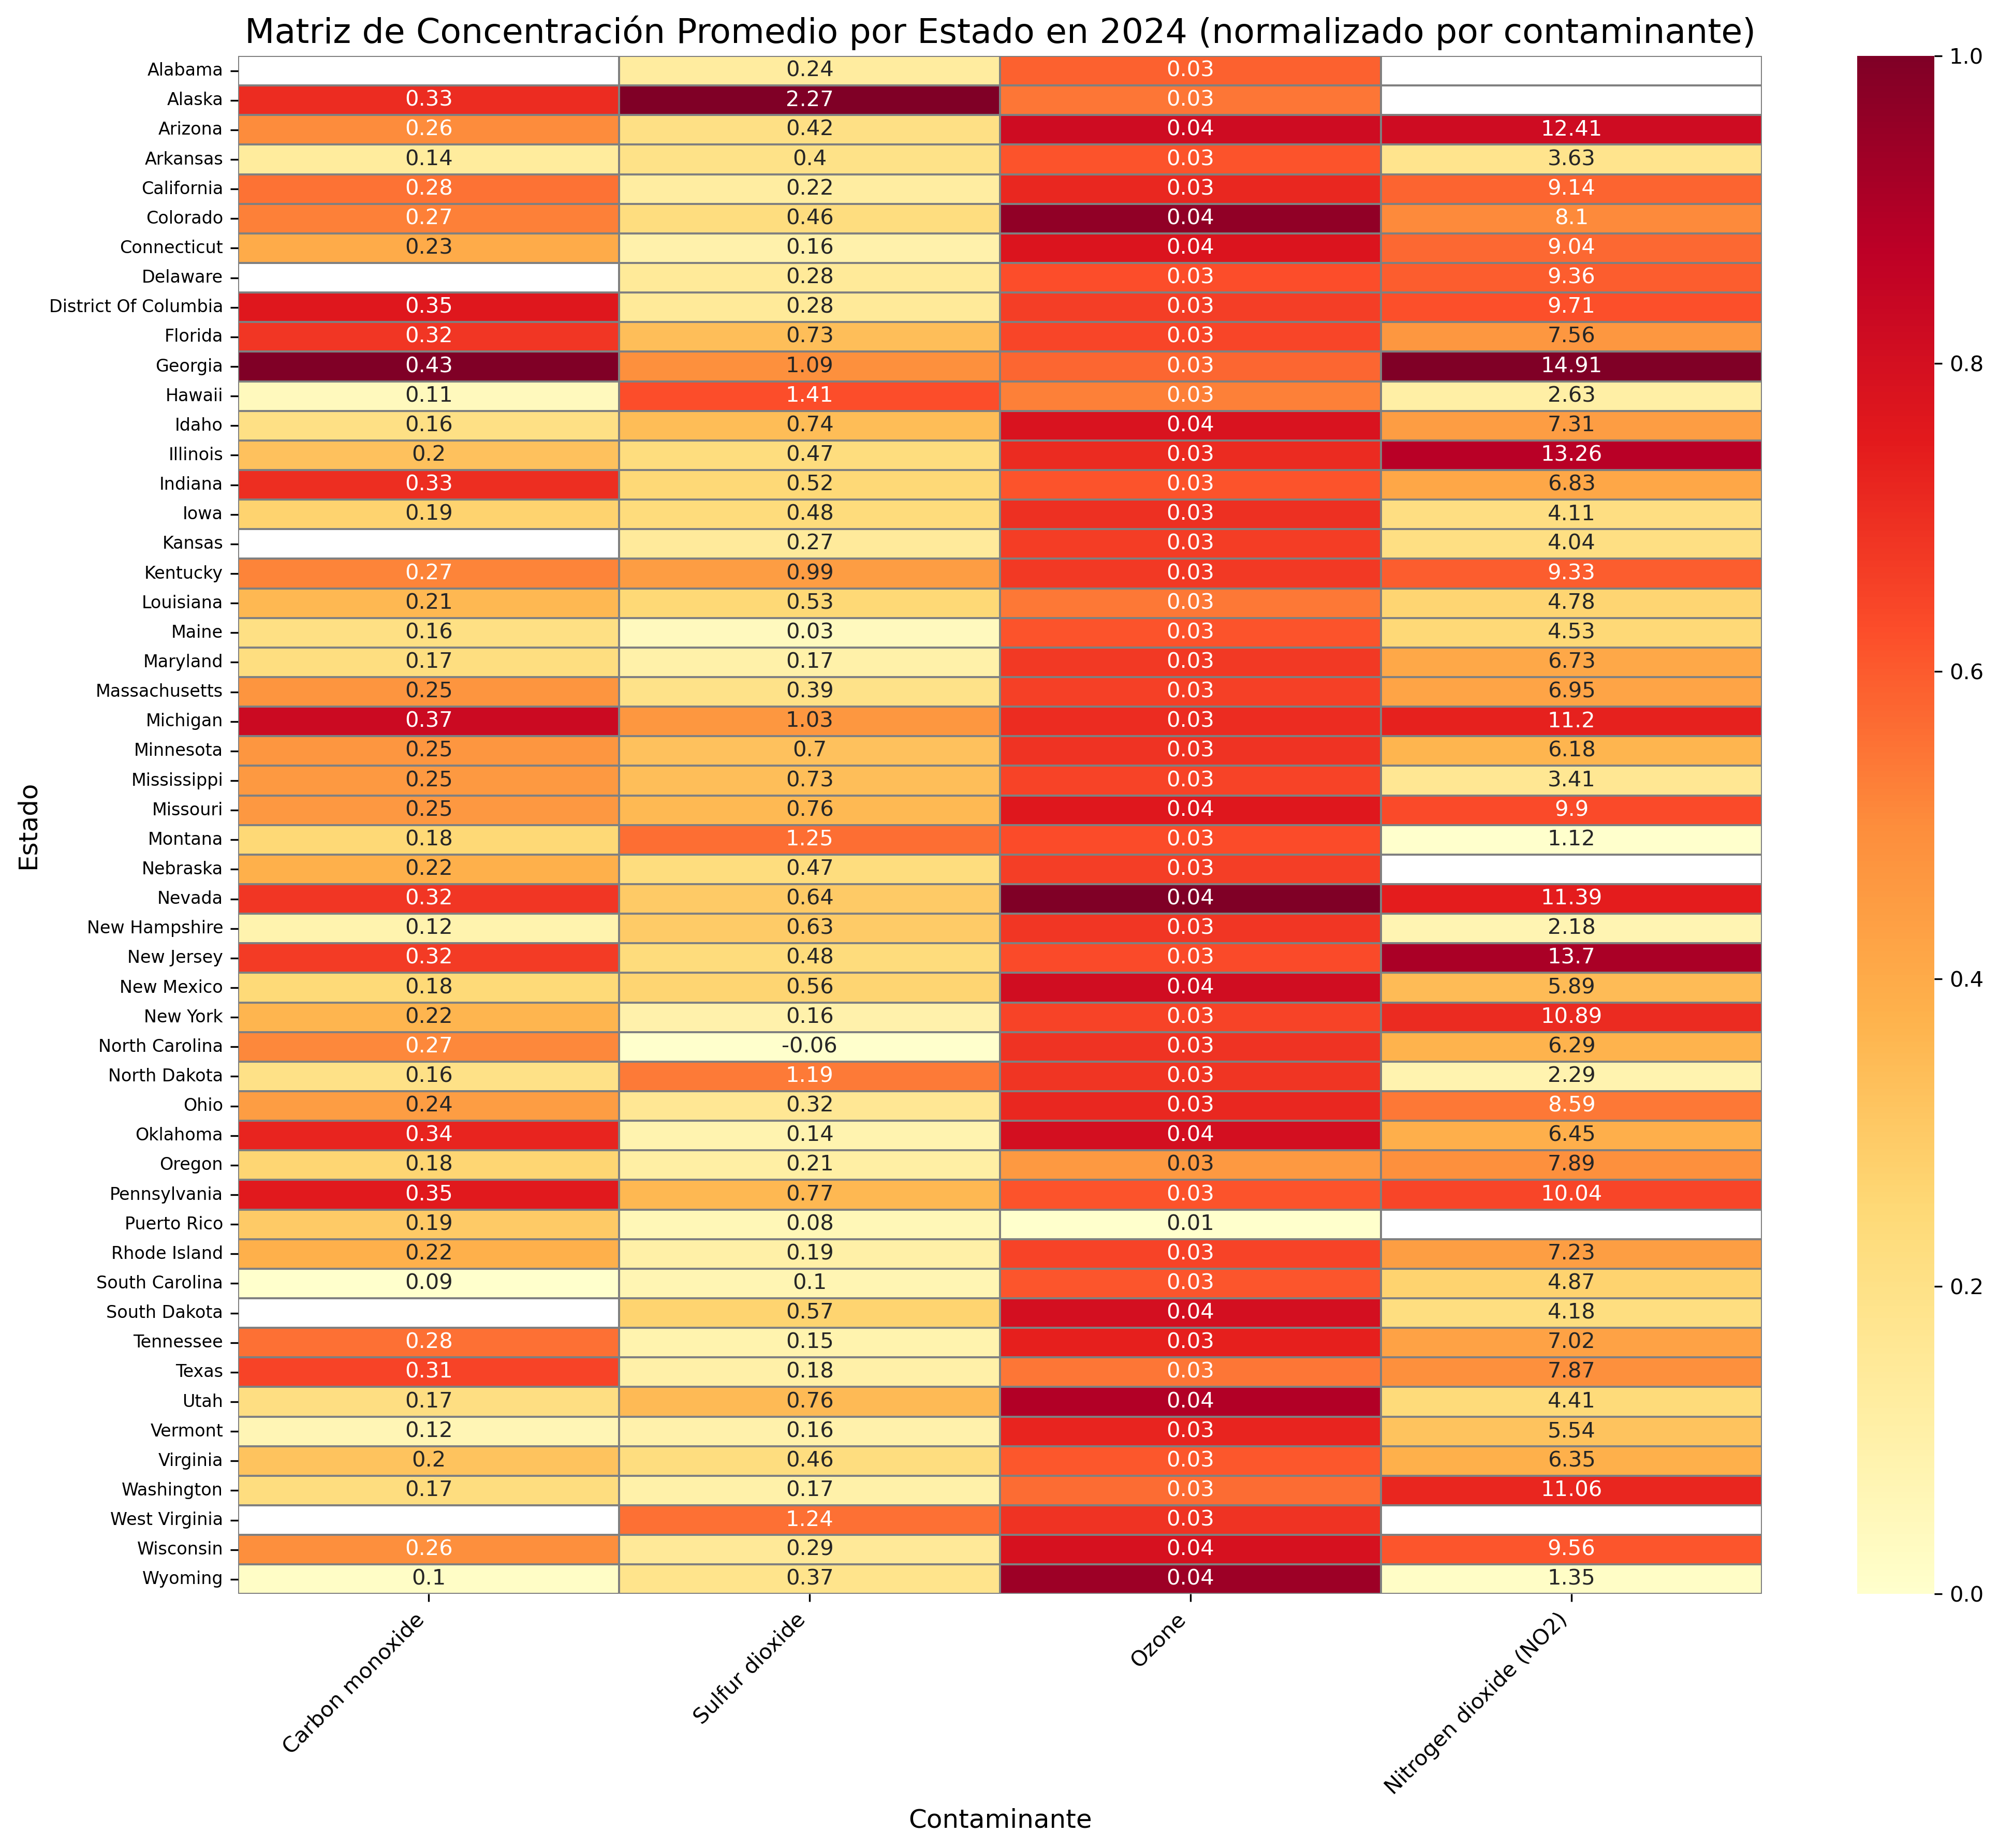

🖼 Imagen guardada como 'exportados/heatmap_contaminantes_2024.png'


In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text
from db_connection import get_engine

# ---------------- Parámetros ----------------
anio = 2024
normalize_per_contaminant = True   # <- pon False si quieres valores reales
cmap = "YlOrRd"                    # otras chulas: "mako", "crest", "rocket_r", "viridis"
dpi = 300

# Orden “bonito” de columnas
COL_ORDER = ["Carbon monoxide", "Sulfur dioxide", "Ozone", "Nitrogen dioxide (NO2)"]

# ---------------- Conexión ----------------
print("Estableciendo conexión a la base de datos...")
engine = get_engine()
print("✅ Conexión exitosa.")

# ---------------- Consulta (rápida con la fact) ----------------
sql = text("""
    SELECT
        parameter_name,
        state_name,
        ROUND(promedio_anual_estado, 4) AS promedio_2024
    FROM fact_estado_anual
    WHERE anio = :anio
      AND parameter_code IN (42101, 42401, 44201, 42602)
""")
df = pd.read_sql(sql, con=engine, params={"anio": anio})
print(f"✅ Datos: {len(df):,} filas.")

# ---------------- Pivot para heatmap ----------------
pivot = df.pivot(index="state_name", columns="parameter_name", values="promedio_2024")

# Reordenar columnas y estados
cols_presentes = [c for c in COL_ORDER if c in pivot.columns]
pivot = pivot[cols_presentes].sort_index()

# Guardar CSV de la matriz (valores reales)
os.makedirs("exportados", exist_ok=True)
csv_path = f"exportados/heatmap_contaminantes_{anio}.csv"
pivot.to_csv(csv_path, index=True)
print(f"📁 CSV guardado: {csv_path}")

# ---------------- Normalización opcional por contaminante ----------------
if normalize_per_contaminant:
    # Min-max por columna (evita que NO2 “aplane” el mapa)
    pivot_norm = pivot.apply(
        lambda col: (col - col.min()) / (col.max() - col.min()) if col.max() != col.min() else 0,
        axis=0
    )
    data_to_plot = pivot_norm
    annot_vals = pivot.round(2)  # anota SIEMPRE los valores reales
    title_extra = " (normalizado por contaminante)"
else:
    data_to_plot = pivot
    annot_vals = pivot.round(2)
    title_extra = ""

# ---------------- Heatmap ----------------
plt.figure(figsize=(14, 12), dpi=dpi)
ax = sns.heatmap(
    data_to_plot,
    annot=annot_vals,
    fmt="",
    cmap=cmap,
    linewidths=0.5,
    linecolor="gray"
)

plt.title(f"Matriz de Concentración Promedio por Estado en {anio}{title_extra}", fontsize=16)
plt.xlabel("Contaminante", fontsize=12)
plt.ylabel("Estado", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(fontsize=8)
plt.tight_layout()

png_path = f"exportados/heatmap_contaminantes_{anio}.png"
plt.savefig(png_path, dpi=dpi)
plt.show()
print(f"🖼 Imagen guardada como '{png_path}'")


## **✅ Script: Comparativa mensual entre invierno y verano (todos los estados)**

In [38]:
import os
import pandas as pd
from sqlalchemy import text
from db_connection import get_engine  # ✅ tu módulo centralizado

print("Estableciendo conexión a la base de datos...")
try:
    engine = get_engine()
    print("✅ Conexión exitosa.")
except Exception as e:
    print(f"❌ Error al conectar: {e}")
    raise SystemExit

# --- Parámetros ---
y_from, y_to = 2015, 2024
date_from, date_to = f"{y_from}-01-01", f"{y_to+1}-01-01"
codes = ("42101", "42602", "44201", "42401")  # CO, NO2, O3, SO2

print("\nEjecutando consulta comparativa invierno vs verano...")

# Nota: usamos FORCE INDEX (idx_m_param_date) y acotamos por fechas para ayudar al optimizador
sql = text("""
WITH params AS (
  SELECT parameter_id, parameter_code, parameter_name
  FROM parameter
  WHERE parameter_code IN (:c1, :c2, :c3, :c4)
)
SELECT
    l.state_name,
    p.parameter_code,
    p.parameter_name,
    CASE
        WHEN MONTH(m.date_local) IN (12, 1, 2) THEN 'Invierno'
        WHEN MONTH(m.date_local) IN (6, 7, 8) THEN 'Verano'
        ELSE NULL
    END AS temporada,
    AVG(m.value) AS promedio_temporada
FROM measurement m FORCE INDEX (idx_m_param_date)
JOIN station  s ON m.station_id  = s.station_id
JOIN location l ON s.location_id = l.location_id
JOIN params   p ON p.parameter_id = m.parameter_id
WHERE m.date_local >= :dfrom
  AND m.date_local <  :dto
  AND MONTH(m.date_local) IN (1, 2, 6, 7, 8, 12)   -- sólo meses de interés
GROUP BY l.state_name, p.parameter_code, p.parameter_name, temporada
ORDER BY l.state_name, p.parameter_code, temporada
""")

params = {
    "dfrom": date_from,
    "dto": date_to,
    "c1": codes[0], "c2": codes[1], "c3": codes[2], "c4": codes[3],
}

df = pd.read_sql(sql, con=engine, params=params)
print("✅ Consulta ejecutada. Vista previa:")
print(df.head())

# --- Exportar CSV largo (tal cual la consulta) ---
os.makedirs("exportados", exist_ok=True)
out_long = os.path.join("exportados", "comparativa_invierno_verano.csv")
df.to_csv(out_long, index=False)
print(f"📁 CSV guardado: {out_long}")

# --- Exportar CSV en formato “wide” (útil para Power BI) ---
pivot = (df
         .pivot_table(index=["state_name", "parameter_name"],
                      columns="temporada",
                      values="promedio_temporada",
                      aggfunc="mean")
         .reset_index())

# Garantiza que existan ambas columnas aunque falte una temporada para algún estado
for col in ["Invierno", "Verano"]:
    if col not in pivot.columns:
        pivot[col] = pd.NA

out_wide = os.path.join("exportados", "comparativa_invierno_verano_pivot.csv")
pivot.to_csv(out_wide, index=False)
print(f"📁 CSV (pivot) guardado: {out_wide}")


Estableciendo conexión a la base de datos...
✅ Conexión exitosa.

Ejecutando consulta comparativa invierno vs verano...
✅ Consulta ejecutada. Vista previa:
  state_name  parameter_code          parameter_name temporada  \
0    Alabama           42101         Carbon monoxide  Invierno   
1    Alabama           42101         Carbon monoxide    Verano   
2    Alabama           42401          Sulfur dioxide  Invierno   
3    Alabama           42401          Sulfur dioxide    Verano   
4    Alabama           42602  Nitrogen dioxide (NO2)  Invierno   

   promedio_temporada  
0            0.291285  
1            0.265767  
2            1.253056  
3            1.017421  
4           10.768772  
📁 CSV guardado: exportados\comparativa_invierno_verano.csv
📁 CSV (pivot) guardado: exportados\comparativa_invierno_verano_pivot.csv


In [39]:
## **✅ Script: Top 10 Estados por Contaminante**

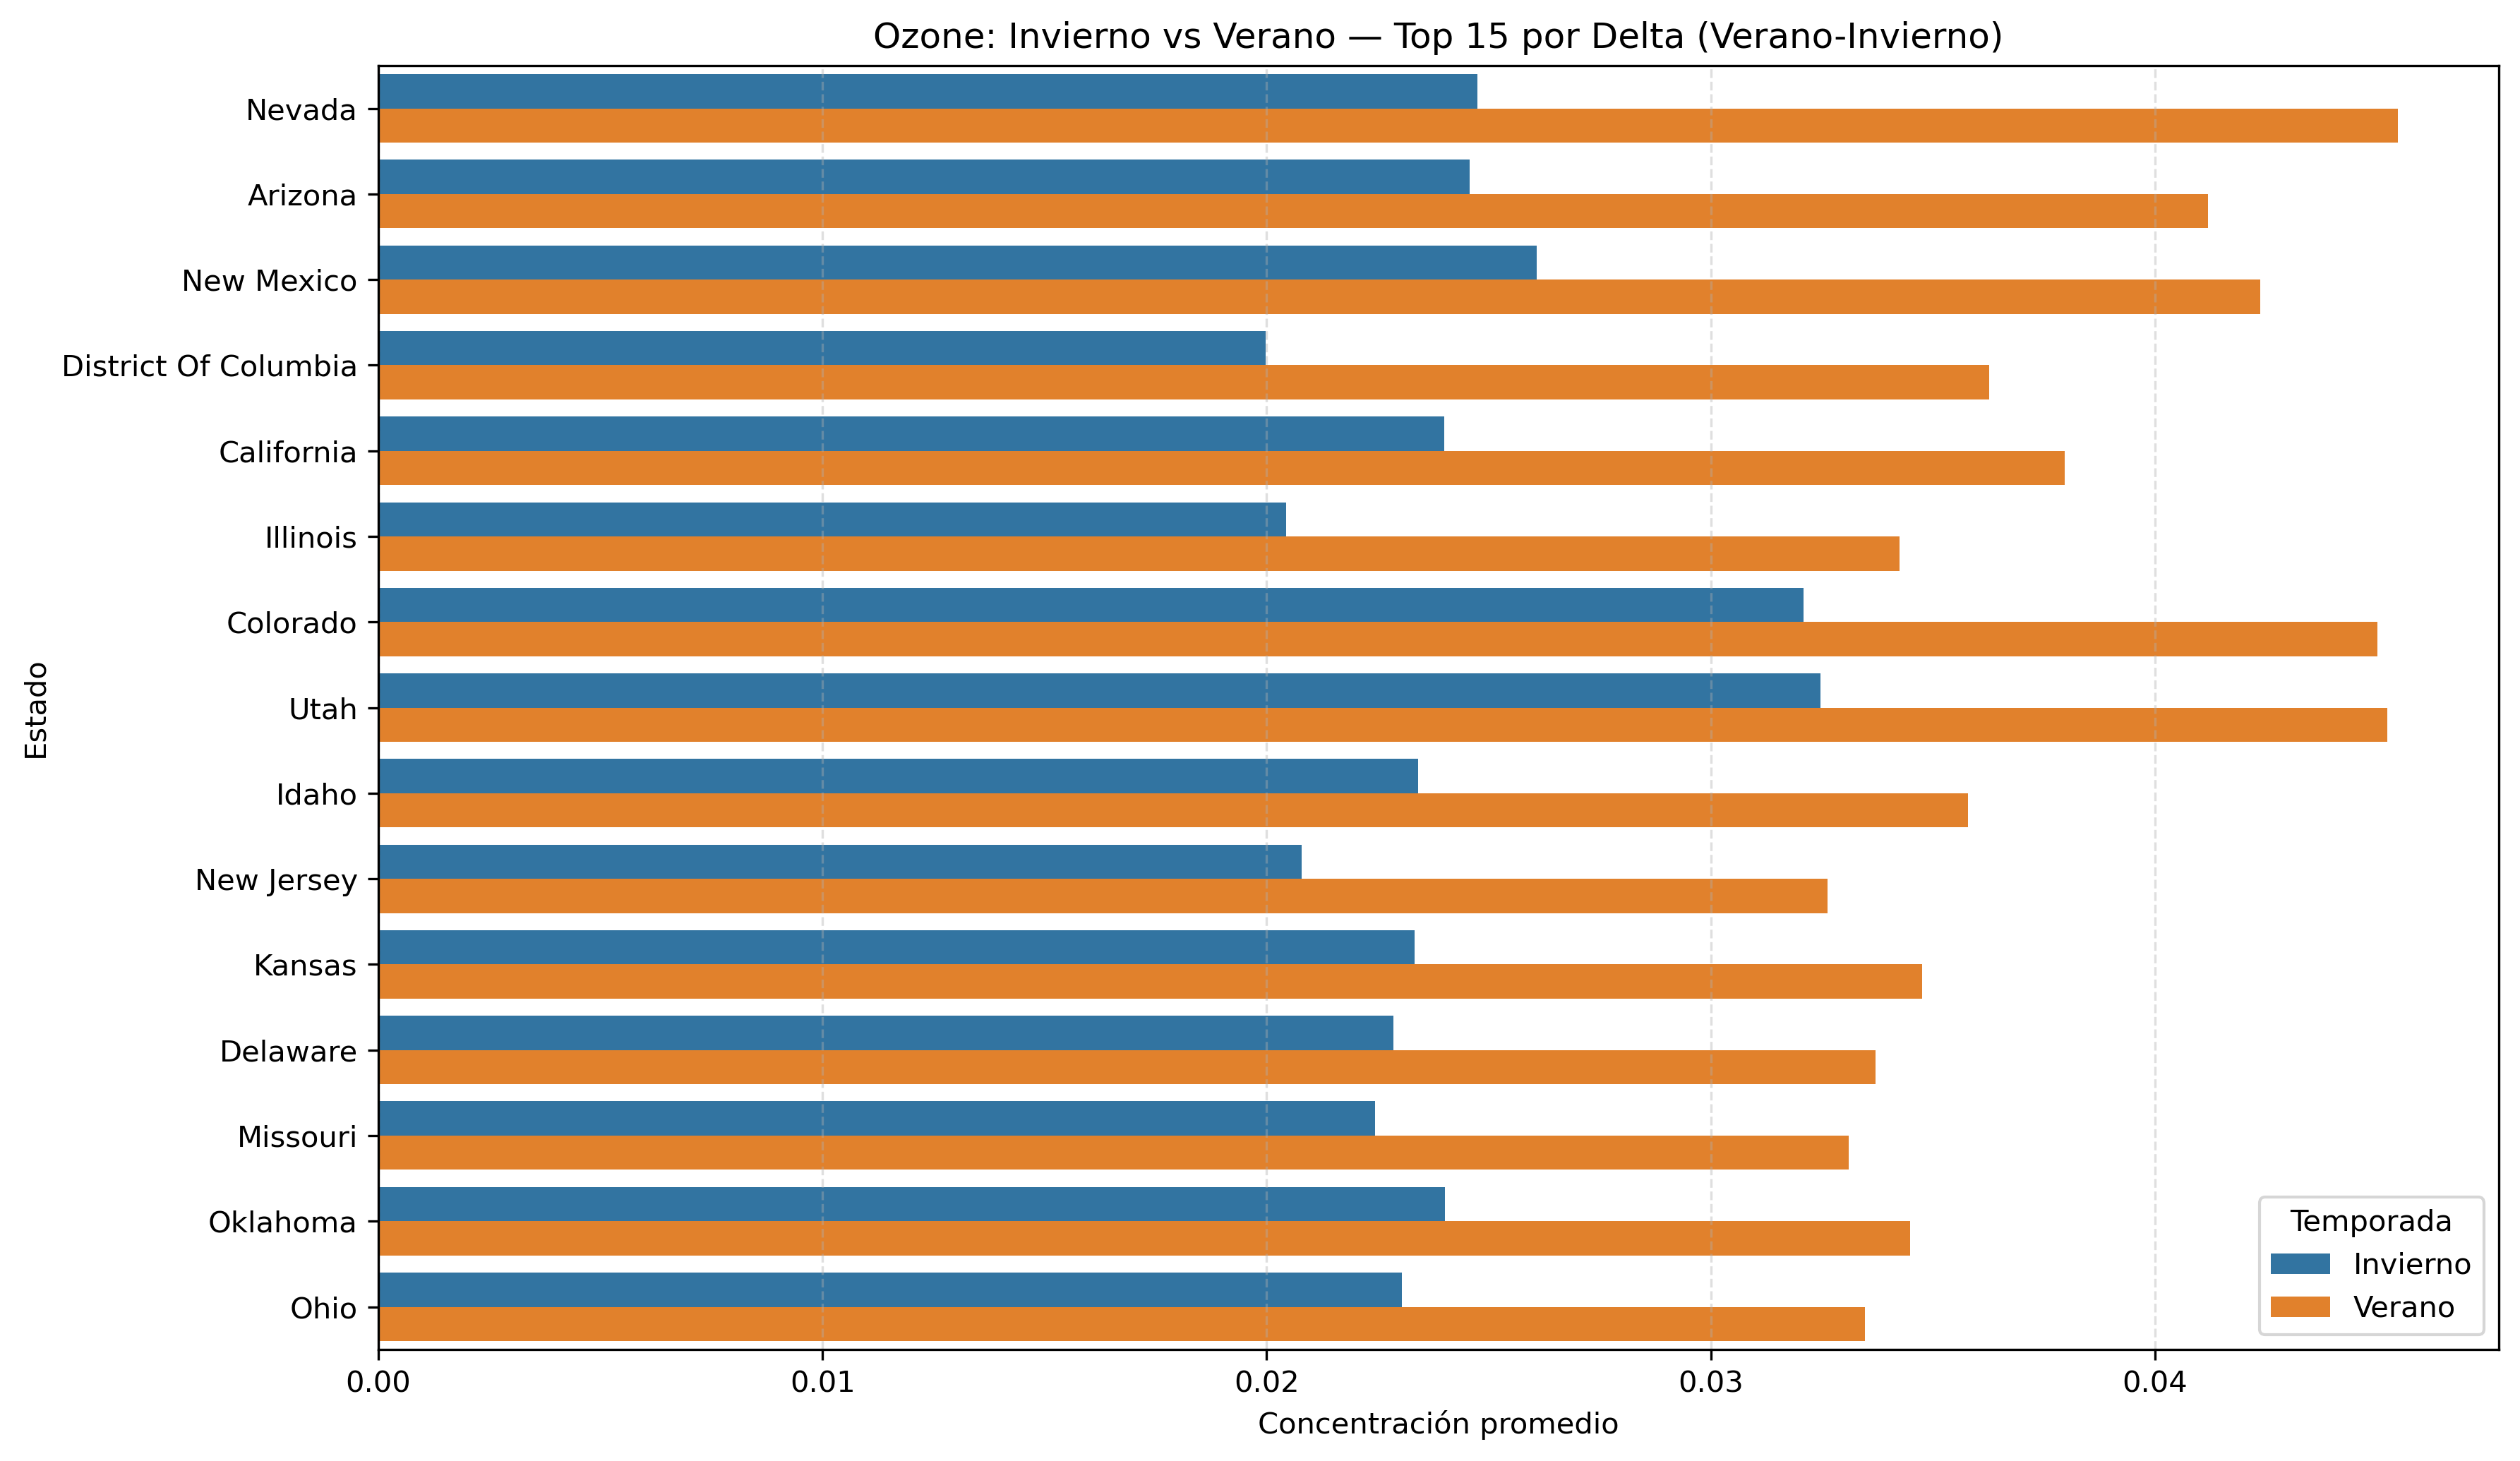

🖼 Guardado PNG: exportados\barras_temporadas_Ozone.png
📁 Guardado CSV subset: exportados\barras_temporadas_Ozone_subset.csv


In [40]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Parámetros ---
contaminante = "Ozone"                 # "Carbon monoxide", "Nitrogen dioxide (NO2)", "Ozone", "Sulfur dioxide"
top_n = 15                             # cuántos estados mostrar
orden = "delta"                        # "delta" (Verano-Invierno) o "Verano" o "Invierno"

# --- Cargar pivot (creado antes) ---
pivot_path = os.path.join("exportados", "comparativa_invierno_verano_pivot.csv")
dfp = pd.read_csv(pivot_path)

# Filtrar contaminante y calcular delta
dff = dfp[dfp["parameter_name"] == contaminante].copy()
dff["Delta (Verano-Invierno)"] = dff["Verano"] - dff["Invierno"]

# Ordenar
col_orden = {"delta":"Delta (Verano-Invierno)", "Verano":"Verano", "Invierno":"Invierno"}[orden]
dff = dff.sort_values(col_orden, ascending=False).head(top_n)

# A “largo” para usar seaborn
plot_df = dff.melt(id_vars=["state_name", "parameter_name"],
                   value_vars=["Invierno", "Verano"],
                   var_name="Temporada", value_name="Promedio")

# --- Plot ---
plt.figure(figsize=(12, 7), dpi=300)
sns.barplot(data=plot_df, y="state_name", x="Promedio", hue="Temporada")
plt.title(f"{contaminante}: Invierno vs Verano — Top {top_n} por {col_orden}")
plt.xlabel("Concentración promedio")
plt.ylabel("Estado")
plt.legend(title="Temporada", loc="best")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()

# Guardar
os.makedirs("exportados", exist_ok=True)
png_out = os.path.join("exportados", f"barras_temporadas_{contaminante.replace(' ','_')}.png")
plt.savefig(png_out, dpi=300)
plt.show()

# Guardar CSV del subset mostrado
csv_out = os.path.join("exportados", f"barras_temporadas_{contaminante.replace(' ','_')}_subset.csv")
dff.to_csv(csv_out, index=False)
print(f"🖼 Guardado PNG: {png_out}")
print(f"📁 Guardado CSV subset: {csv_out}")


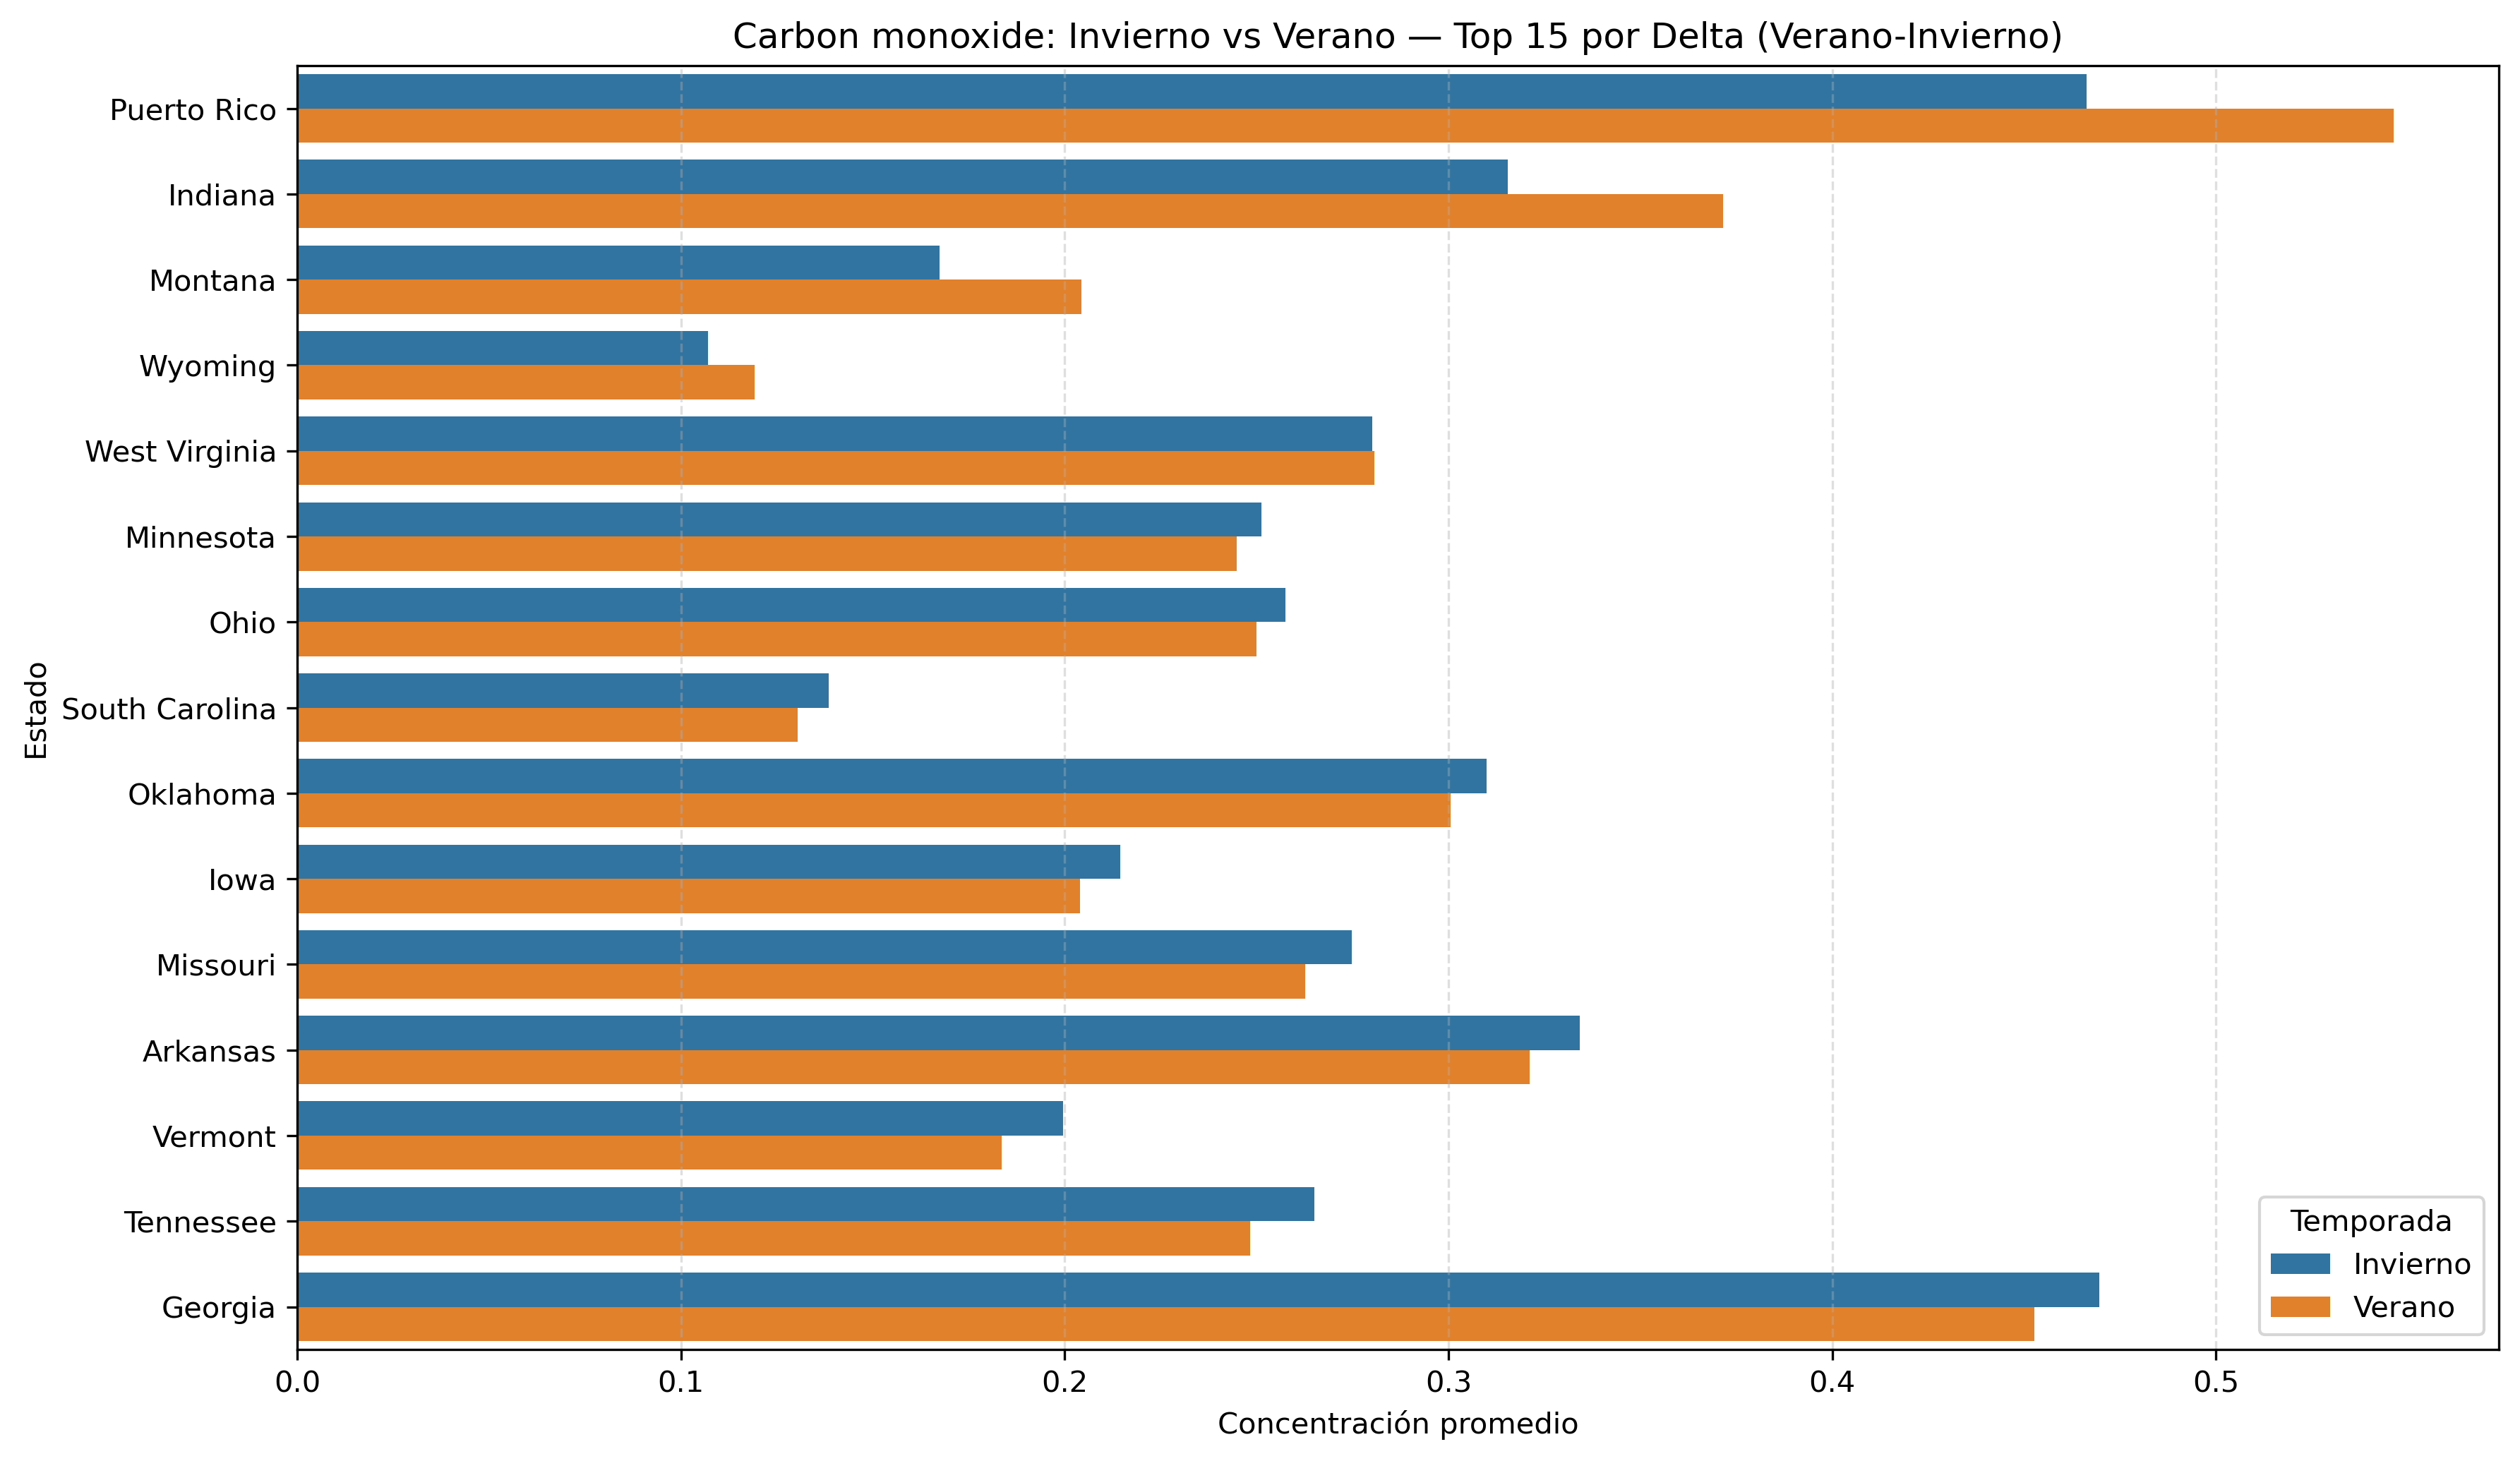

🖼 Guardado PNG: exportados\barras_temporadas_Carbon_monoxide.png
📁 Guardado CSV subset: exportados\barras_temporadas_Carbon_monoxide_subset.csv


In [41]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Parámetros ---
contaminante = "Carbon monoxide"                 # "Carbon monoxide", "Nitrogen dioxide (NO2)", "Ozone", "Sulfur dioxide"
top_n = 15                             # cuántos estados mostrar
orden = "delta"                        # "delta" (Verano-Invierno) o "Verano" o "Invierno"

# --- Cargar pivot (creado antes) ---
pivot_path = os.path.join("exportados", "comparativa_invierno_verano_pivot.csv")
dfp = pd.read_csv(pivot_path)

# Filtrar contaminante y calcular delta
dff = dfp[dfp["parameter_name"] == contaminante].copy()
dff["Delta (Verano-Invierno)"] = dff["Verano"] - dff["Invierno"]

# Ordenar
col_orden = {"delta":"Delta (Verano-Invierno)", "Verano":"Verano", "Invierno":"Invierno"}[orden]
dff = dff.sort_values(col_orden, ascending=False).head(top_n)

# A “largo” para usar seaborn
plot_df = dff.melt(id_vars=["state_name", "parameter_name"],
                   value_vars=["Invierno", "Verano"],
                   var_name="Temporada", value_name="Promedio")

# --- Plot ---
plt.figure(figsize=(12, 7), dpi=300)
sns.barplot(data=plot_df, y="state_name", x="Promedio", hue="Temporada")
plt.title(f"{contaminante}: Invierno vs Verano — Top {top_n} por {col_orden}")
plt.xlabel("Concentración promedio")
plt.ylabel("Estado")
plt.legend(title="Temporada", loc="best")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()

# Guardar
os.makedirs("exportados", exist_ok=True)
png_out = os.path.join("exportados", f"barras_temporadas_{contaminante.replace(' ','_')}.png")
plt.savefig(png_out, dpi=300)
plt.show()

# Guardar CSV del subset mostrado
csv_out = os.path.join("exportados", f"barras_temporadas_{contaminante.replace(' ','_')}_subset.csv")
dff.to_csv(csv_out, index=False)
print(f"🖼 Guardado PNG: {png_out}")
print(f"📁 Guardado CSV subset: {csv_out}")


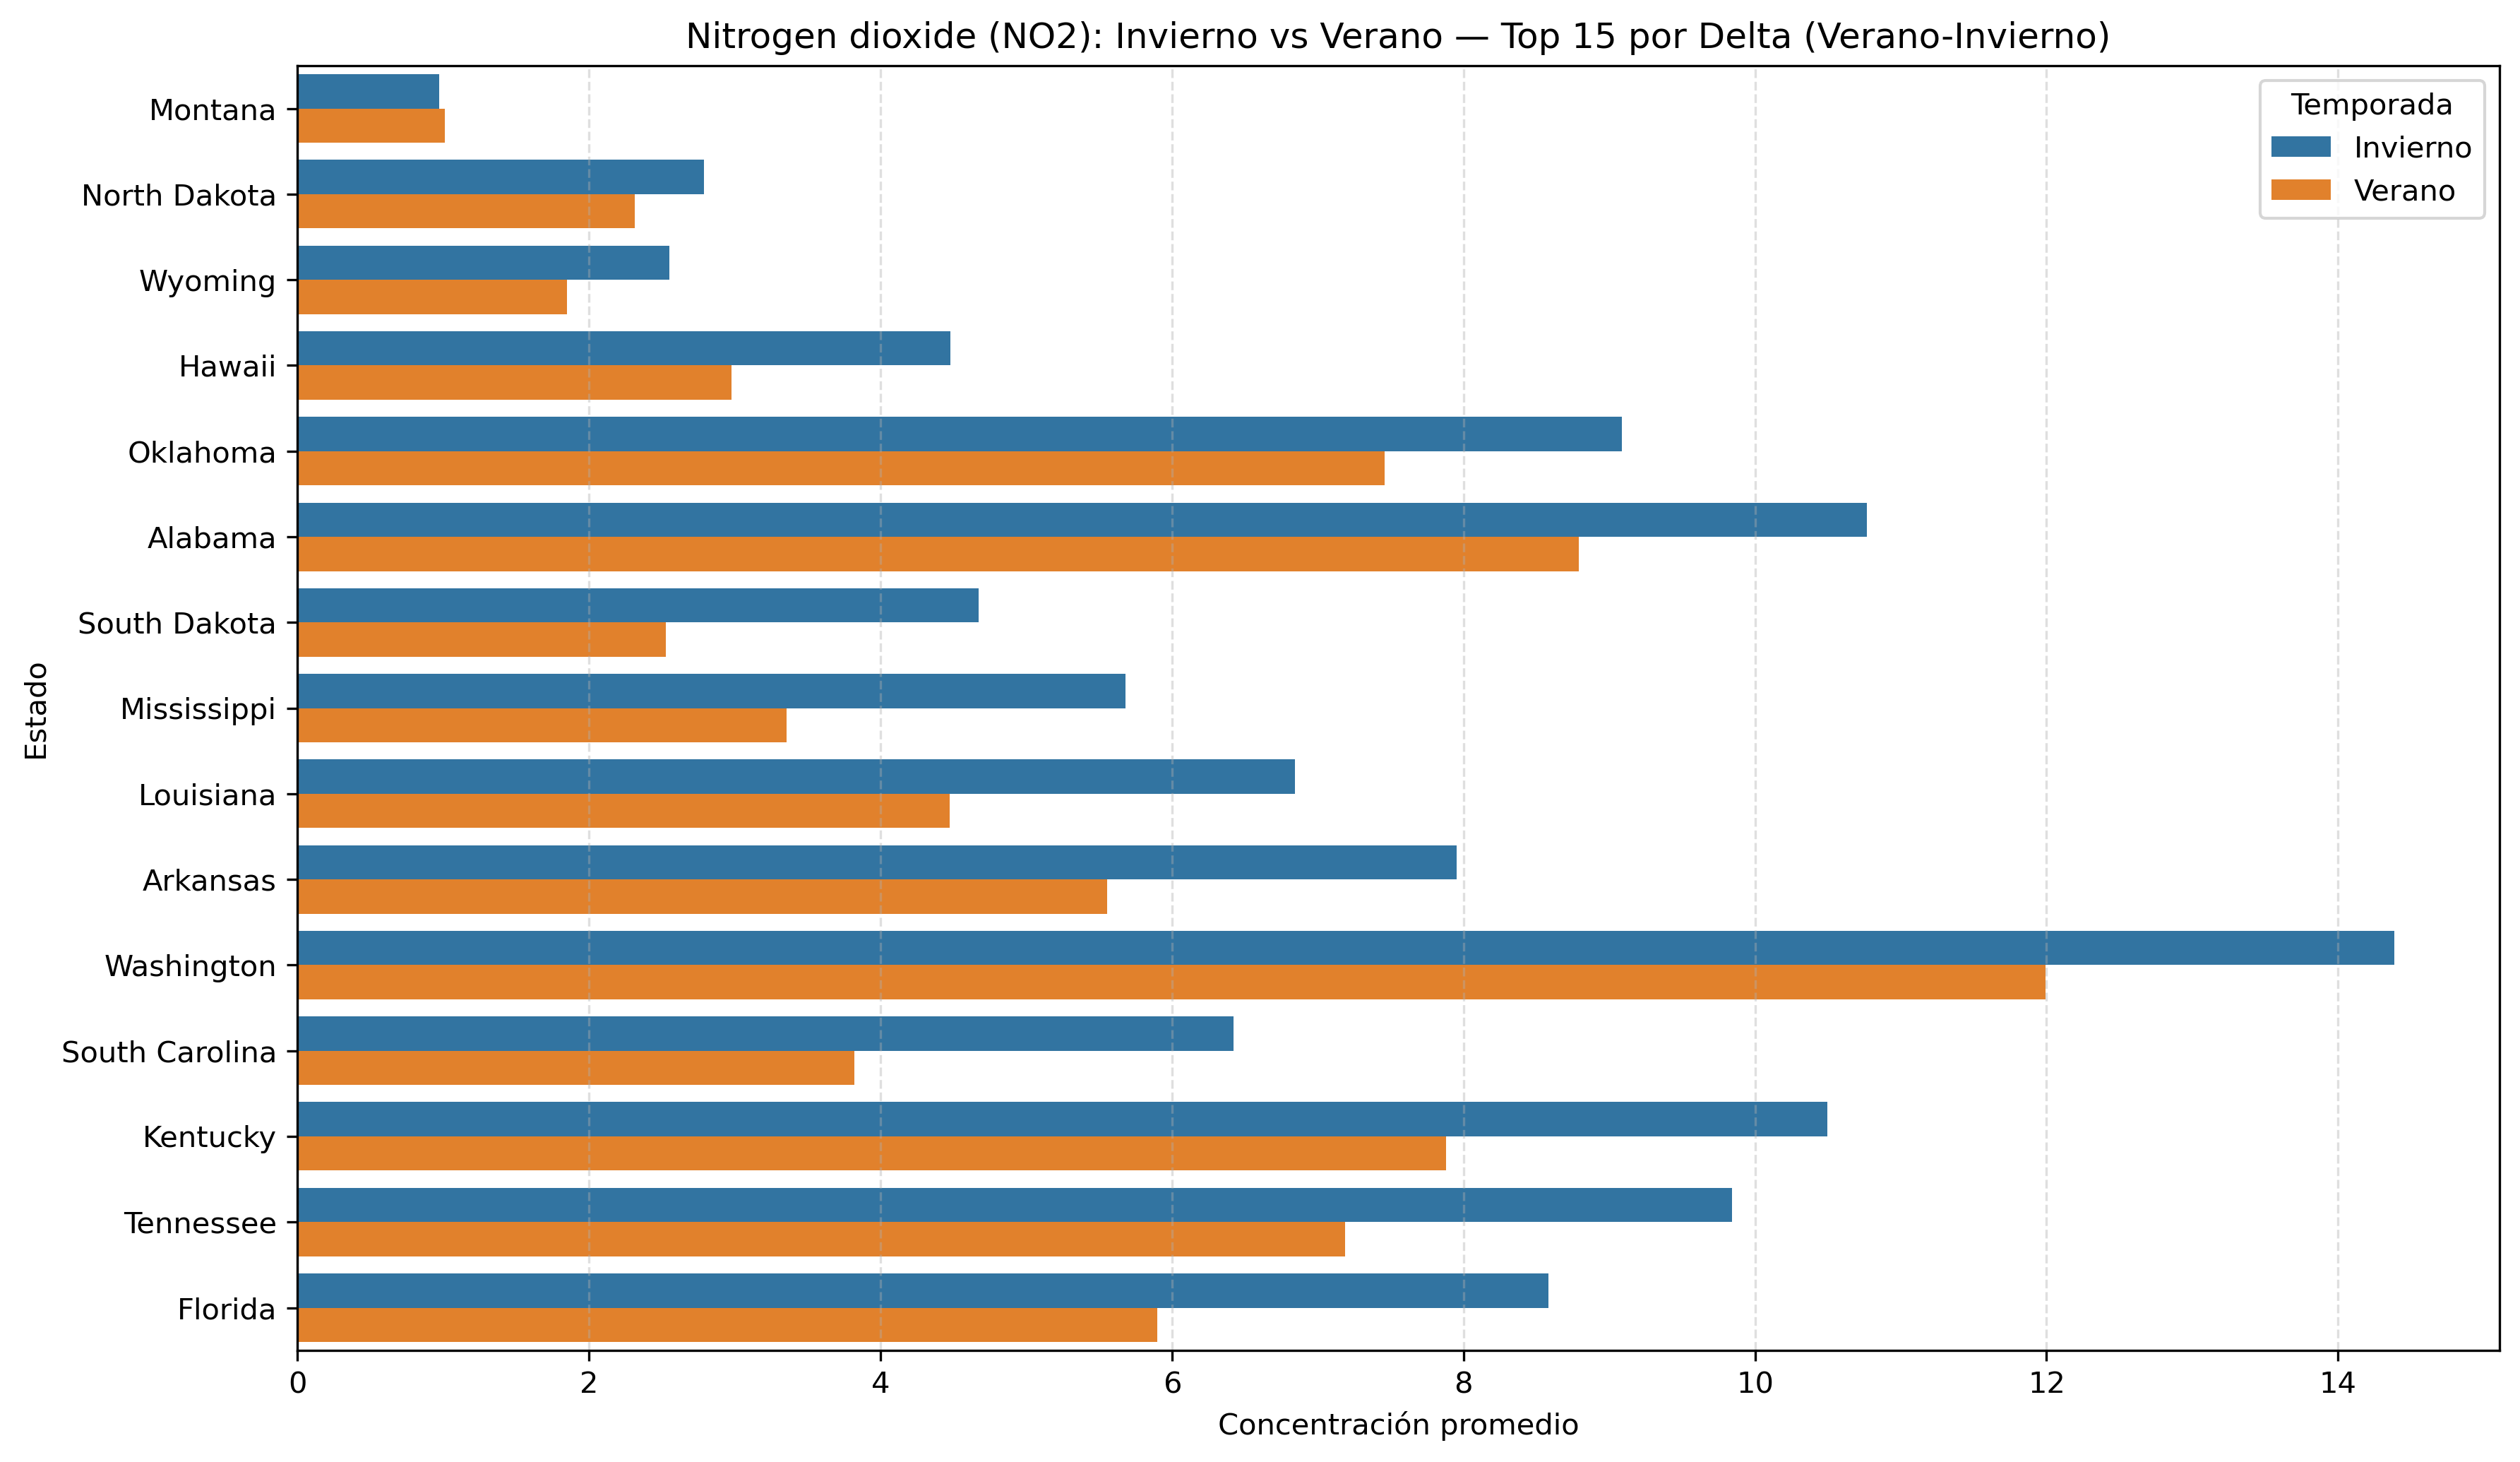

🖼 Guardado PNG: exportados\barras_temporadas_Nitrogen_dioxide_(NO2).png
📁 Guardado CSV subset: exportados\barras_temporadas_Nitrogen_dioxide_(NO2)_subset.csv


In [42]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Parámetros ---
contaminante = "Nitrogen dioxide (NO2)"                 # "Carbon monoxide", "Nitrogen dioxide (NO2)", "Ozone", "Sulfur dioxide"
top_n = 15                             # cuántos estados mostrar
orden = "delta"                        # "delta" (Verano-Invierno) o "Verano" o "Invierno"

# --- Cargar pivot (creado antes) ---
pivot_path = os.path.join("exportados", "comparativa_invierno_verano_pivot.csv")
dfp = pd.read_csv(pivot_path)

# Filtrar contaminante y calcular delta
dff = dfp[dfp["parameter_name"] == contaminante].copy()
dff["Delta (Verano-Invierno)"] = dff["Verano"] - dff["Invierno"]

# Ordenar
col_orden = {"delta":"Delta (Verano-Invierno)", "Verano":"Verano", "Invierno":"Invierno"}[orden]
dff = dff.sort_values(col_orden, ascending=False).head(top_n)

# A “largo” para usar seaborn
plot_df = dff.melt(id_vars=["state_name", "parameter_name"],
                   value_vars=["Invierno", "Verano"],
                   var_name="Temporada", value_name="Promedio")

# --- Plot ---
plt.figure(figsize=(12, 7), dpi=300)
sns.barplot(data=plot_df, y="state_name", x="Promedio", hue="Temporada")
plt.title(f"{contaminante}: Invierno vs Verano — Top {top_n} por {col_orden}")
plt.xlabel("Concentración promedio")
plt.ylabel("Estado")
plt.legend(title="Temporada", loc="best")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()

# Guardar
os.makedirs("exportados", exist_ok=True)
png_out = os.path.join("exportados", f"barras_temporadas_{contaminante.replace(' ','_')}.png")
plt.savefig(png_out, dpi=300)
plt.show()

# Guardar CSV del subset mostrado
csv_out = os.path.join("exportados", f"barras_temporadas_{contaminante.replace(' ','_')}_subset.csv")
dff.to_csv(csv_out, index=False)
print(f"🖼 Guardado PNG: {png_out}")
print(f"📁 Guardado CSV subset: {csv_out}")

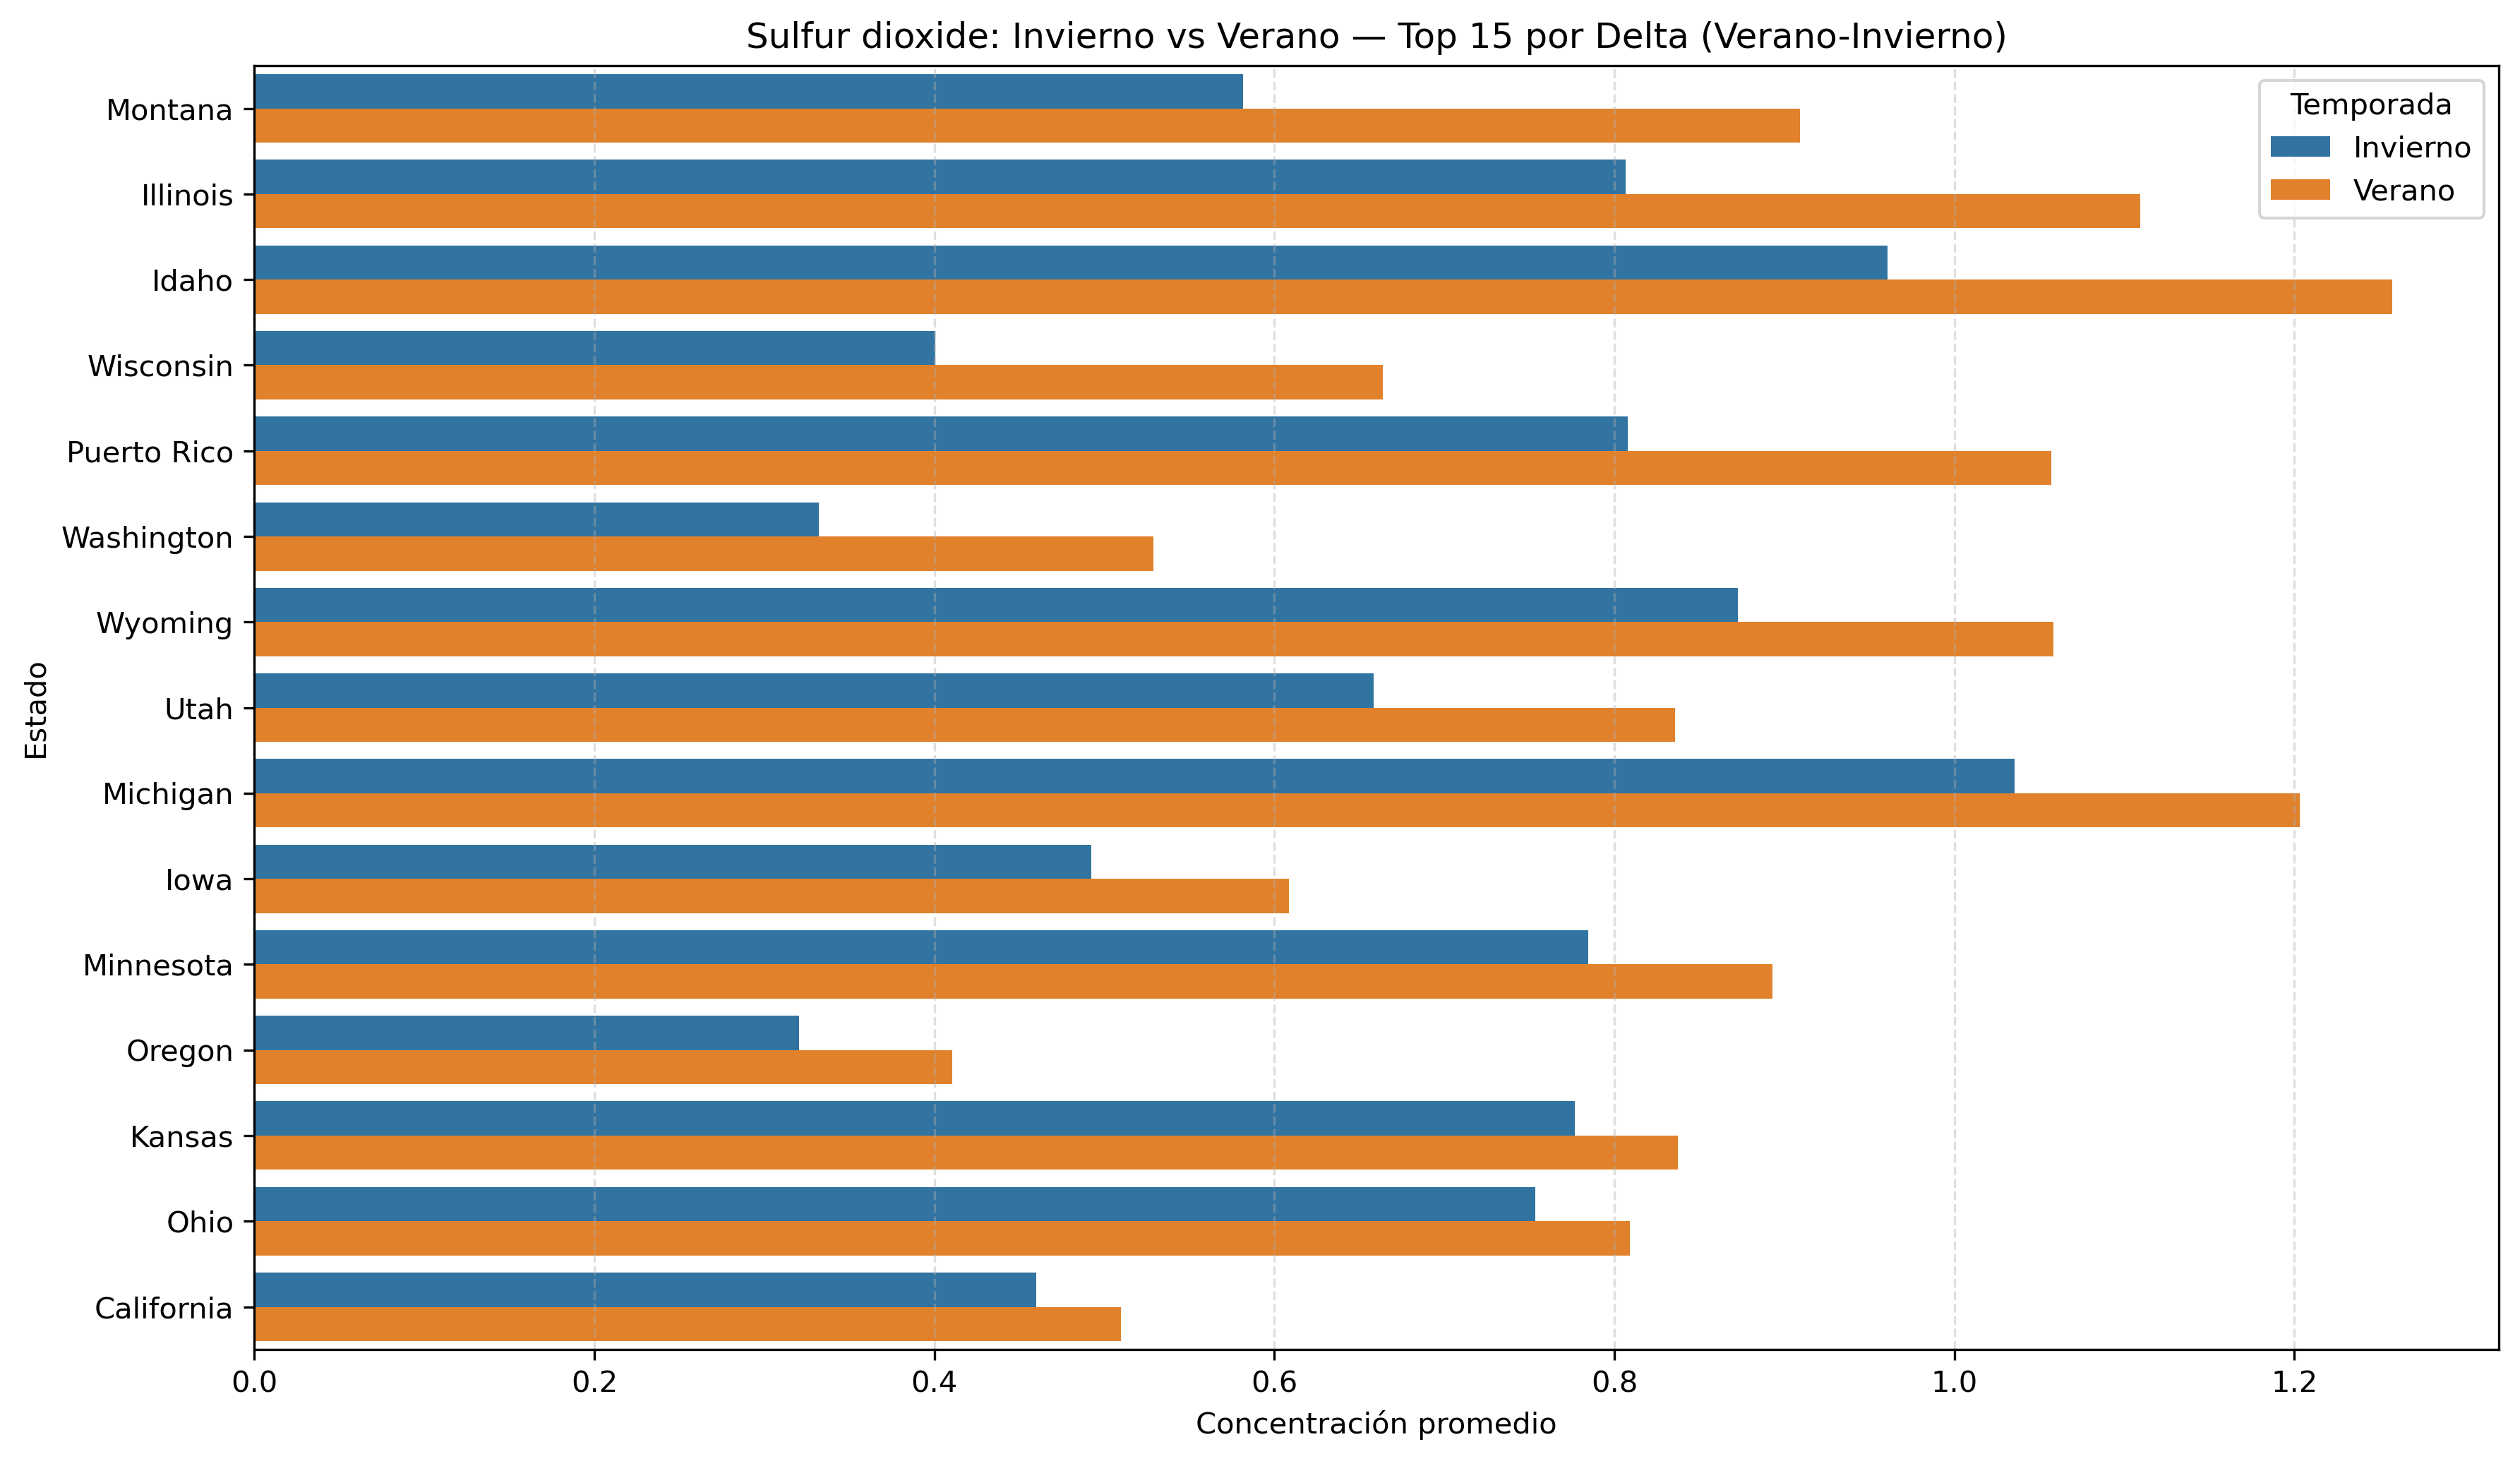

🖼 Guardado PNG: exportados\barras_temporadas_Sulfur_dioxide.png
📁 Guardado CSV subset: exportados\barras_temporadas_Sulfur_dioxide_subset.csv


In [43]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Parámetros ---
contaminante = "Sulfur dioxide"                 # "Carbon monoxide", "Nitrogen dioxide (NO2)", "Ozone", "Sulfur dioxide"
top_n = 15                             # cuántos estados mostrar
orden = "delta"                        # "delta" (Verano-Invierno) o "Verano" o "Invierno"

# --- Cargar pivot (creado antes) ---
pivot_path = os.path.join("exportados", "comparativa_invierno_verano_pivot.csv")
dfp = pd.read_csv(pivot_path)

# Filtrar contaminante y calcular delta
dff = dfp[dfp["parameter_name"] == contaminante].copy()
dff["Delta (Verano-Invierno)"] = dff["Verano"] - dff["Invierno"]

# Ordenar
col_orden = {"delta":"Delta (Verano-Invierno)", "Verano":"Verano", "Invierno":"Invierno"}[orden]
dff = dff.sort_values(col_orden, ascending=False).head(top_n)

# A “largo” para usar seaborn
plot_df = dff.melt(id_vars=["state_name", "parameter_name"],
                   value_vars=["Invierno", "Verano"],
                   var_name="Temporada", value_name="Promedio")

# --- Plot ---
plt.figure(figsize=(12, 7), dpi=300)
sns.barplot(data=plot_df, y="state_name", x="Promedio", hue="Temporada")
plt.title(f"{contaminante}: Invierno vs Verano — Top {top_n} por {col_orden}")
plt.xlabel("Concentración promedio")
plt.ylabel("Estado")
plt.legend(title="Temporada", loc="best")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()

# Guardar
os.makedirs("exportados", exist_ok=True)
png_out = os.path.join("exportados", f"barras_temporadas_{contaminante.replace(' ','_')}.png")
plt.savefig(png_out, dpi=300)
plt.show()

# Guardar CSV del subset mostrado
csv_out = os.path.join("exportados", f"barras_temporadas_{contaminante.replace(' ','_')}_subset.csv")
dff.to_csv(csv_out, index=False)
print(f"🖼 Guardado PNG: {png_out}")
print(f"📁 Guardado CSV subset: {csv_out}")

In [44]:
## **✅ Script: Top 10 Estados por Contaminante**

In [45]:
import os
import pandas as pd
import plotly.graph_objects as go

# --- Cargar datos largos ---
long_path = os.path.join("exportados", "comparativa_invierno_verano.csv")
df = pd.read_csv(long_path)

# --- Mapear nombre de estado -> código postal (necesario para Plotly) ---
us_state_abbrev = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO',
    'Connecticut':'CT','Delaware':'DE','District Of Columbia':'DC','Florida':'FL','Georgia':'GA',
    'Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY',
    'Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN',
    'Mississippi':'MS','Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH',
    'New Jersey':'NJ','New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND',
    'Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI',
    'South Carolina':'SC','South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT',
    'Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY','Puerto Rico':'PR'
}
df = df[df["state_name"].isin(us_state_abbrev.keys())].copy()
df["state_code"] = df["state_name"].map(us_state_abbrev)

# --- Opciones de dropdown (contaminante-temporada) ---
pollutants = df["parameter_name"].unique().tolist()
seasons = ["Invierno","Verano"]
options = [(p,t) for p in pollutants for t in seasons]

# Paletas por temporada (puedes ajustar)
season_cscale = {"Invierno":"Blues","Verano":"OrRd"}

# Construir trazas (una por combinación) y toggles
traces = []
buttons = []

for i, (poll, temp) in enumerate(options):
    dff = df[(df["parameter_name"] == poll) & (df["temporada"] == temp)]
    zvals = dff["promedio_temporada"]
    cscale = season_cscale.get(temp, "Viridis")

    traces.append(go.Choropleth(
        locations=dff["state_code"],
        z=zvals,
        locationmode="USA-states",
        colorscale=cscale,
        colorbar_title="Promedio",
        text=dff["state_name"],
        zmin=zvals.min(), zmax=zvals.max(),
        visible=(i==0)  # Solo la primera visible al inicio
    ))

    # botón para mostrar sólo esta traza
    vis = [False]*len(options)
    vis[i] = True
    buttons.append(dict(label=f"{poll} – {temp}",
                        method="update",
                        args=[{"visible": vis},
                              {"title": f"{poll} – {temp}"}]))

fig = go.Figure(data=traces)
fig.update_layout(
    title=f"{options[0][0]} – {options[0][1]}",
    geo=dict(scope="usa"),
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        x=0.01, y=0.98,
        showactive=True
    )],
    margin=dict(l=10,r=10,t=60,b=10)
)

fig.show()

# Guardar PNG (requiere 'kaleido' instalado)
try:
    os.makedirs("exportados", exist_ok=True)
    out_map = os.path.join("exportados","mapa_estacional_dropdown.png")
    fig.write_image(out_map, width=1200, height=700, scale=2)
    print(f"🖼 PNG guardado: {out_map}")
except Exception as e:
    print("ℹ️ No se pudo guardar PNG del mapa (instala 'kaleido' si lo necesitas).", e)


🖼 PNG guardado: exportados\mapa_estacional_dropdown.png


In [46]:
 import pandas as pd
import plotly.express as px
import plotly.io as pio
import os
from db_connection import get_engine

# Configurar renderizado interactivo (si estás en Jupyter Notebook)
pio.renderers.default = "iframe_connected"

# --- 1. Conexión a la base de datos ---
print("Estableciendo conexión a la base de datos...")
try:
    engine = get_engine()
    print("✅ Conexión exitosa.")
except Exception as e:
    print(f"❌ Error al conectar: {e}")
    exit()

# --- 2. Consulta SQL: Promedio anual de contaminantes por estado en 2024 ---
print("\nEjecutando consulta SQL...")

query = """
SELECT
    l.state_name,
    p.parameter_name,
    AVG(m.value) AS promedio_estado_2024
FROM measurement m
JOIN station s   ON m.station_id   = s.station_id
JOIN location l  ON s.location_id   = l.location_id
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE YEAR(m.date_local) = 2024
  AND p.parameter_code IN ('42101','42401','42602','44201')
GROUP BY l.state_name, p.parameter_name;
"""

try:
    df = pd.read_sql(query, con=engine)
    print("✅ Consulta ejecutada. Vista previa:")
    print(df.head())
except Exception as e:
    print(f"❌ Error en la consulta SQL: {e}")
    exit()

# --- 3. Mapear nombres completos a códigos USPS ---
usps = {
 'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA',
 'Colorado':'CO','Connecticut':'CT','Delaware':'DE','Florida':'FL','Georgia':'GA',
 'Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA',
 'Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD',
 'Massachusetts':'MA','Michigan':'MI','Minnesota':'MN','Mississippi':'MS','Missouri':'MO',
 'Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ',
 'New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND','Ohio':'OH',
 'Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI','South Carolina':'SC',
 'South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT',
 'Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}
df['state_code'] = df['state_name'].map(usps)

# --- 4. Mapa interactivo con Plotly Express ---
print("\nGenerando mapa interactivo...")

fig = px.choropleth(
    df,
    locations='state_code',            # Usamos las abreviaturas USPS
    locationmode='USA-states',
    color='promedio_estado_2024',
    hover_name='state_name',
    hover_data=['parameter_name', 'promedio_estado_2024'],
    animation_frame='parameter_name',  # Slider por contaminante
    color_continuous_scale='YlOrRd',
    scope='usa',
    title='Concentración Promedio por Estado en 2024 (Interactivo)'
)

fig.update_layout(
    margin=dict(l=0, r=0, t=40, b=0),
    geo=dict(showlakes=True, lakecolor='LightBlue')
)

# --- 5. Guardar imagen (último frame mostrado) ---
os.makedirs("exportados", exist_ok=True)
fig.write_image("exportados/mapa_concentracion_estados_2024.png", width=1000, height=600, scale=1)
print("🖼️ Imagen guardada como 'exportados/mapa_concentracion_estados_2024.png'")

# --- 6. Mostrar el mapa interactivo ---
fig.show()


Estableciendo conexión a la base de datos...
✅ Conexión exitosa.

Ejecutando consulta SQL...
✅ Consulta ejecutada. Vista previa:
  state_name   parameter_name  promedio_estado_2024
0    Alabama            Ozone              0.029716
1    Alabama   Sulfur dioxide              0.243575
2     Alaska  Carbon monoxide              0.331027
3     Alaska            Ozone              0.028400
4     Alaska   Sulfur dioxide              2.272766

Generando mapa interactivo...
🖼️ Imagen guardada como 'exportados/mapa_concentracion_estados_2024.png'


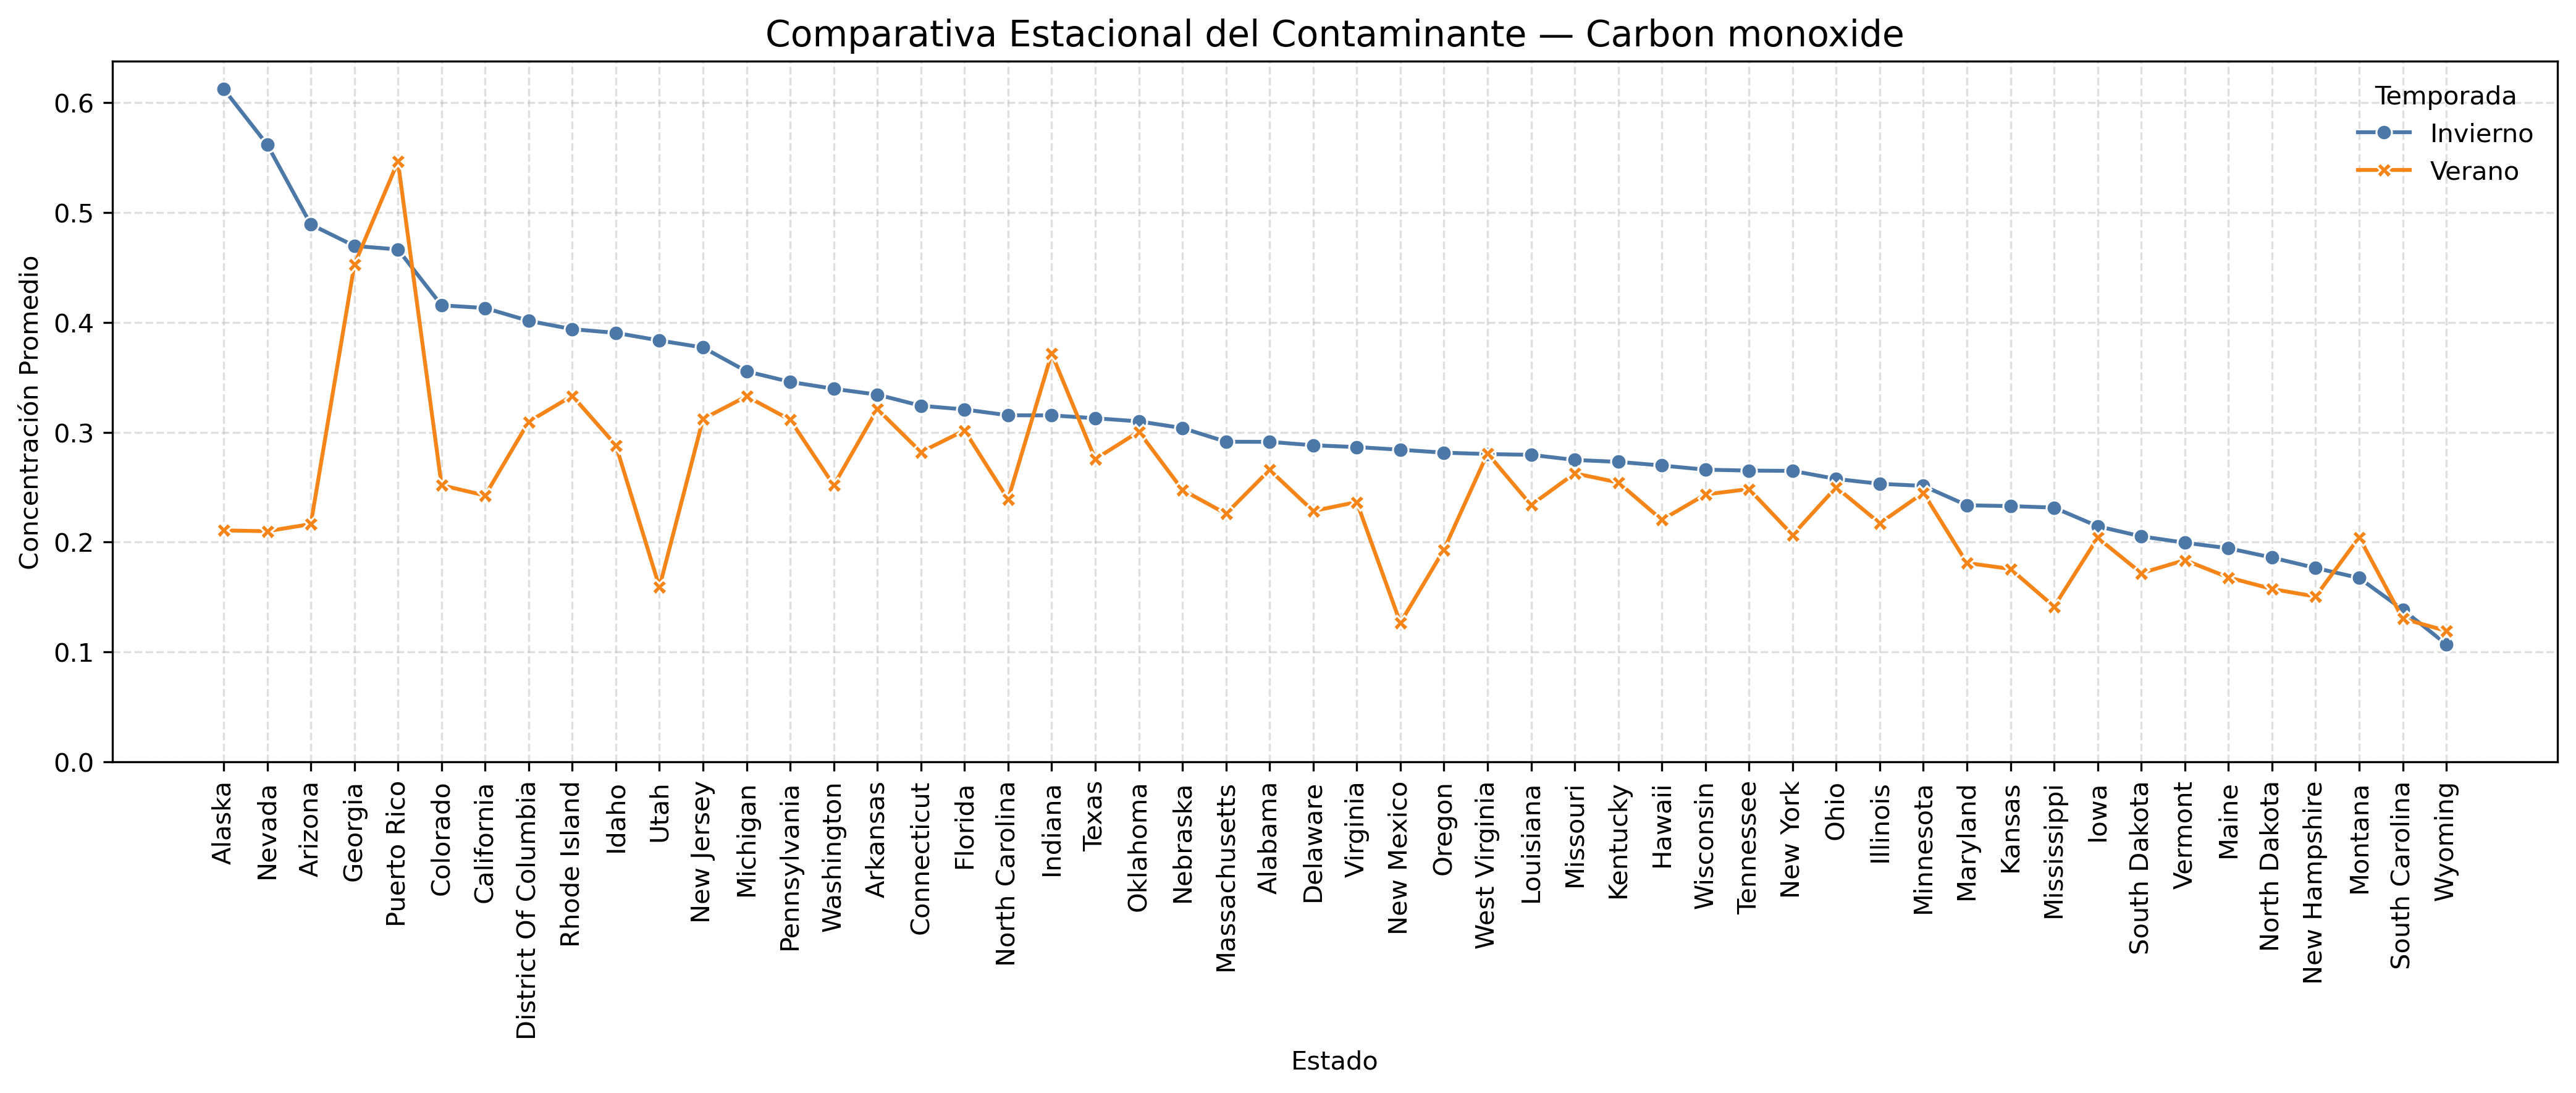

🖼 PNG guardado en: exportados/estacional_carbon_monoxide.png


In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Cargar SIEMPRE el largo, no el pivot ---
df = pd.read_csv("exportados/comparativa_invierno_verano.csv")

# Normalizar nombres de columnas a minúsculas sin espacios
df.columns = [c.strip().lower() for c in df.columns]

# Si por error cargaste el pivot, lo detectamos y lo "deshacemos"
cols = set(df.columns)
if {"invierno", "verano"}.issubset(cols) and "temporada" not in cols:
    id_cols = [c for c in df.columns if c not in {"invierno", "verano"}]
    df = df.melt(id_vars=id_cols,
                 value_vars=["invierno", "verano"],
                 var_name="temporada",
                 value_name="promedio_temporada")

# Alineamos nombres esperados
rename_map = {
    "state_name": "state_name",
    "parameter_name": "parameter_name",
}
# por si el promedio vino con otro nombre
if "promedio_temporada" not in df.columns:
    for alt in ["promedio", "avg", "mean", "valor"]:
        if alt in df.columns:
            df = df.rename(columns={alt: "promedio_temporada"})
            break

# Validaciones
for needed in ["state_name", "parameter_name", "temporada", "promedio_temporada"]:
    if needed not in df.columns:
        raise ValueError(f"Falta la columna '{needed}'. Columnas actuales: {df.columns.tolist()}")

# Normalizamos valores de temporada (Invierno/Verano)
df["temporada"] = df["temporada"].astype(str).str.strip().str.capitalize()

# --- 2) Parámetros del gráfico ---
contaminante = "Carbon monoxide"   # cambia aquí
temporada_orden = "Invierno"       # usamos esta temporada para ordenar estados

# --- 3) Filtrar contaminante y ordenar estados por la temporada elegida ---
df_cont = df[df["parameter_name"] == contaminante].copy()
if df_cont.empty:
    raise ValueError(f"No hay datos para '{contaminante}' en el DataFrame.")

base = (df_cont[df_cont["temporada"] == temporada_orden]
        .sort_values("promedio_temporada", ascending=False))
orden_estados = base["state_name"].tolist()

df_cont["state_name"] = pd.Categorical(df_cont["state_name"],
                                       categories=orden_estados,
                                       ordered=True)
df_cont = df_cont.sort_values(["state_name", "temporada"])

# --- 4) Gráfico de líneas por estado (Invierno vs Verano) ---
plt.figure(figsize=(14, 6), dpi=300)
ax = sns.lineplot(
    data=df_cont,
    x="state_name", y="promedio_temporada",
    hue="temporada", style="temporada",
    markers=True, dashes=False, estimator=None, sort=False,
    palette={"Invierno": "#4C78A8", "Verano": "#F58518"},
    hue_order=["Invierno", "Verano"],
)

ax.set_title(f"Comparativa Estacional del Contaminante — {contaminante}", fontsize=14)
ax.set_xlabel("Estado")
ax.set_ylabel("Concentración Promedio")
plt.xticks(rotation=90)
ax.grid(True, linestyle="--", alpha=0.4)
ax.set_ylim(bottom=0)
ax.legend(title="Temporada", frameon=False, loc="upper right")
plt.tight_layout()

# --- 5) Guardar ---
os.makedirs("exportados", exist_ok=True)
safe_name = contaminante.lower().replace(" ", "_").replace("(", "").replace(")", "")
out = f"exportados/estacional_{safe_name}.png"
plt.savefig(out, dpi=300)
plt.show()
print(f"🖼 PNG guardado en: {out}")


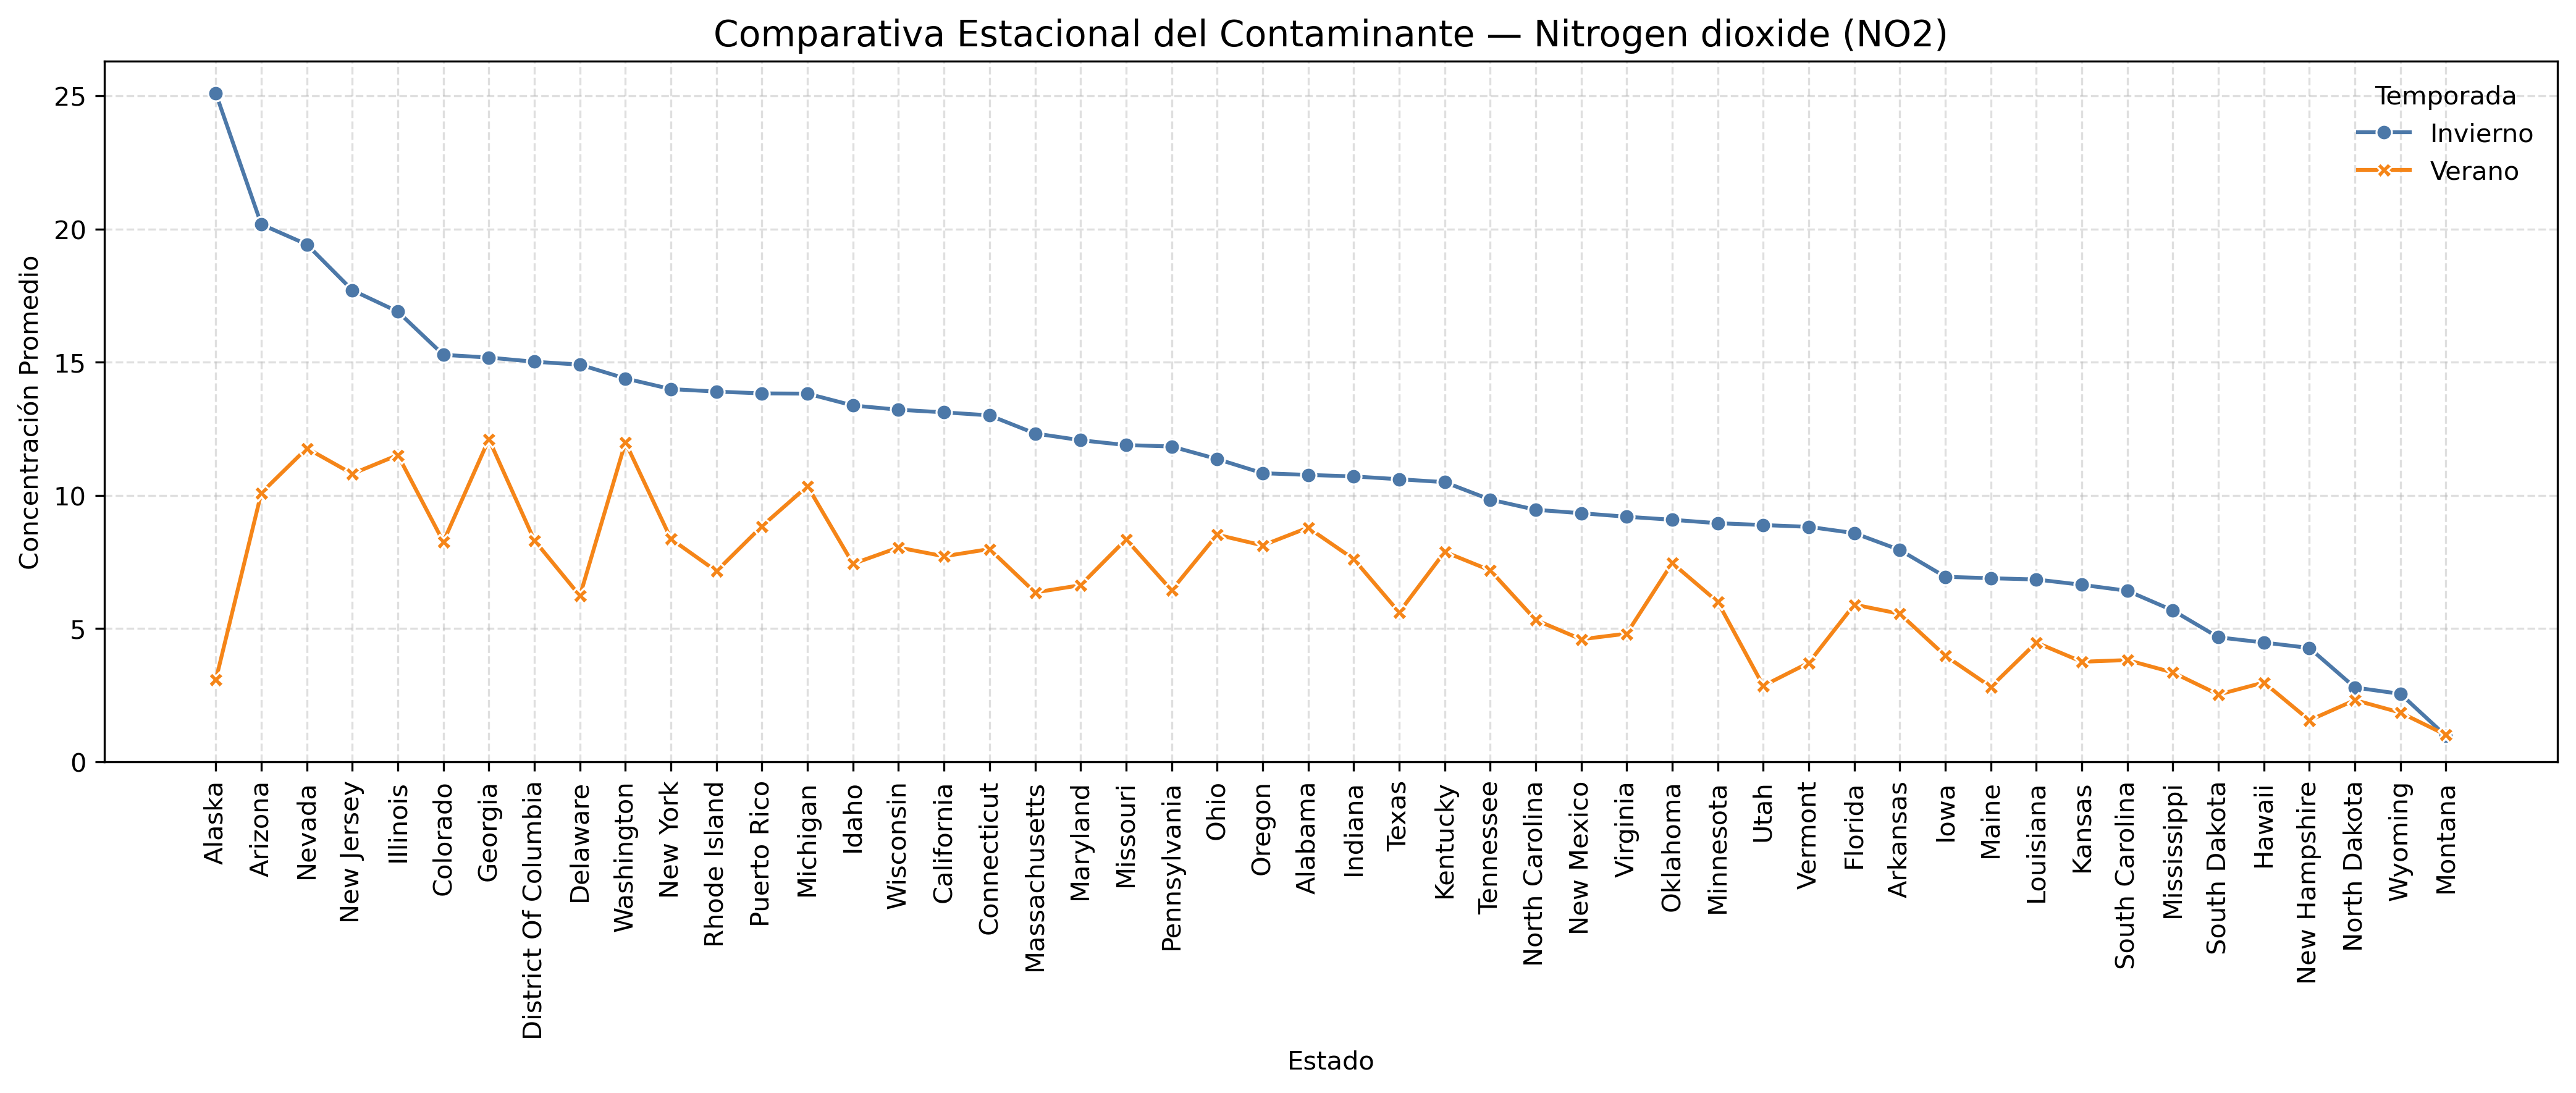

🖼 PNG guardado en: exportados/estacional_nitrogen_dioxide_no2.png


In [48]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Cargar SIEMPRE el largo, no el pivot ---
df = pd.read_csv("exportados/comparativa_invierno_verano.csv")

# Normalizar nombres de columnas a minúsculas sin espacios
df.columns = [c.strip().lower() for c in df.columns]

# Si por error cargaste el pivot, lo detectamos y lo "deshacemos"
cols = set(df.columns)
if {"invierno", "verano"}.issubset(cols) and "temporada" not in cols:
    id_cols = [c for c in df.columns if c not in {"invierno", "verano"}]
    df = df.melt(id_vars=id_cols,
                 value_vars=["invierno", "verano"],
                 var_name="temporada",
                 value_name="promedio_temporada")

# Alineamos nombres esperados
rename_map = {
    "state_name": "state_name",
    "parameter_name": "parameter_name",
}
# por si el promedio vino con otro nombre
if "promedio_temporada" not in df.columns:
    for alt in ["promedio", "avg", "mean", "valor"]:
        if alt in df.columns:
            df = df.rename(columns={alt: "promedio_temporada"})
            break

# Validaciones
for needed in ["state_name", "parameter_name", "temporada", "promedio_temporada"]:
    if needed not in df.columns:
        raise ValueError(f"Falta la columna '{needed}'. Columnas actuales: {df.columns.tolist()}")

# Normalizamos valores de temporada (Invierno/Verano)
df["temporada"] = df["temporada"].astype(str).str.strip().str.capitalize()

# --- 2) Parámetros del gráfico ---
contaminante = "Nitrogen dioxide (NO2)"   # cambia aquí
temporada_orden = "Invierno"       # usamos esta temporada para ordenar estados

# --- 3) Filtrar contaminante y ordenar estados por la temporada elegida ---
df_cont = df[df["parameter_name"] == contaminante].copy()
if df_cont.empty:
    raise ValueError(f"No hay datos para '{contaminante}' en el DataFrame.")

base = (df_cont[df_cont["temporada"] == temporada_orden]
        .sort_values("promedio_temporada", ascending=False))
orden_estados = base["state_name"].tolist()

df_cont["state_name"] = pd.Categorical(df_cont["state_name"],
                                       categories=orden_estados,
                                       ordered=True)
df_cont = df_cont.sort_values(["state_name", "temporada"])

# --- 4) Gráfico de líneas por estado (Invierno vs Verano) ---
plt.figure(figsize=(14, 6), dpi=300)
ax = sns.lineplot(
    data=df_cont,
    x="state_name", y="promedio_temporada",
    hue="temporada", style="temporada",
    markers=True, dashes=False, estimator=None, sort=False,
    palette={"Invierno": "#4C78A8", "Verano": "#F58518"},
    hue_order=["Invierno", "Verano"],
)

ax.set_title(f"Comparativa Estacional del Contaminante — {contaminante}", fontsize=14)
ax.set_xlabel("Estado")
ax.set_ylabel("Concentración Promedio")
plt.xticks(rotation=90)
ax.grid(True, linestyle="--", alpha=0.4)
ax.set_ylim(bottom=0)
ax.legend(title="Temporada", frameon=False, loc="upper right")
plt.tight_layout()

# --- 5) Guardar ---
os.makedirs("exportados", exist_ok=True)
safe_name = contaminante.lower().replace(" ", "_").replace("(", "").replace(")", "")
out = f"exportados/estacional_{safe_name}.png"
plt.savefig(out, dpi=300)
plt.show()
print(f"🖼 PNG guardado en: {out}")


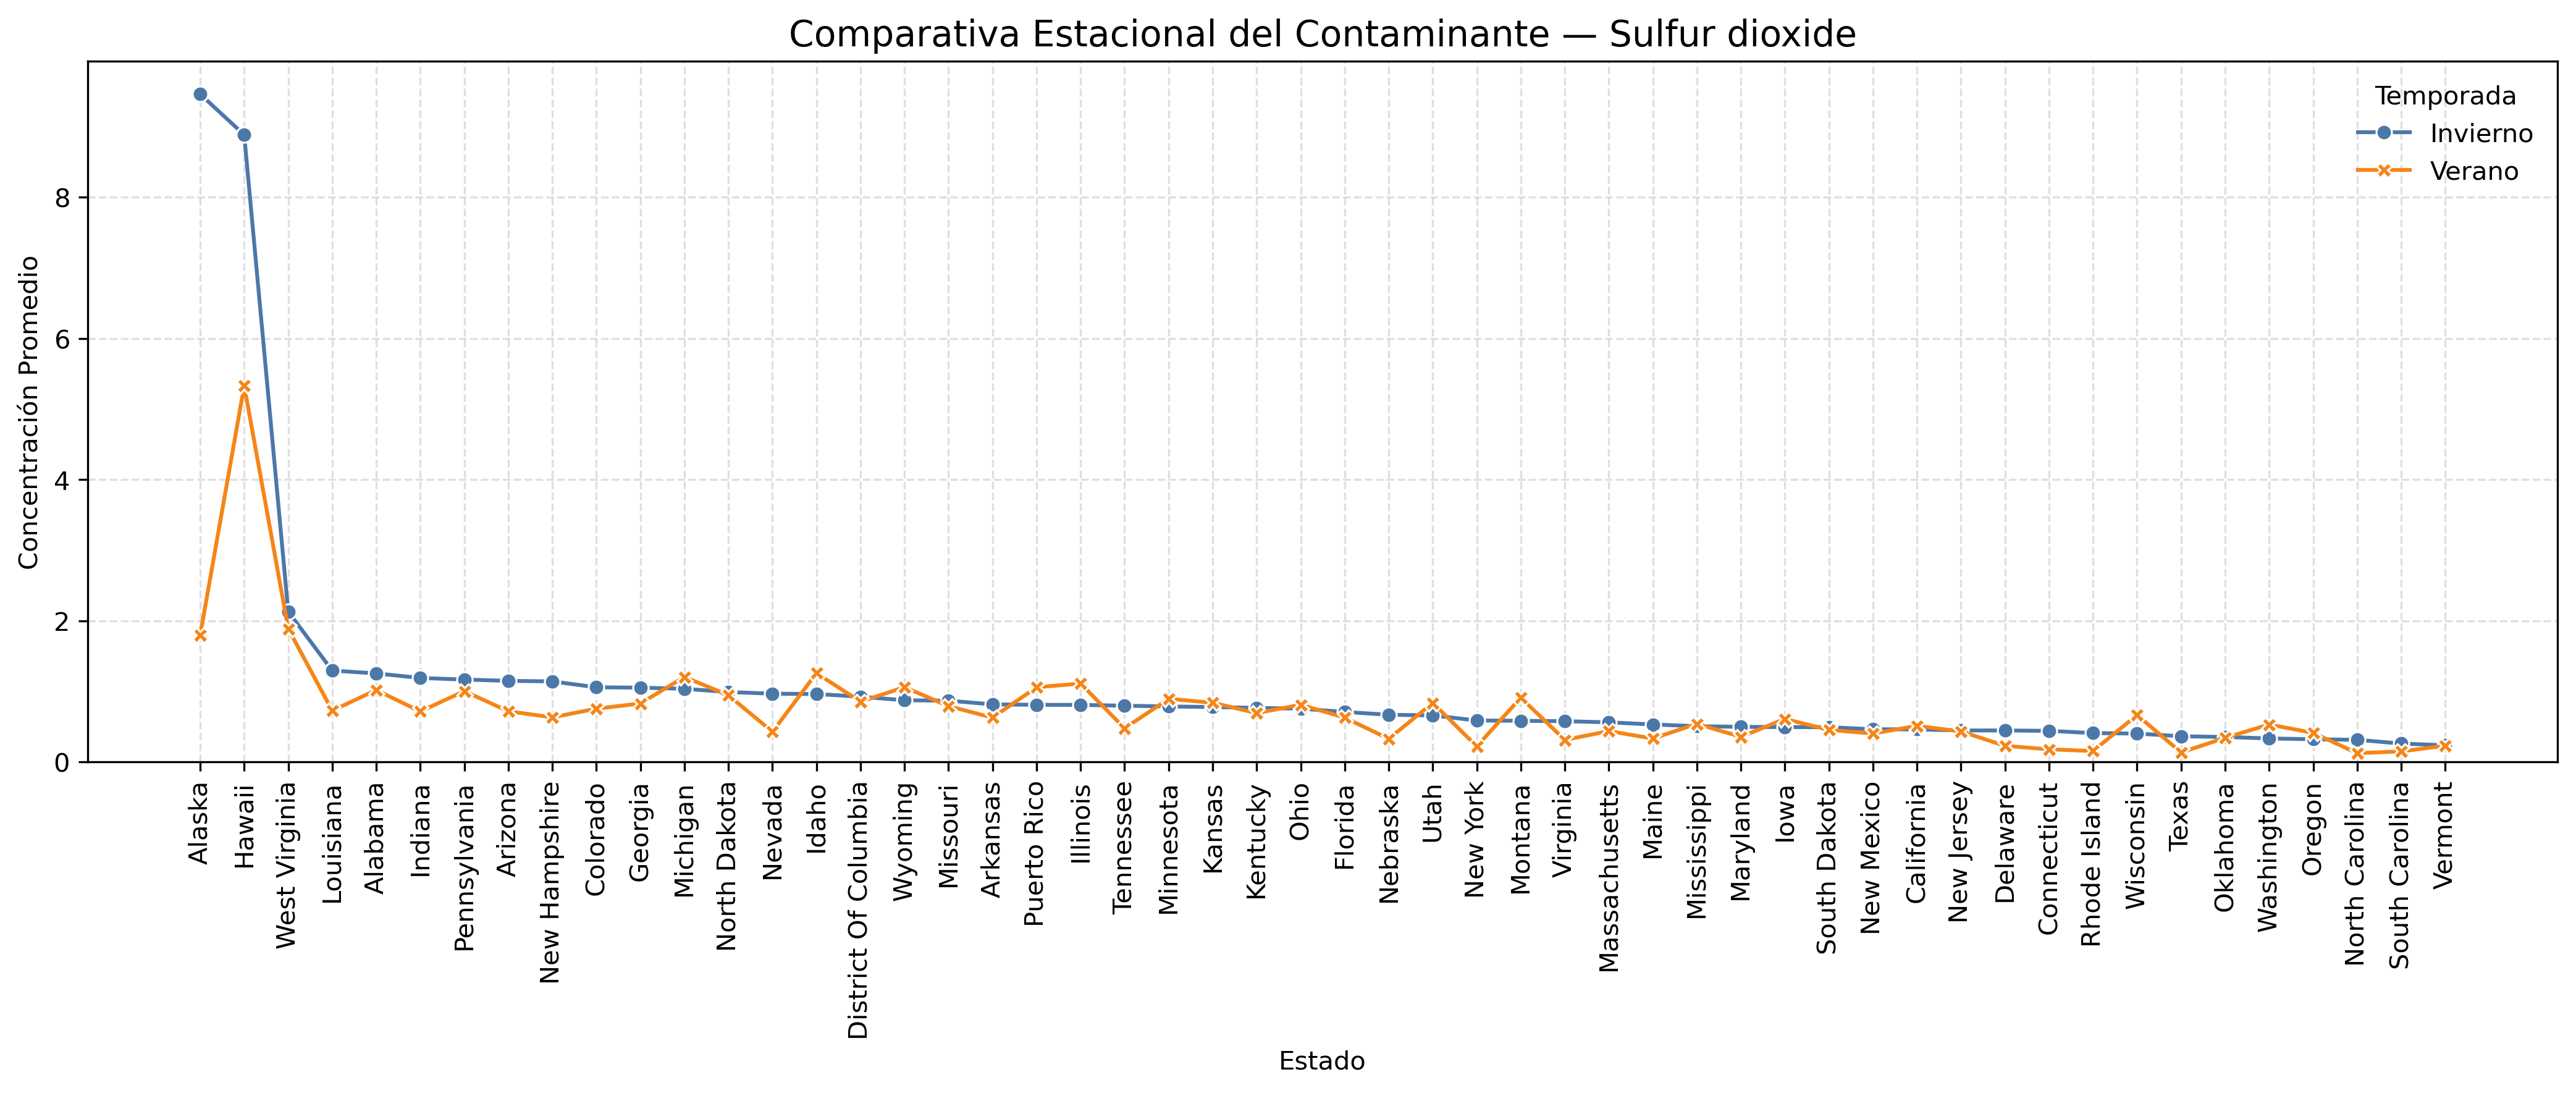

🖼 PNG guardado en: exportados/estacional_sulfur_dioxide.png


In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Cargar SIEMPRE el largo, no el pivot ---
df = pd.read_csv("exportados/comparativa_invierno_verano.csv")

# Normalizar nombres de columnas a minúsculas sin espacios
df.columns = [c.strip().lower() for c in df.columns]

# Si por error cargaste el pivot, lo detectamos y lo "deshacemos"
cols = set(df.columns)
if {"invierno", "verano"}.issubset(cols) and "temporada" not in cols:
    id_cols = [c for c in df.columns if c not in {"invierno", "verano"}]
    df = df.melt(id_vars=id_cols,
                 value_vars=["invierno", "verano"],
                 var_name="temporada",
                 value_name="promedio_temporada")

# Alineamos nombres esperados
rename_map = {
    "state_name": "state_name",
    "parameter_name": "parameter_name",
}
# por si el promedio vino con otro nombre
if "promedio_temporada" not in df.columns:
    for alt in ["promedio", "avg", "mean", "valor"]:
        if alt in df.columns:
            df = df.rename(columns={alt: "promedio_temporada"})
            break

# Validaciones
for needed in ["state_name", "parameter_name", "temporada", "promedio_temporada"]:
    if needed not in df.columns:
        raise ValueError(f"Falta la columna '{needed}'. Columnas actuales: {df.columns.tolist()}")

# Normalizamos valores de temporada (Invierno/Verano)
df["temporada"] = df["temporada"].astype(str).str.strip().str.capitalize()

# --- 2) Parámetros del gráfico ---
contaminante = "Sulfur dioxide"   # cambia aquí
temporada_orden = "Invierno"       # usamos esta temporada para ordenar estados

# --- 3) Filtrar contaminante y ordenar estados por la temporada elegida ---
df_cont = df[df["parameter_name"] == contaminante].copy()
if df_cont.empty:
    raise ValueError(f"No hay datos para '{contaminante}' en el DataFrame.")

base = (df_cont[df_cont["temporada"] == temporada_orden]
        .sort_values("promedio_temporada", ascending=False))
orden_estados = base["state_name"].tolist()

df_cont["state_name"] = pd.Categorical(df_cont["state_name"],
                                       categories=orden_estados,
                                       ordered=True)
df_cont = df_cont.sort_values(["state_name", "temporada"])

# --- 4) Gráfico de líneas por estado (Invierno vs Verano) ---
plt.figure(figsize=(14, 6), dpi=300)
ax = sns.lineplot(
    data=df_cont,
    x="state_name", y="promedio_temporada",
    hue="temporada", style="temporada",
    markers=True, dashes=False, estimator=None, sort=False,
    palette={"Invierno": "#4C78A8", "Verano": "#F58518"},
    hue_order=["Invierno", "Verano"],
)

ax.set_title(f"Comparativa Estacional del Contaminante — {contaminante}", fontsize=14)
ax.set_xlabel("Estado")
ax.set_ylabel("Concentración Promedio")
plt.xticks(rotation=90)
ax.grid(True, linestyle="--", alpha=0.4)
ax.set_ylim(bottom=0)
ax.legend(title="Temporada", frameon=False, loc="upper right")
plt.tight_layout()

# --- 5) Guardar ---
os.makedirs("exportados", exist_ok=True)
safe_name = contaminante.lower().replace(" ", "_").replace("(", "").replace(")", "")
out = f"exportados/estacional_{safe_name}.png"
plt.savefig(out, dpi=300)
plt.show()
print(f"🖼 PNG guardado en: {out}")


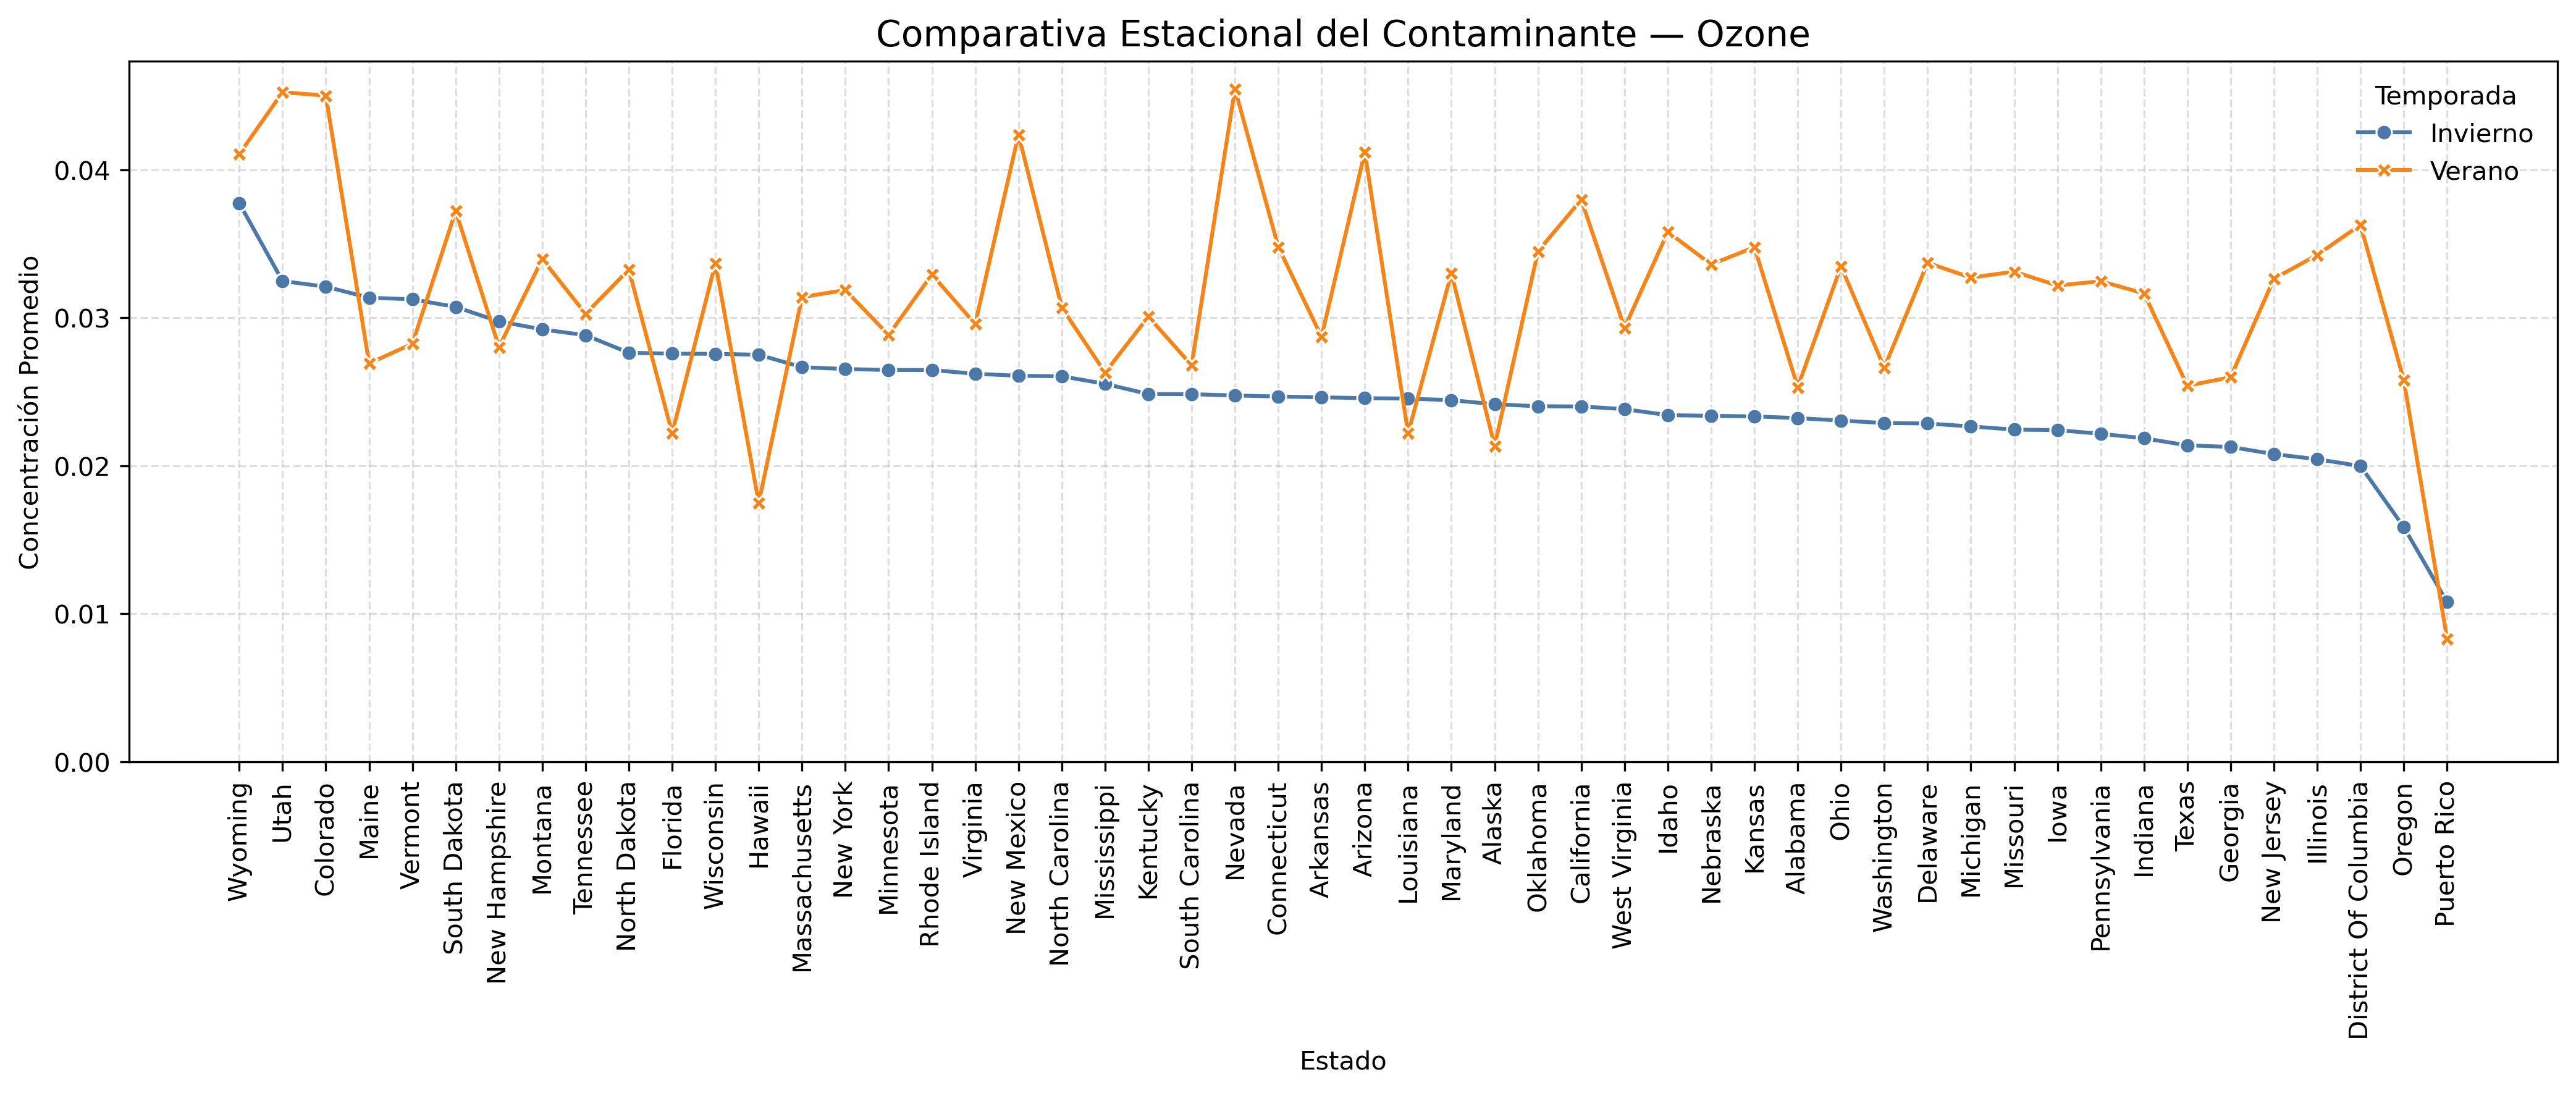

🖼 PNG guardado en: exportados/estacional_ozone.png


In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Cargar SIEMPRE el largo, no el pivot ---
df = pd.read_csv("exportados/comparativa_invierno_verano.csv")

# Normalizar nombres de columnas a minúsculas sin espacios
df.columns = [c.strip().lower() for c in df.columns]

# Si por error cargaste el pivot, lo detectamos y lo "deshacemos"
cols = set(df.columns)
if {"invierno", "verano"}.issubset(cols) and "temporada" not in cols:
    id_cols = [c for c in df.columns if c not in {"invierno", "verano"}]
    df = df.melt(id_vars=id_cols,
                 value_vars=["invierno", "verano"],
                 var_name="temporada",
                 value_name="promedio_temporada")

# Alineamos nombres esperados
rename_map = {
    "state_name": "state_name",
    "parameter_name": "parameter_name",
}
# por si el promedio vino con otro nombre
if "promedio_temporada" not in df.columns:
    for alt in ["promedio", "avg", "mean", "valor"]:
        if alt in df.columns:
            df = df.rename(columns={alt: "promedio_temporada"})
            break

# Validaciones
for needed in ["state_name", "parameter_name", "temporada", "promedio_temporada"]:
    if needed not in df.columns:
        raise ValueError(f"Falta la columna '{needed}'. Columnas actuales: {df.columns.tolist()}")

# Normalizamos valores de temporada (Invierno/Verano)
df["temporada"] = df["temporada"].astype(str).str.strip().str.capitalize()

# --- 2) Parámetros del gráfico ---
contaminante = "Ozone"   # cambia aquí
temporada_orden = "Invierno"       # usamos esta temporada para ordenar estados

# --- 3) Filtrar contaminante y ordenar estados por la temporada elegida ---
df_cont = df[df["parameter_name"] == contaminante].copy()
if df_cont.empty:
    raise ValueError(f"No hay datos para '{contaminante}' en el DataFrame.")

base = (df_cont[df_cont["temporada"] == temporada_orden]
        .sort_values("promedio_temporada", ascending=False))
orden_estados = base["state_name"].tolist()

df_cont["state_name"] = pd.Categorical(df_cont["state_name"],
                                       categories=orden_estados,
                                       ordered=True)
df_cont = df_cont.sort_values(["state_name", "temporada"])

# --- 4) Gráfico de líneas por estado (Invierno vs Verano) ---
plt.figure(figsize=(14, 6), dpi=300)
ax = sns.lineplot(
    data=df_cont,
    x="state_name", y="promedio_temporada",
    hue="temporada", style="temporada",
    markers=True, dashes=False, estimator=None, sort=False,
    palette={"Invierno": "#4C78A8", "Verano": "#F58518"},
    hue_order=["Invierno", "Verano"],
)

ax.set_title(f"Comparativa Estacional del Contaminante — {contaminante}", fontsize=14)
ax.set_xlabel("Estado")
ax.set_ylabel("Concentración Promedio")
plt.xticks(rotation=90)
ax.grid(True, linestyle="--", alpha=0.4)
ax.set_ylim(bottom=0)
ax.legend(title="Temporada", frameon=False, loc="upper right")
plt.tight_layout()

# --- 5) Guardar ---
os.makedirs("exportados", exist_ok=True)
safe_name = contaminante.lower().replace(" ", "_").replace("(", "").replace(")", "")
out = f"exportados/estacional_{safe_name}.png"
plt.savefig(out, dpi=300)
plt.show()
print(f"🖼 PNG guardado en: {out}")
